In [77]:
import os
import json
import numpy as np
import torch

import matplotlib.pyplot as plt
# plt.style.use('dark_background')
import seaborn as sns
import scipy

import matplotlib.lines as mlines

In [68]:
def sample_colormap(colormap_name, n):
    # Get the colormap
    colormap = plt.get_cmap(colormap_name)
    # Generate n evenly spaced values between 0 and 1
    values = np.linspace(0, 1, n)
    # Map the values to colors in the colormap
    colors = colormap(values)
    return colors

In [31]:
from quality_metrics.common import load_dataset 

In [79]:
path_train_archive = 'data/dataset_quality_puzzles_train_1.json'
path_test_archive = 'data/dataset_quality_puzzles_test_1.json'

In [80]:
dataset_train_archive = load_dataset(path_train_archive)
dataset_test_archive = load_dataset(path_test_archive)

In [81]:
dataset_train_archive[-1].origin

'aces'

In [82]:
dataset_test_archive[0]

Problem(idx='Study_1:0', instruction="def f(s: str):\n    return s.count('o') == 1000 and s.count('oo') == 0", completion="def g():\n    return ('h' + 'o') * 1000", quality={'pp_diff': [0.0023380517959594727, 0.10596907138824463, 0.0494387149810791, 0.30987727642059326, 0.040902674198150635, 0.22684389352798462, 0.21948015689849854, -0.11063385009765625, -0.00885772705078125, -0.040248334407806396, 0.17260026931762695, 0.007615908980369568, 0.040866777300834656, 0.17046508193016052, 0.03105539083480835, -0.011733829975128174, 0.01764678955078125, 0.05050551891326904, 0.013381481170654297, -0.021967291831970215, -0.011910200119018555, 0.0014266371726989746, -0.08751416206359863, -0.013999700546264648, -0.06381487846374512, 0.02564111351966858, 0.2533515691757202, 0.03788793087005615, -0.01823246479034424, 0.03134909272193909, 0.0882071852684021, -0.013782501220703125, 0.17570200562477112, -0.052751779556274414, 0.060194820165634155, 0.028481483459472656, -0.03282570838928223, 0.18012660

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,
         1.,  4.,  1.,  2.,  1.,  4.,  2.,  0.,  4.,  8.,  8.,  6.,  7.,
        10.,  9.,  7.,  1.,  6.,  3.,  5.,  1.,  6.,  3.,  1.,  1.,  4.,
         1.,  1.,  2.,  1.,  0.,  1.,  3.,  1.,  1.,  0.,  1.,  2.,  0.,
         0.,  1.,  1.,  0.,  2.,  3.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.19444865, -0.18676985, -0.17909104, -0.17141224, -0.16373344,
        -0.15605463, -0.14837583, -0.14069703, -0.13301822, -0.12533942,
        -0.11766062, -0.10998181, -0.10230301, -0.09462421, -0.08694541,
        -0.0792666 , -0.0715878 , -0.063909  , -0.05623019, -0.04855139,
        -0.04087259, -0.03319378, -0.02551498, -0.01783618, -0.01015737,
        -0.00247857,  0.00520023,  0.01287904,  0.02055784,  0.028236

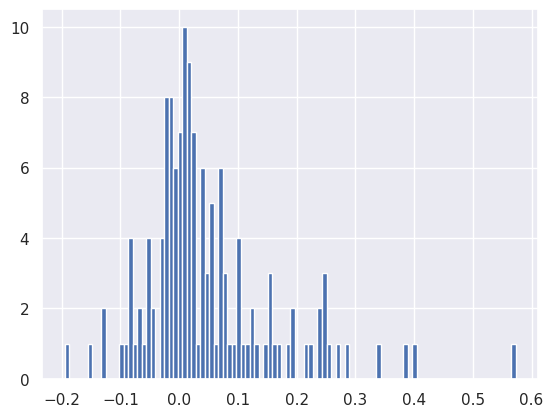

In [83]:
plt.hist(dataset_train_archive[0].quality['pp_diff'], bins=100)

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  2.,  0.,  2.,  0.,  0.,  2.,  1.,  2.,  2.,  1.,  5.,  4.,
         2.,  2.,  3.,  5.,  6.,  4., 13.,  8., 10.,  9.,  2.,  5.,  6.,
         3.,  3.,  1.,  2.,  0.,  3.,  1.,  4.,  3.,  1.,  3.,  3.,  0.,
         1.,  0.,  2.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.32038921, -0.31050311, -0.30061701, -0.29073091, -0.28084481,
        -0.2709587 , -0.2610726 , -0.2511865 , -0.2413004 , -0.2314143 ,
        -0.2215282 , -0.21164209, -0.20175599, -0.19186989, -0.18198379,
        -0.17209769, -0.16221159, -0.15232549, -0.14243938, -0.13255328,
        -0.12266718, -0.11278108, -0.10289498, -0.09300888, -0.08312278,
        -0.07323667, -0.06335057, -0.05346447, -0.04357837, -0.033692

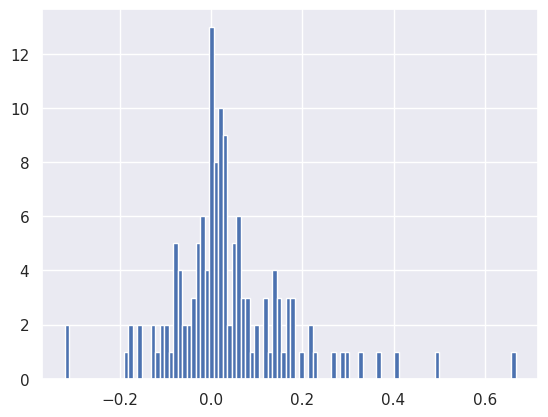

In [84]:
plt.hist(dataset_train_archive[1].quality['pp_diff'], bins=100)

(array([1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 2., 1., 1., 0.,
        3., 2., 0., 2., 2., 3., 1., 0., 0., 1., 2., 3., 4., 7., 4., 7., 4.,
        9., 7., 5., 5., 4., 6., 7., 2., 6., 1., 4., 3., 1., 1., 2., 1., 2.,
        2., 3., 3., 0., 0., 2., 0., 0., 0., 1., 1., 0., 0., 2., 0., 0., 0.,
        0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-2.45718360e-01, -2.38700827e-01, -2.31683294e-01, -2.24665760e-01,
        -2.17648227e-01, -2.10630694e-01, -2.03613161e-01, -1.96595628e-01,
        -1.89578094e-01, -1.82560561e-01, -1.75543028e-01, -1.68525495e-01,
        -1.61507962e-01, -1.54490429e-01, -1.47472895e-01, -1.40455362e-01,
        -1.33437829e-01, -1.26420296e-01, -1.19402763e-01, -1.12385229e-01,
        -1.05367696e-01, -9.83501631e-02, -9.13326299e-02, -8.43150967e-02,
        -7.72975636e-02, -7.02800304e-02, -6.32624972e-02, -5.62449640e-02,
        -4.9227430

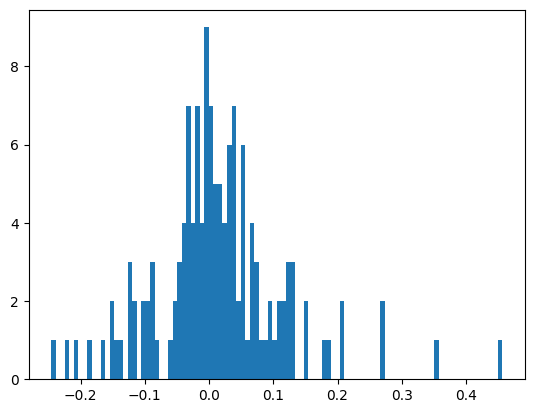

In [38]:
plt.hist(dataset_train_archive[2].quality['pp_diff'], bins=100)

(array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        2., 0., 0., 0., 2., 1., 1., 0., 2., 2., 1., 0., 2., 3., 1., 3., 3.,
        8., 4., 7., 6., 6., 6., 8., 5., 1., 5., 6., 5., 1., 5., 4., 4., 4.,
        4., 0., 0., 0., 0., 0., 2., 2., 1., 0., 2., 0., 0., 1., 2., 1., 0.,
        1., 1., 0., 0., 1., 0., 0., 2., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-0.27446932, -0.26732445, -0.26017958, -0.25303472, -0.24588985,
        -0.23874499, -0.23160012, -0.22445525, -0.21731039, -0.21016552,
        -0.20302066, -0.19587579, -0.18873092, -0.18158606, -0.17444119,
        -0.16729633, -0.16015146, -0.15300659, -0.14586173, -0.13871686,
        -0.131572  , -0.12442713, -0.11728226, -0.1101374 , -0.10299253,
        -0.09584767, -0.0887028 , -0.08155793, -0.07441307, -0.0672682 ,
        -0.06012334, -0.05297847, -0.0458336 , -0.03868874, -0.03154387,
        -0.02439901, -0.01725414, -0.01

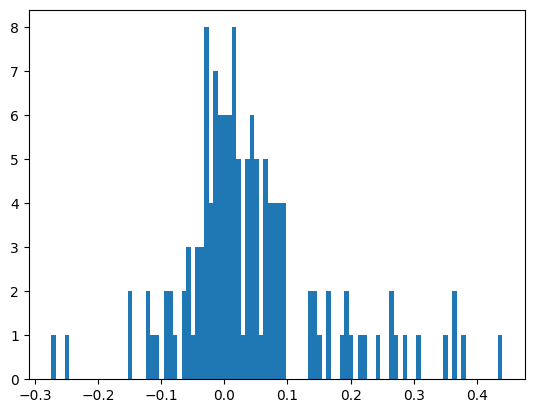

In [39]:
plt.hist(dataset_train_archive[-1].quality['pp_diff'], bins=100)

In [40]:
stds = []
for i, el in enumerate(dataset_train_archive):
    try:
        stds.append(np.std(el.quality['pp_diff']))
    except:
        print(i)

20
45
46
47
48
49
81
82
83
225
226
343
345
346
347
348
349
350
351
352
354
360
374
402
3339
3401
3452
3505


In [41]:
min(stds)

0.08809515067260296

In [42]:
max(stds)

0.23146550687610185

In [43]:
mins = [min(el.quality['pp_diff']) for el in dataset_train_archive if 'pp_diff' in el.quality]

In [44]:
max(mins)

-0.10832500457763672

In [45]:
min(mins)

-1.2073456048965454

In [46]:
maxs = [min(el.quality['pp_diff']) for el in dataset_train_archive if 'pp_diff' in el.quality]

In [47]:
# heatmap for puzzles vs ref puzzles

# filter puzzles
dataset_train_archive = [p for p in dataset_train_archive if 'pp_diff' in p.quality]
dataset_test_archive = [p for p in dataset_test_archive if 'pp_diff' in p.quality]

# train set puzzles
matrix_train = torch.tensor([p.quality['pp_diff'] for p in dataset_train_archive])
matrix_test = torch.tensor([p.quality['pp_diff'] for p in dataset_test_archive])

In [48]:
def plot_matrix(matrix, vmin=None, vmax=None, xmin=None, xmax=None):
    plt.rcdefaults()
    #     matrix[0, 3] = 1
    ymin = 0
    ymax = matrix.shape[1]
    if xmin is None:
        xmin = 0
    if xmax is None:
        xmax = matrix.shape[0]
    
    plt.figure(dpi=300)
    if vmin is not None and vmax is not None:
        plt.imshow(matrix, cmap='viridis', vmin=vmin, vmax=vmax, extent=[ymin, ymax, xmin, xmax])
    else:
        plt.imshow(matrix, cmap='viridis', extent=[xmin, xmax, ymin, ymax])

    # for i in range(len(matrix)):
    #     for j in range(len(matrix[i])):
    # #         print(matrix[i, j] * 1000)
    #         if matrix[i, j].item() >= 0:
    #             t = '+'
    #         else:
    #             t = '-'
    #         text = plt.text(j, i, t,
    #                         ha="center", va="center", color="black", fontsize=12)
    
    # Display the plot
    plt.colorbar()  # To show the color bar
    plt.title('Prediction progress matrix')

    plt.show()
    
    sns.set_theme()

In [49]:
matrix_train.shape
train_min = matrix_train.min()
train_max = matrix_train.max()
test_min = matrix_test.min()
test_max = matrix_test.max()
total_min = min(train_min, test_min)
total_max = max(train_max, test_max)

In [50]:
print(dataset_train_archive[3170].completion)

def g():
    m = 1
    while True:
        n = m
        for i in range(5):
            if n % 5 != 1:
                break
            n -= 1 + (n - 1) // 5
        if n > 0 and n % 5 == 1:
            return m
        m += 5


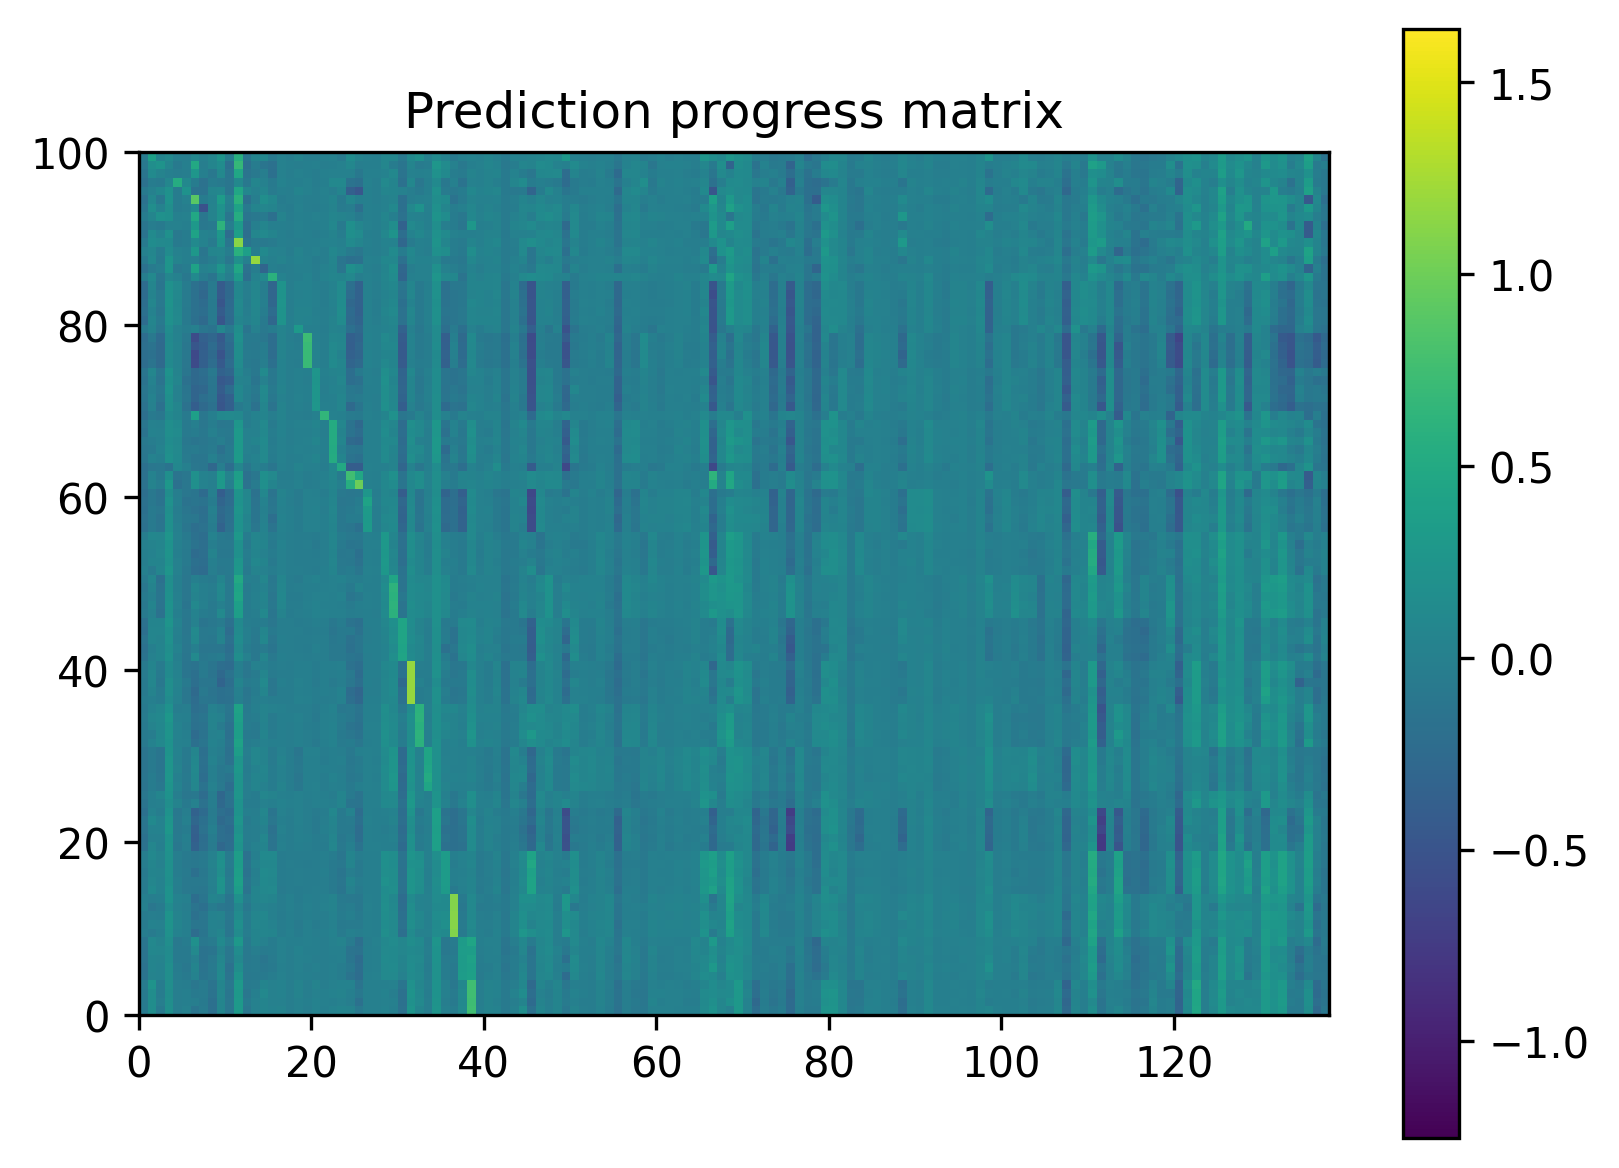

In [51]:
plot_matrix(matrix_train[:100], vmin=total_min, vmax=total_max)

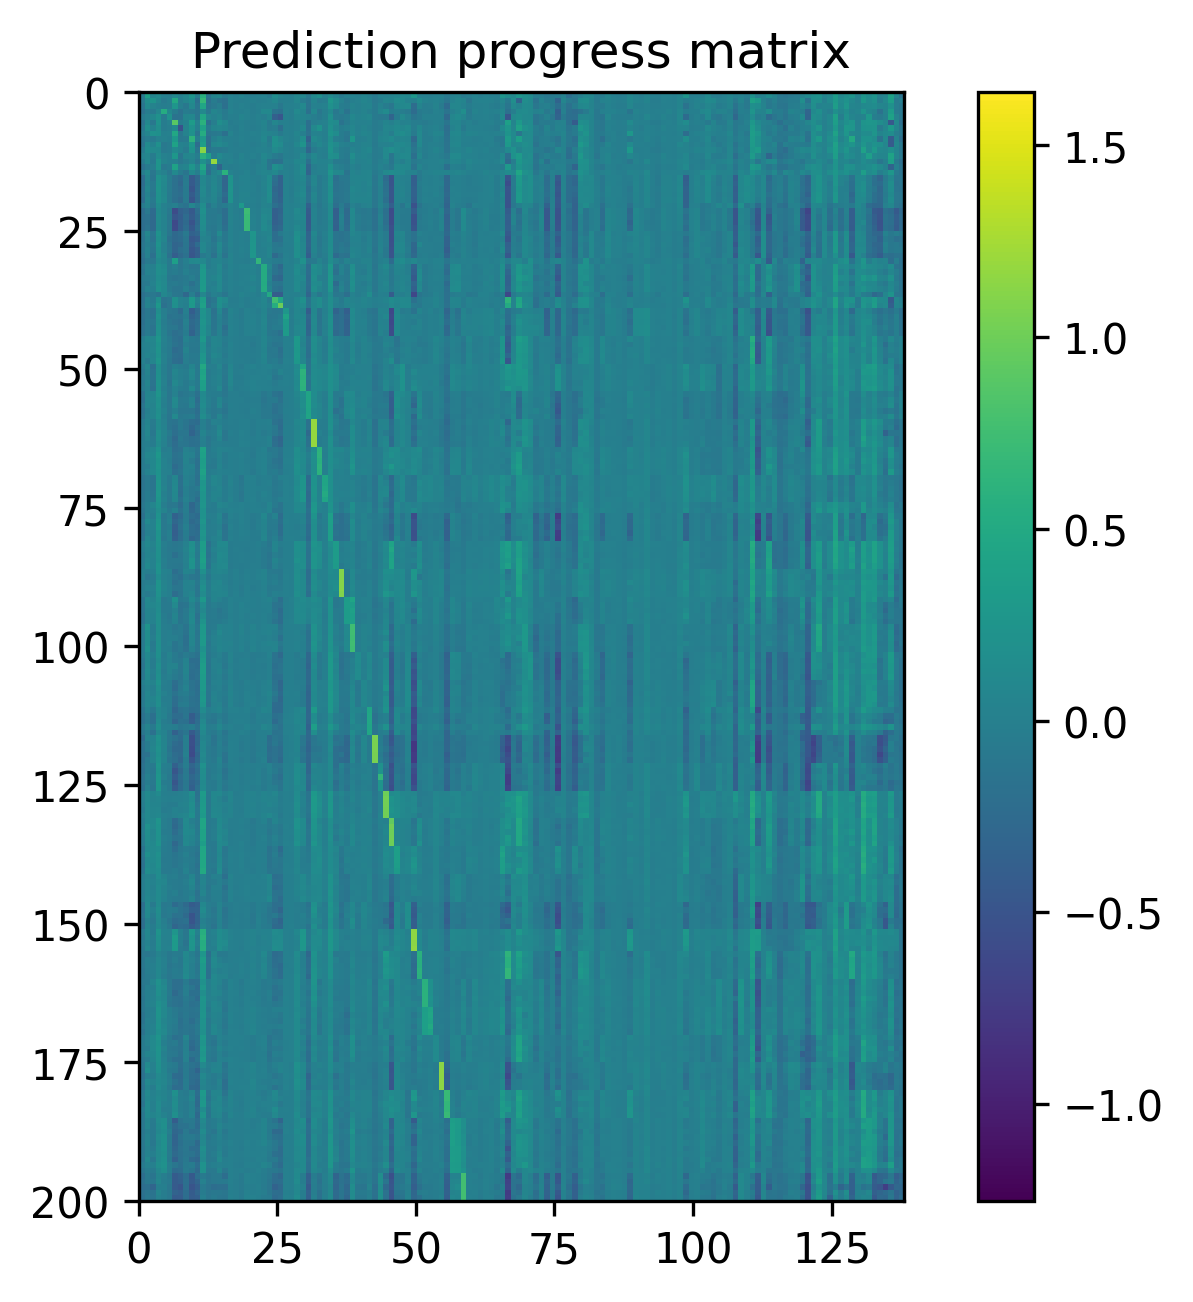

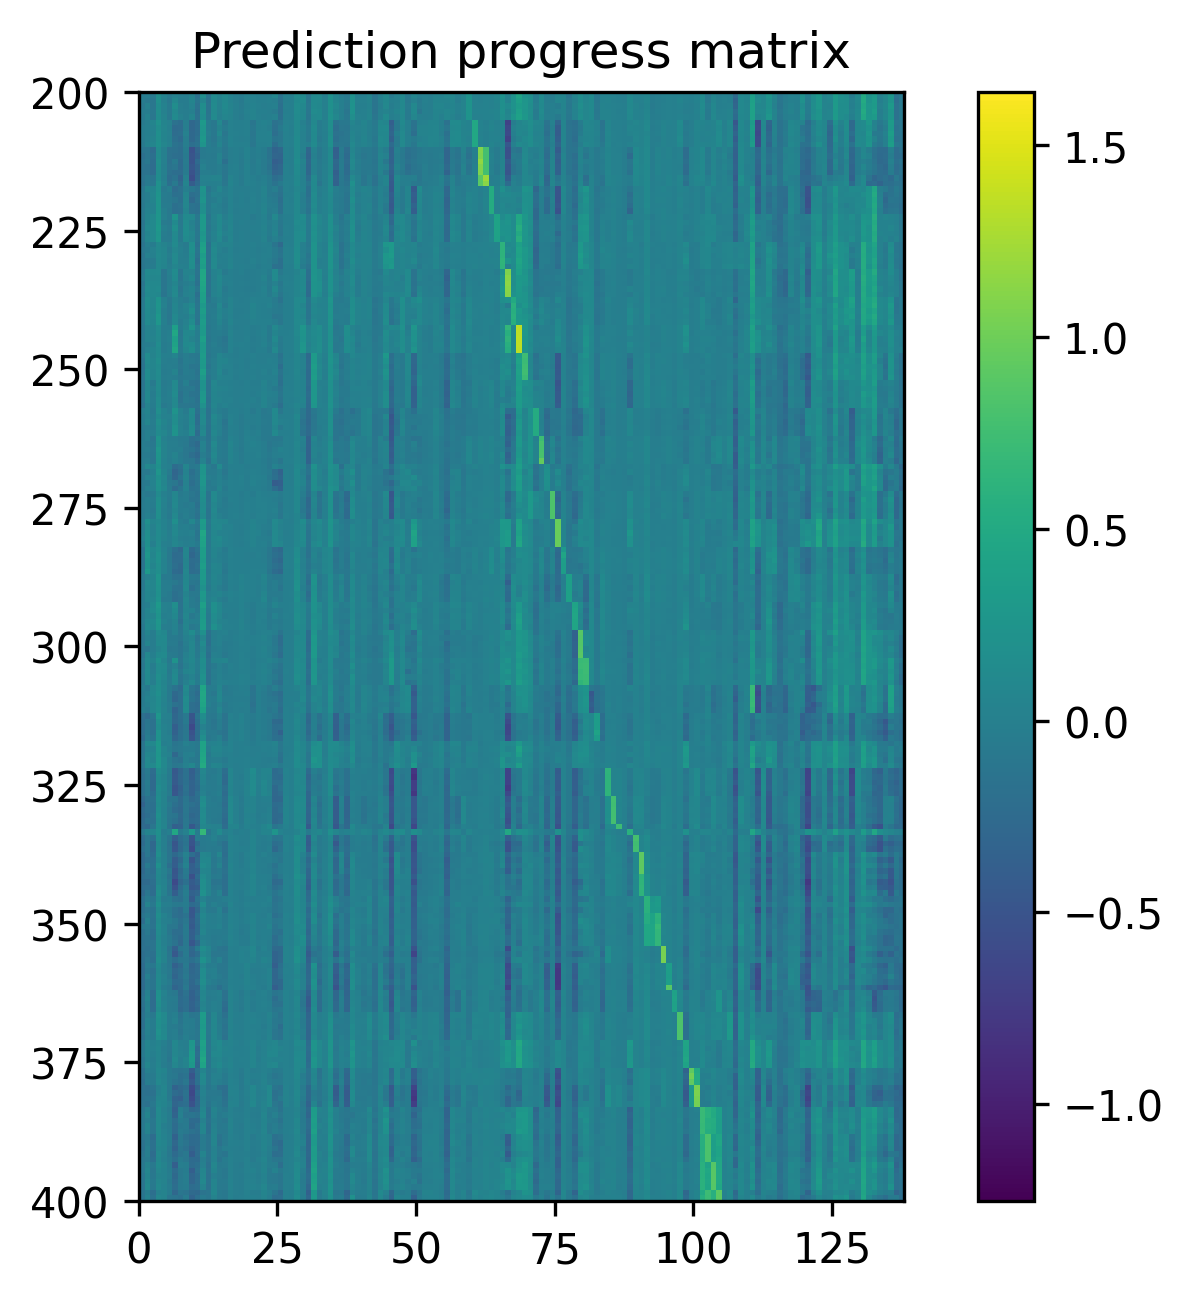

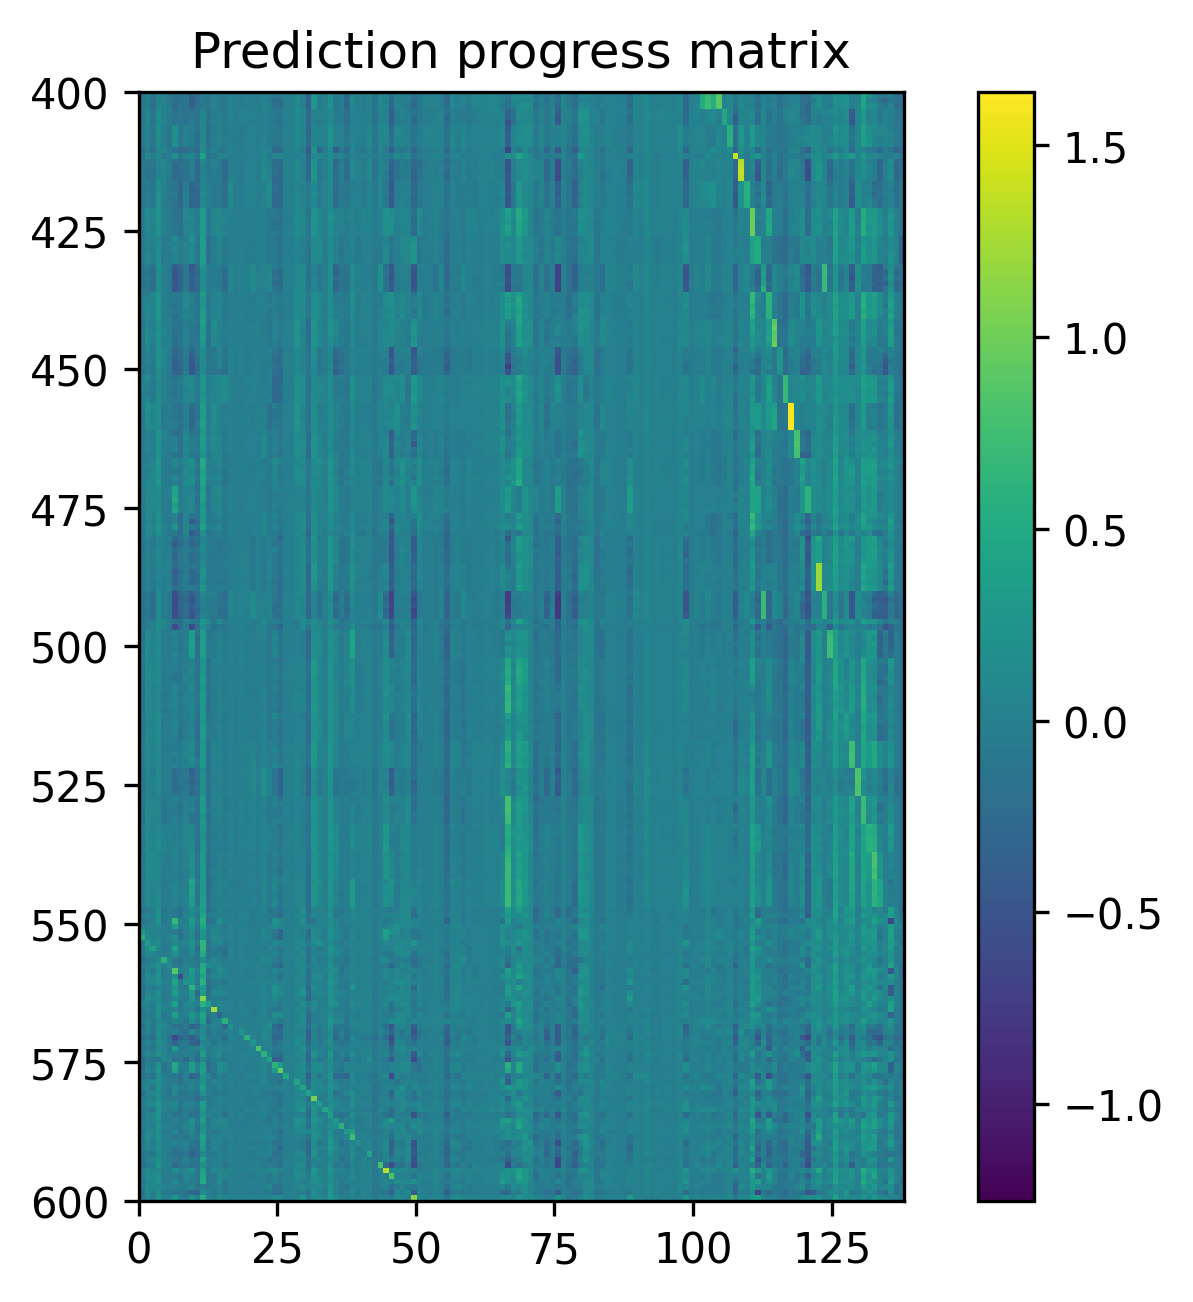

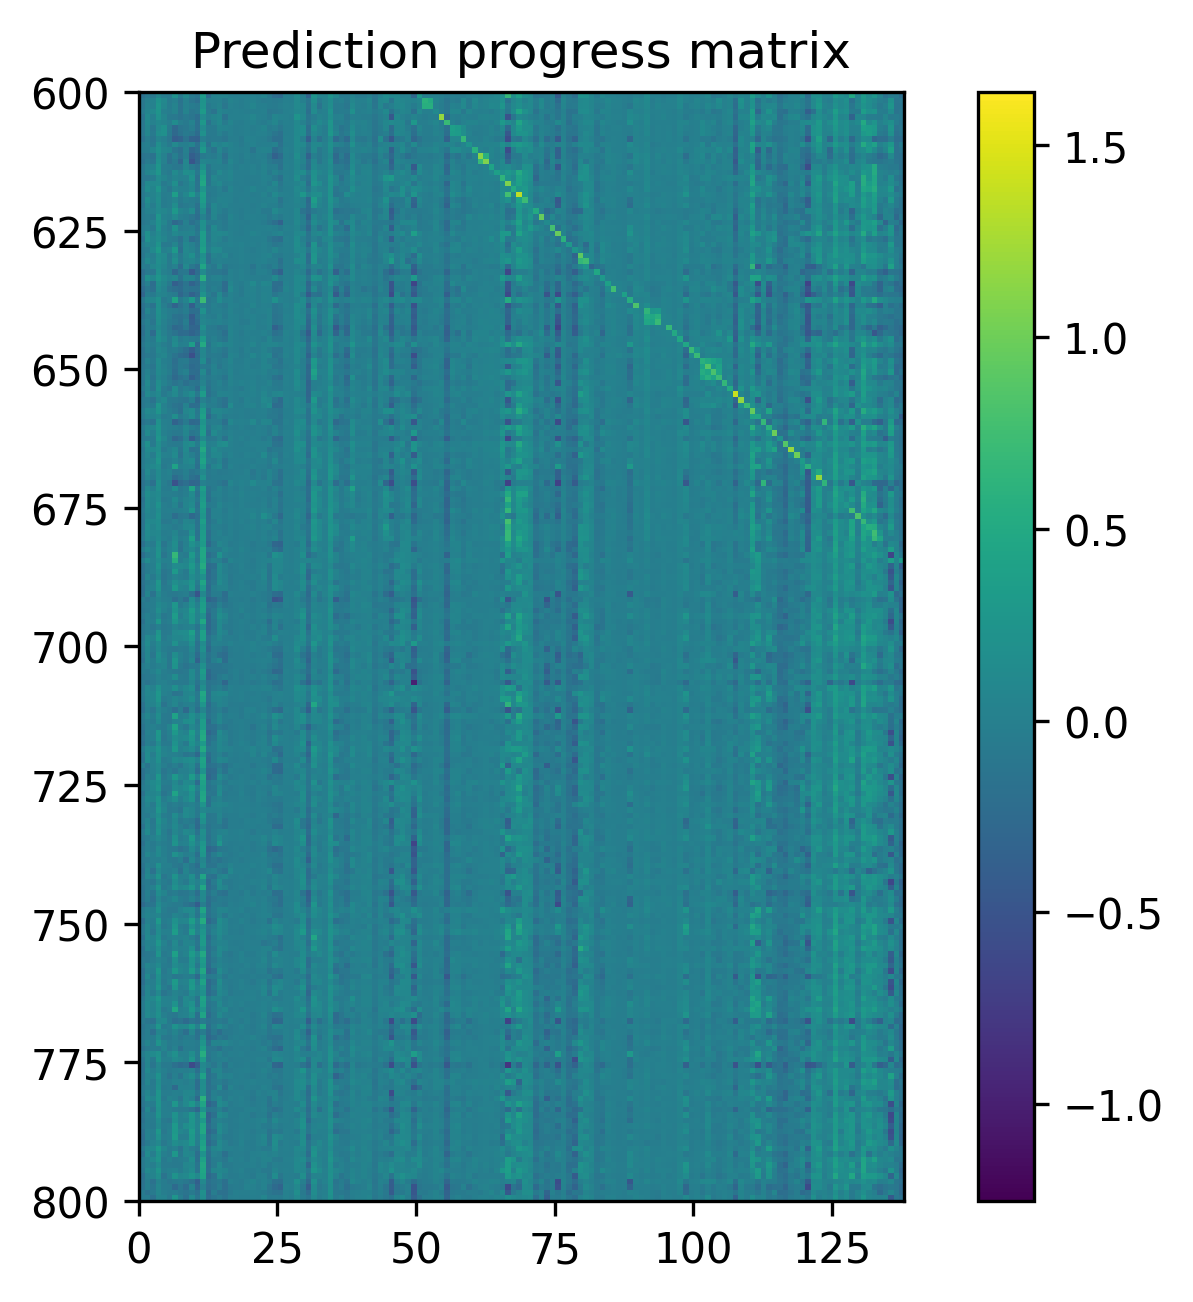

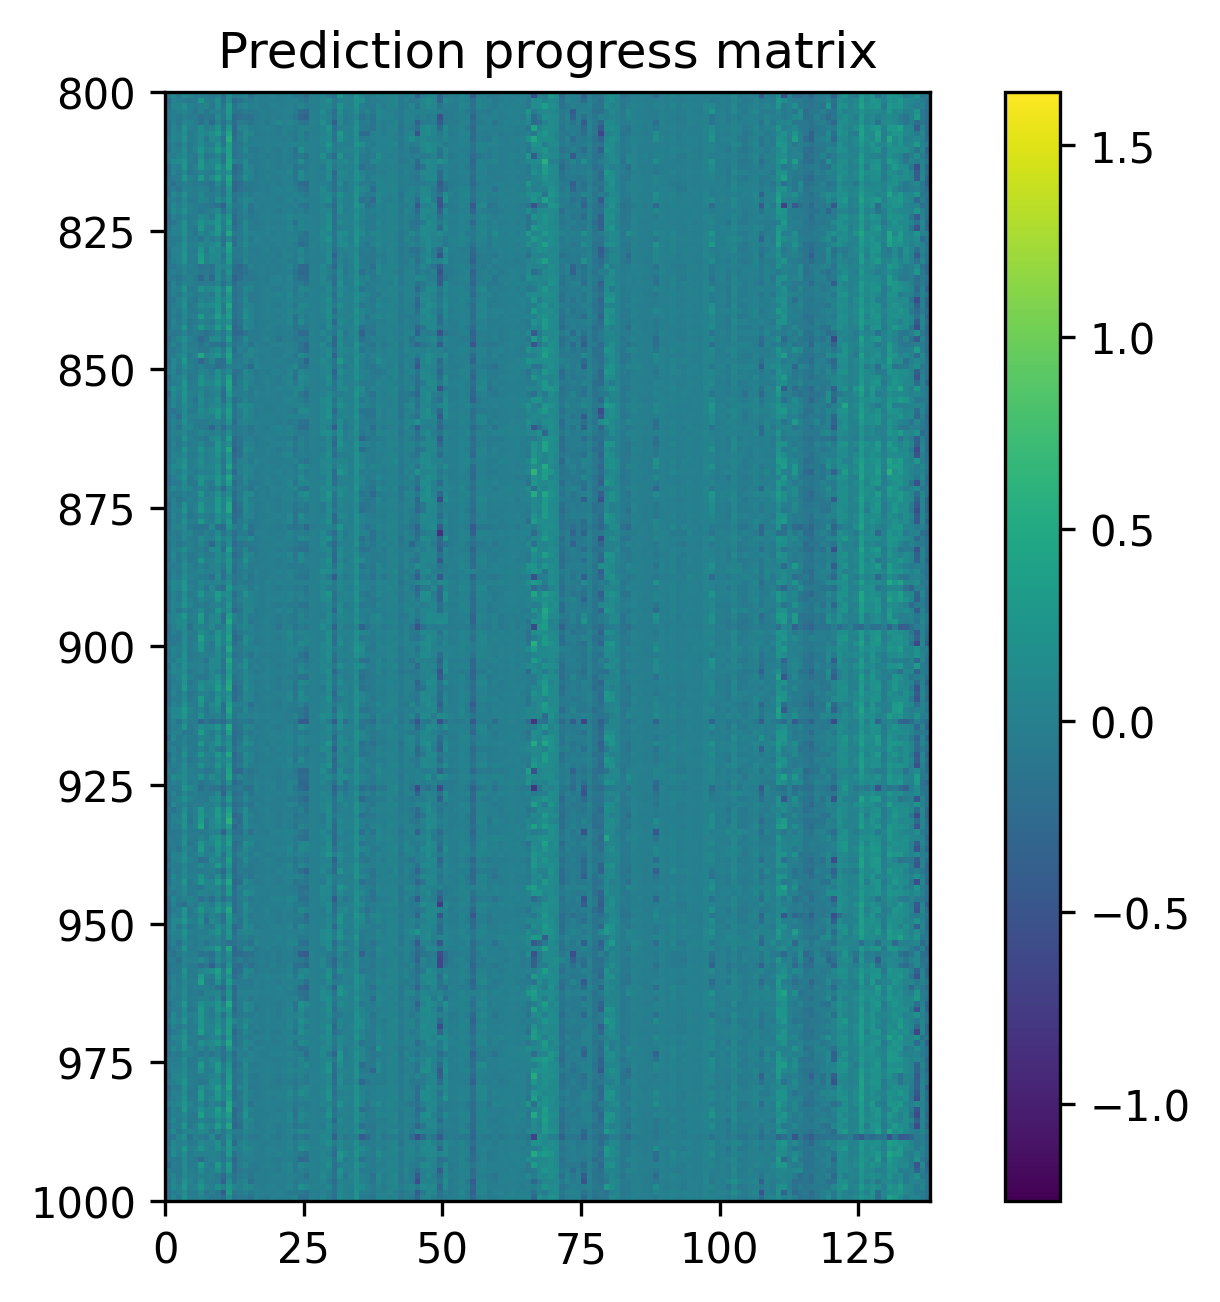

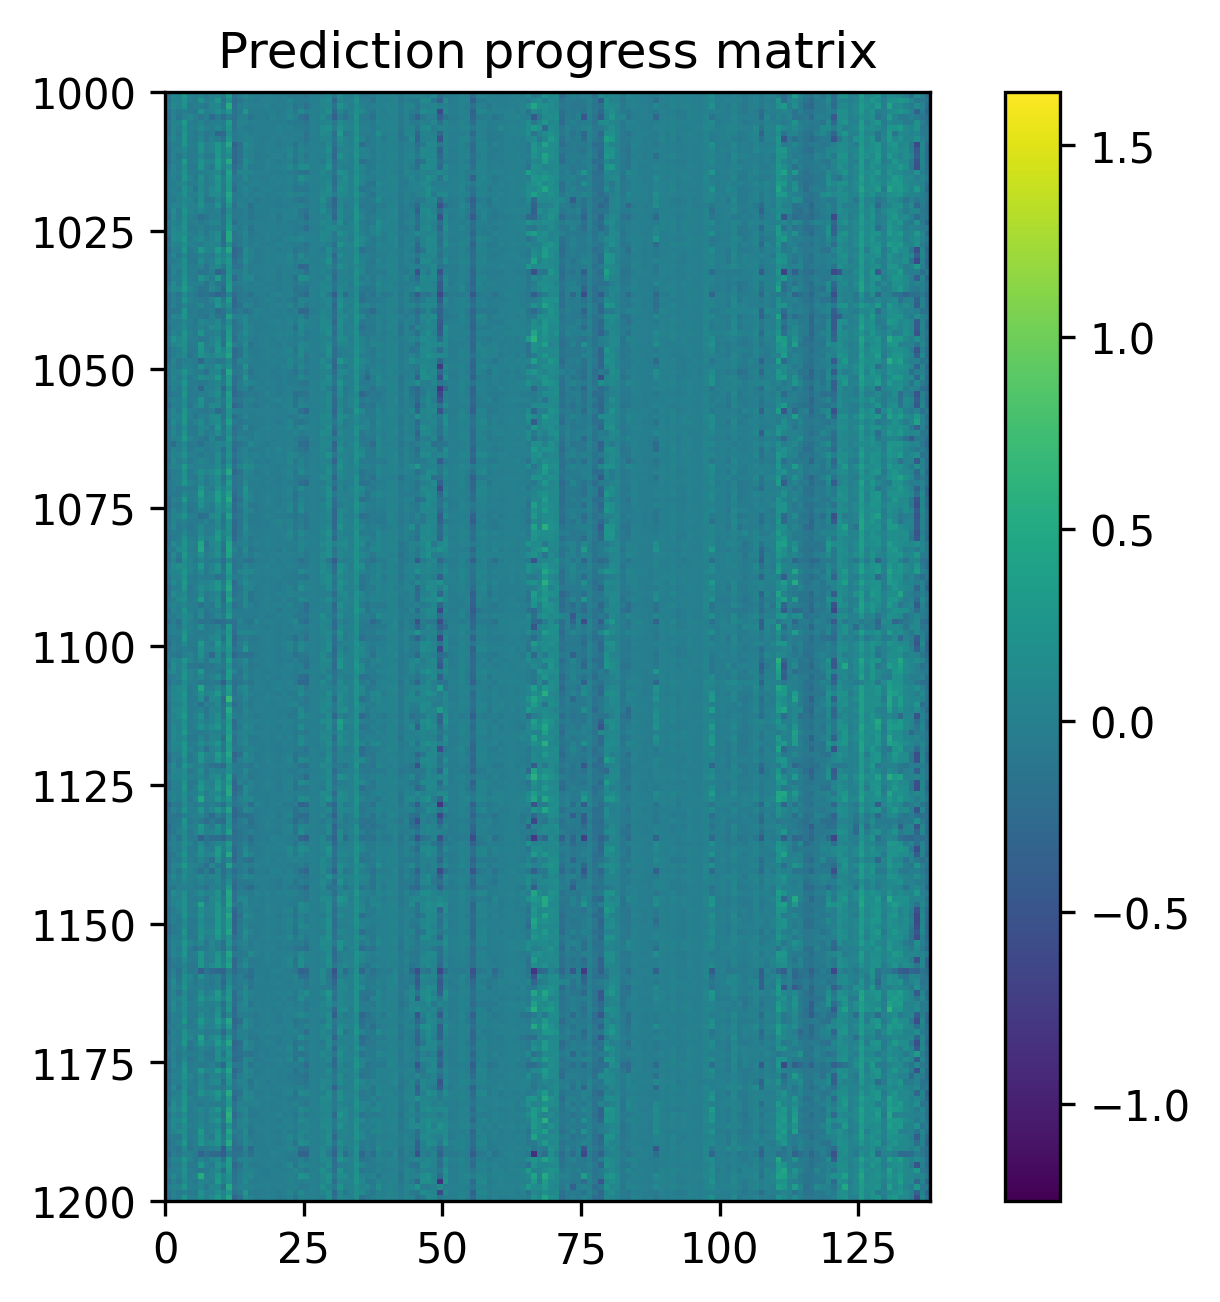

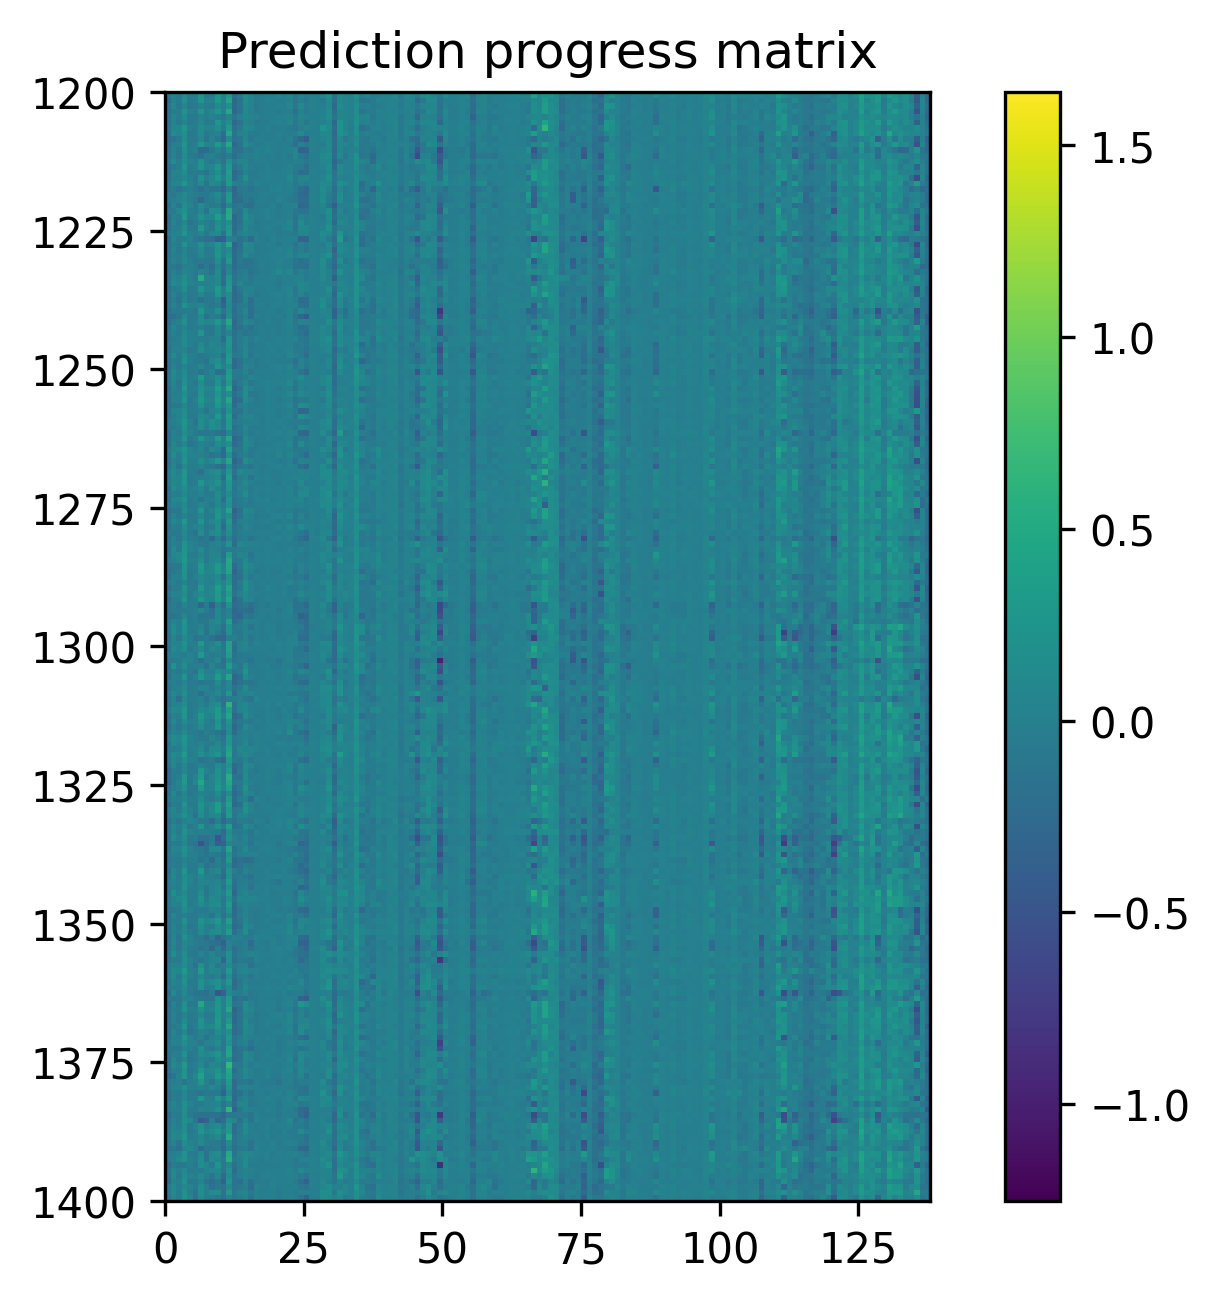

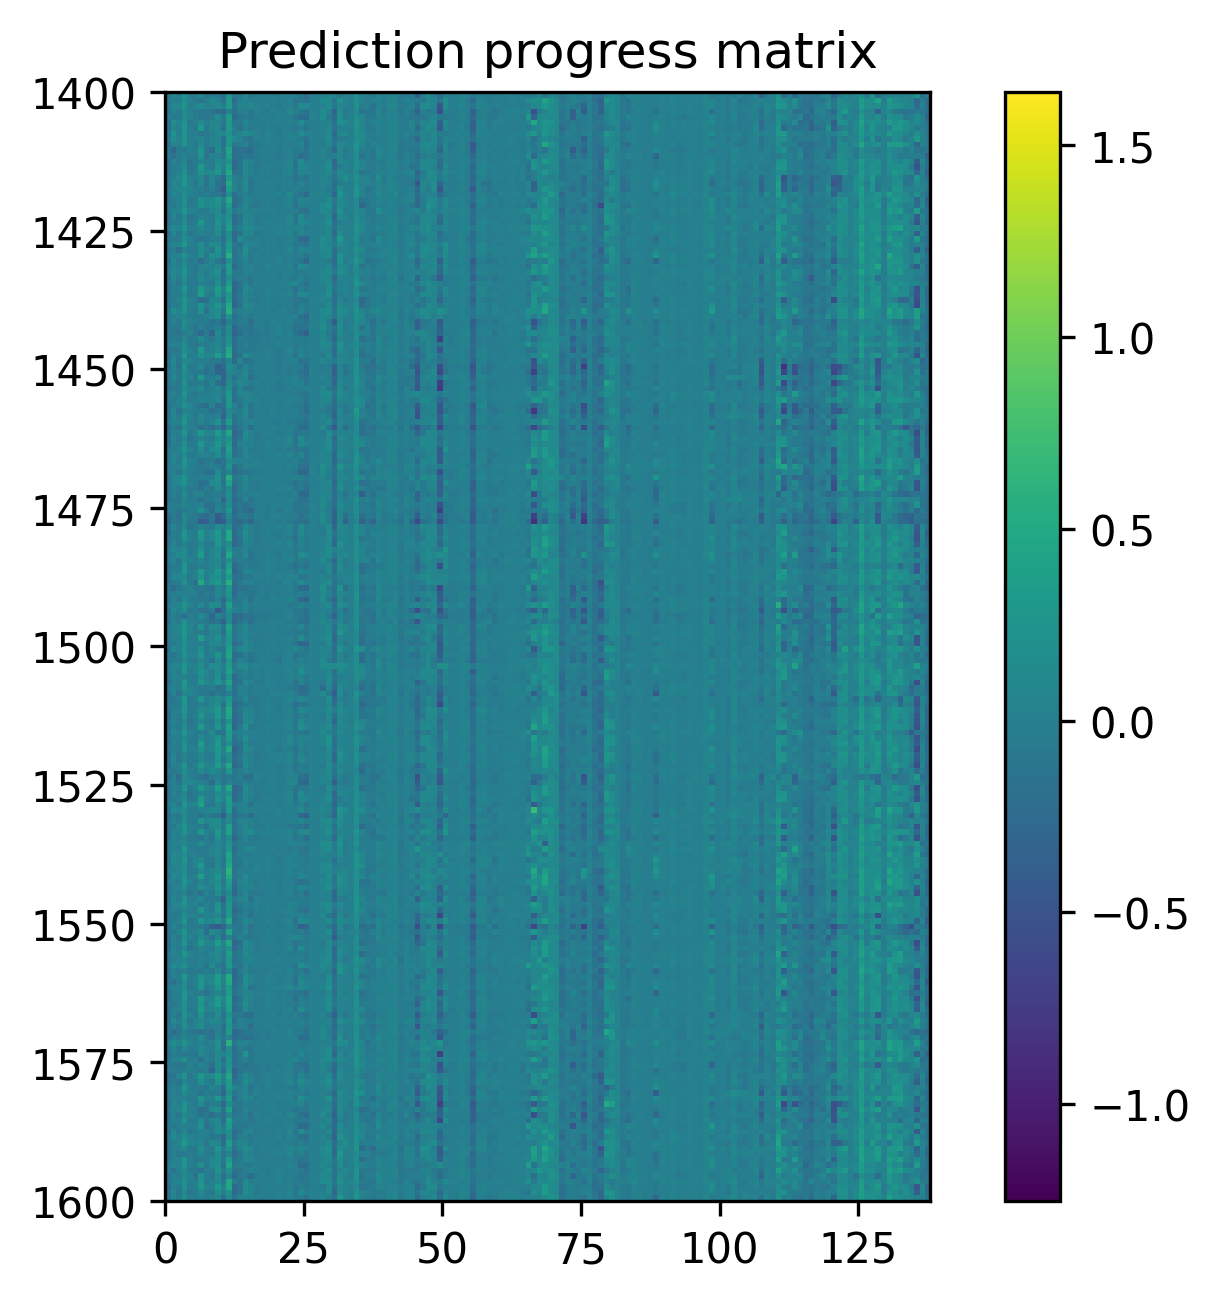

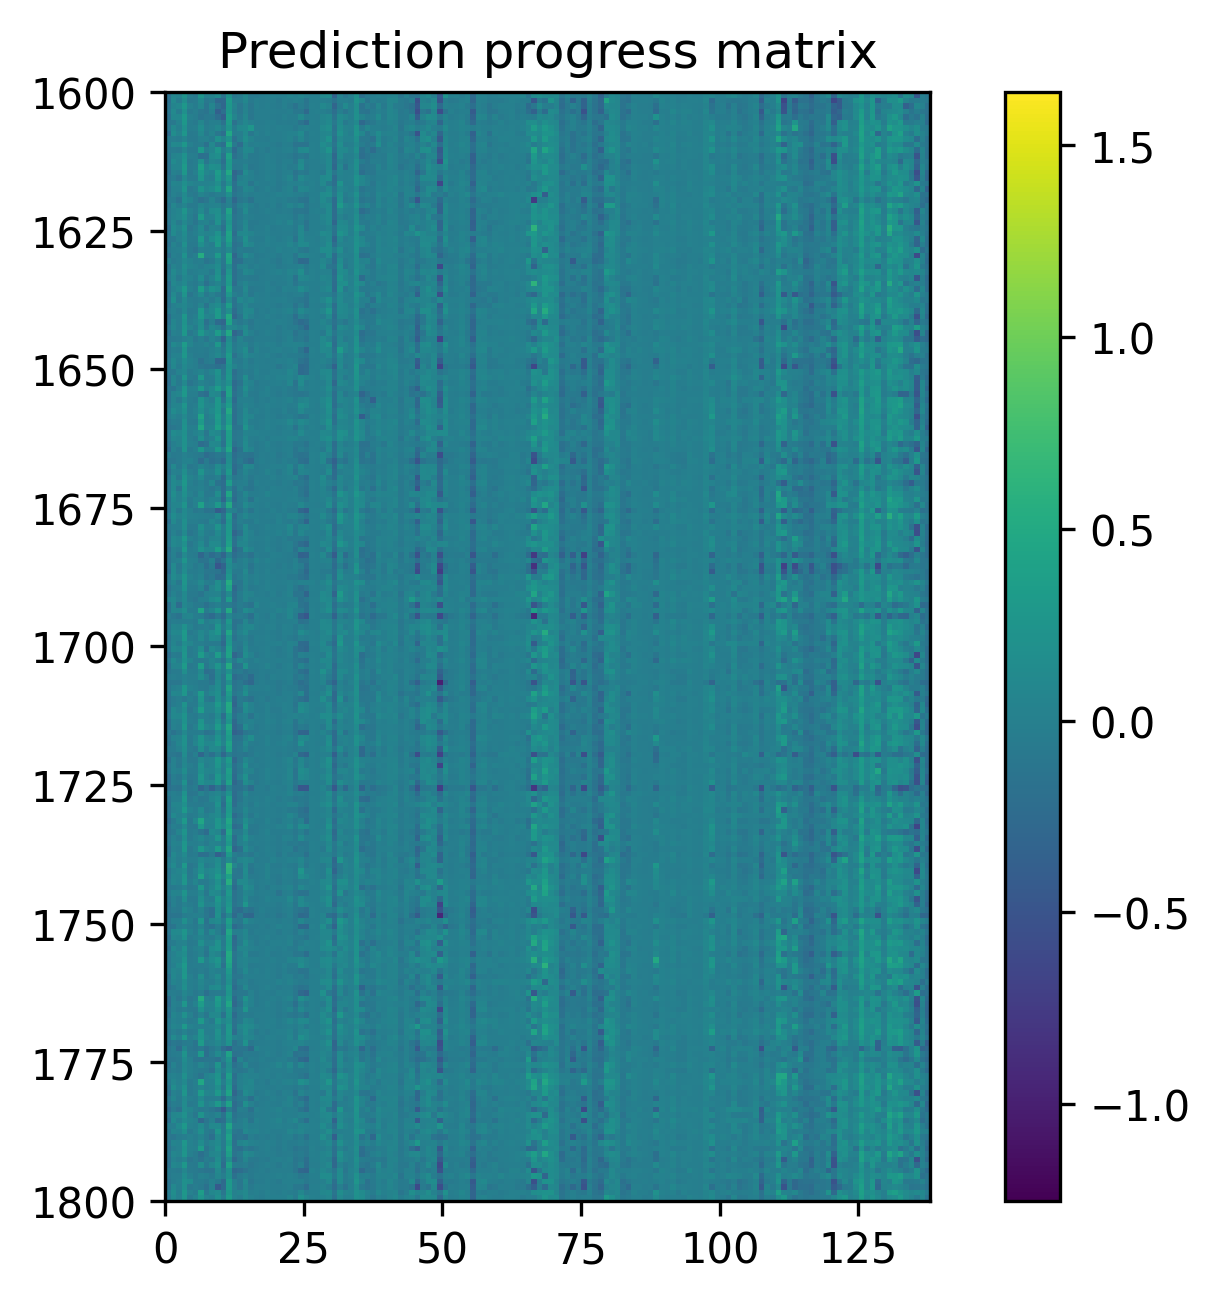

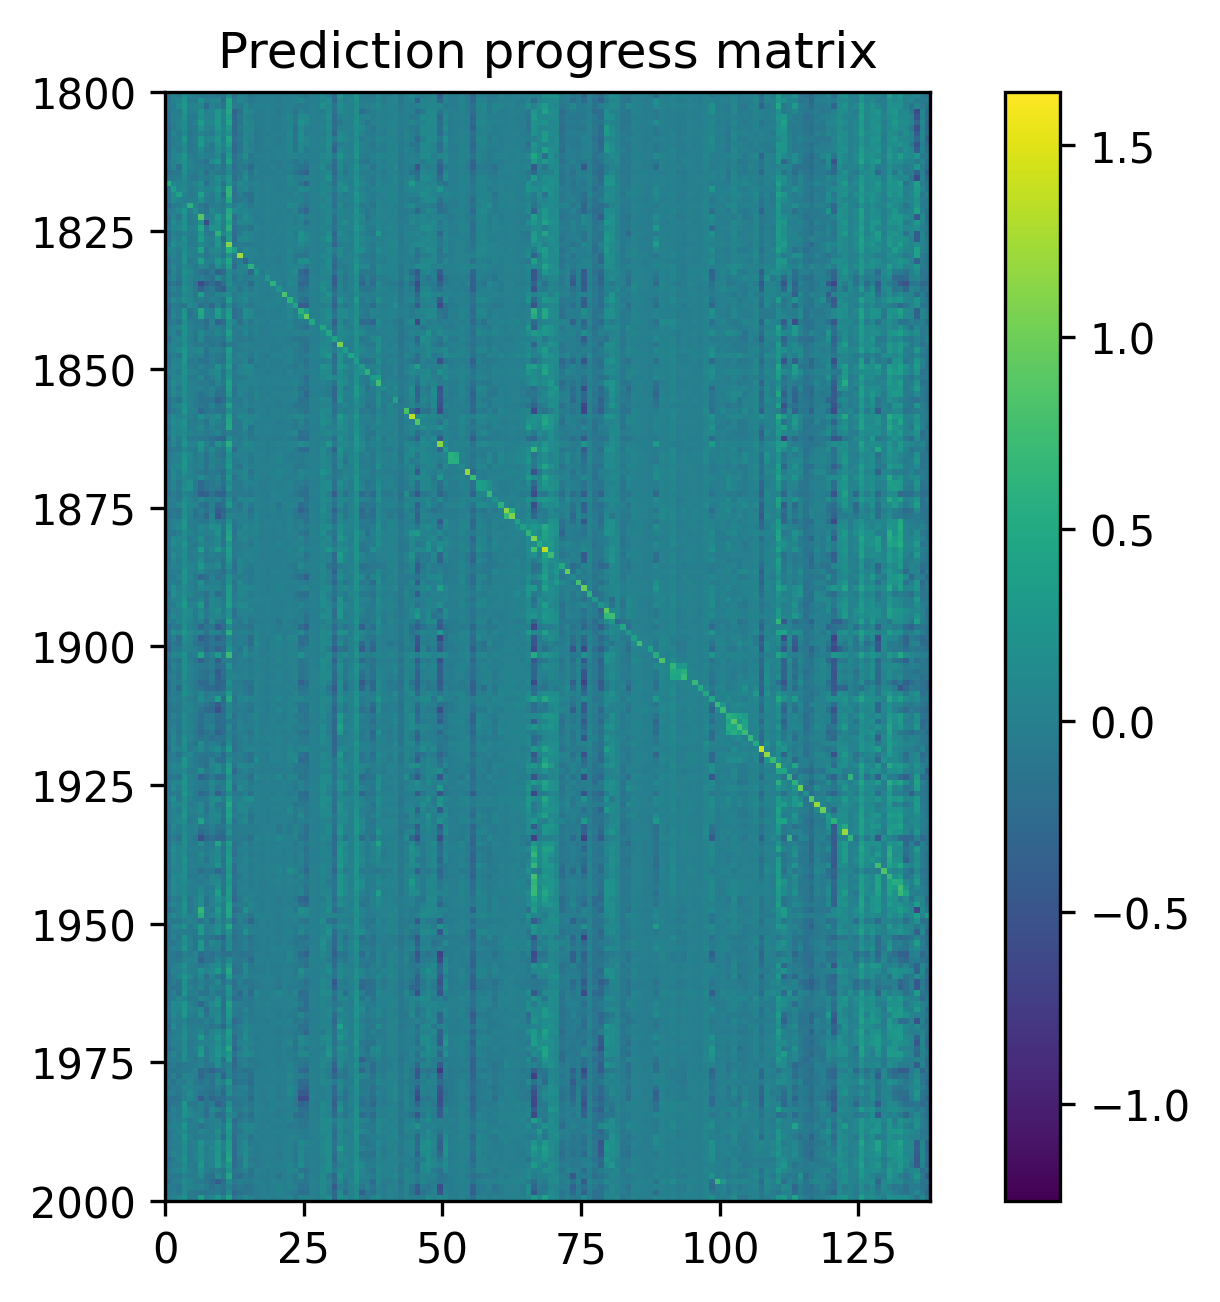

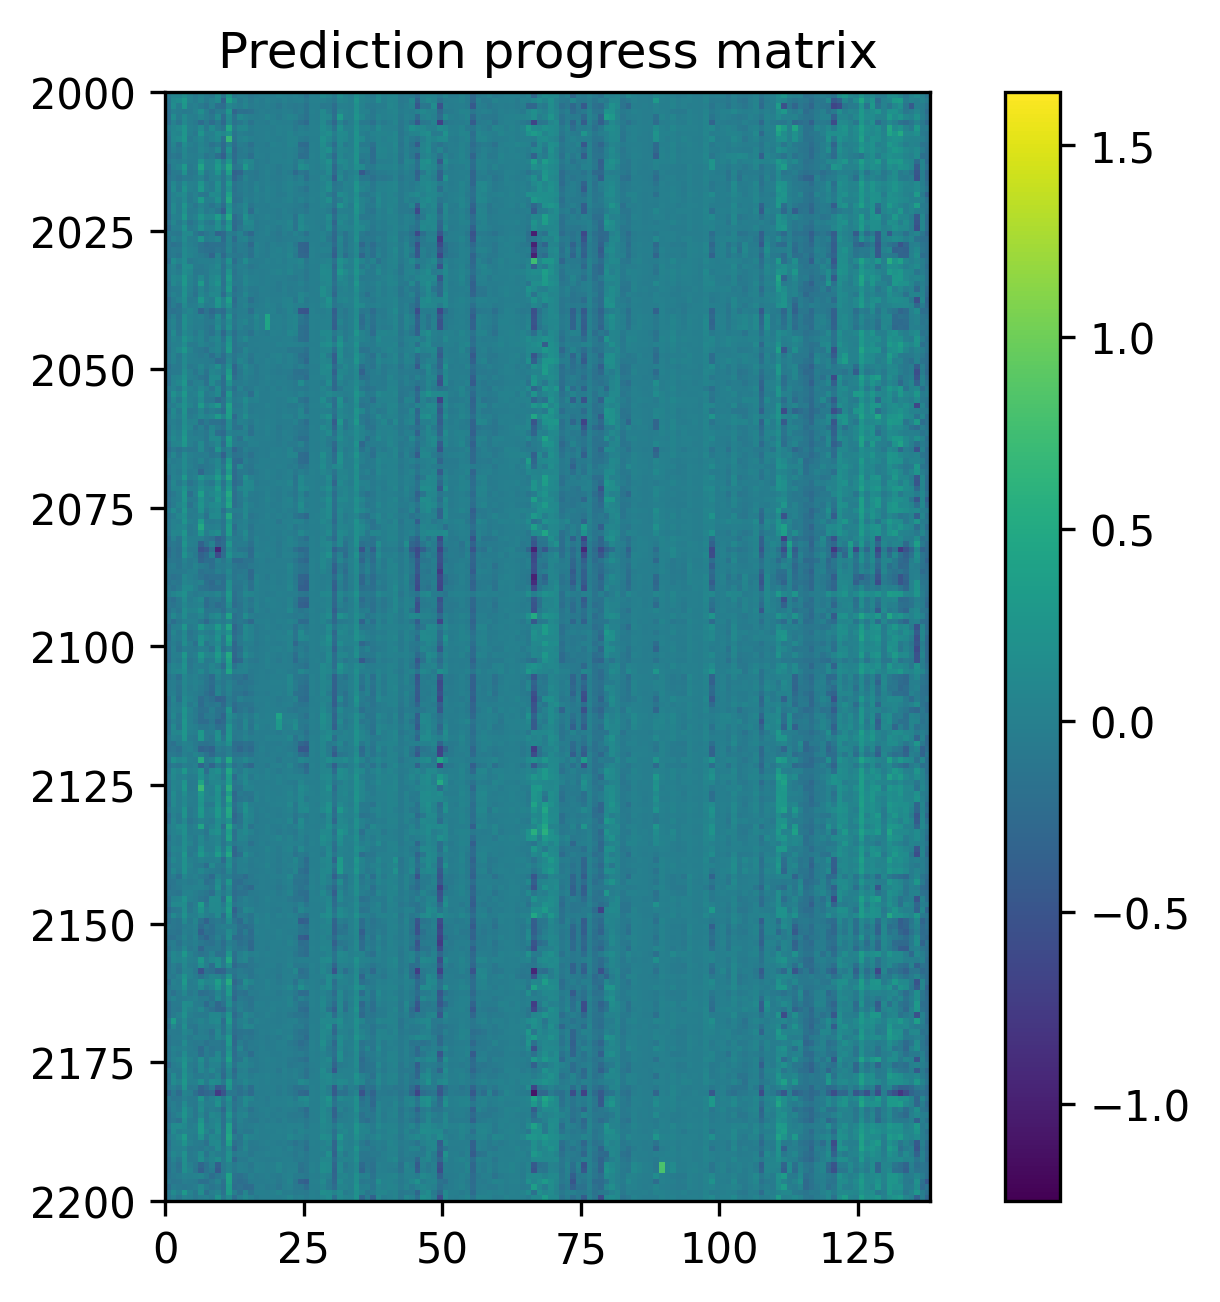

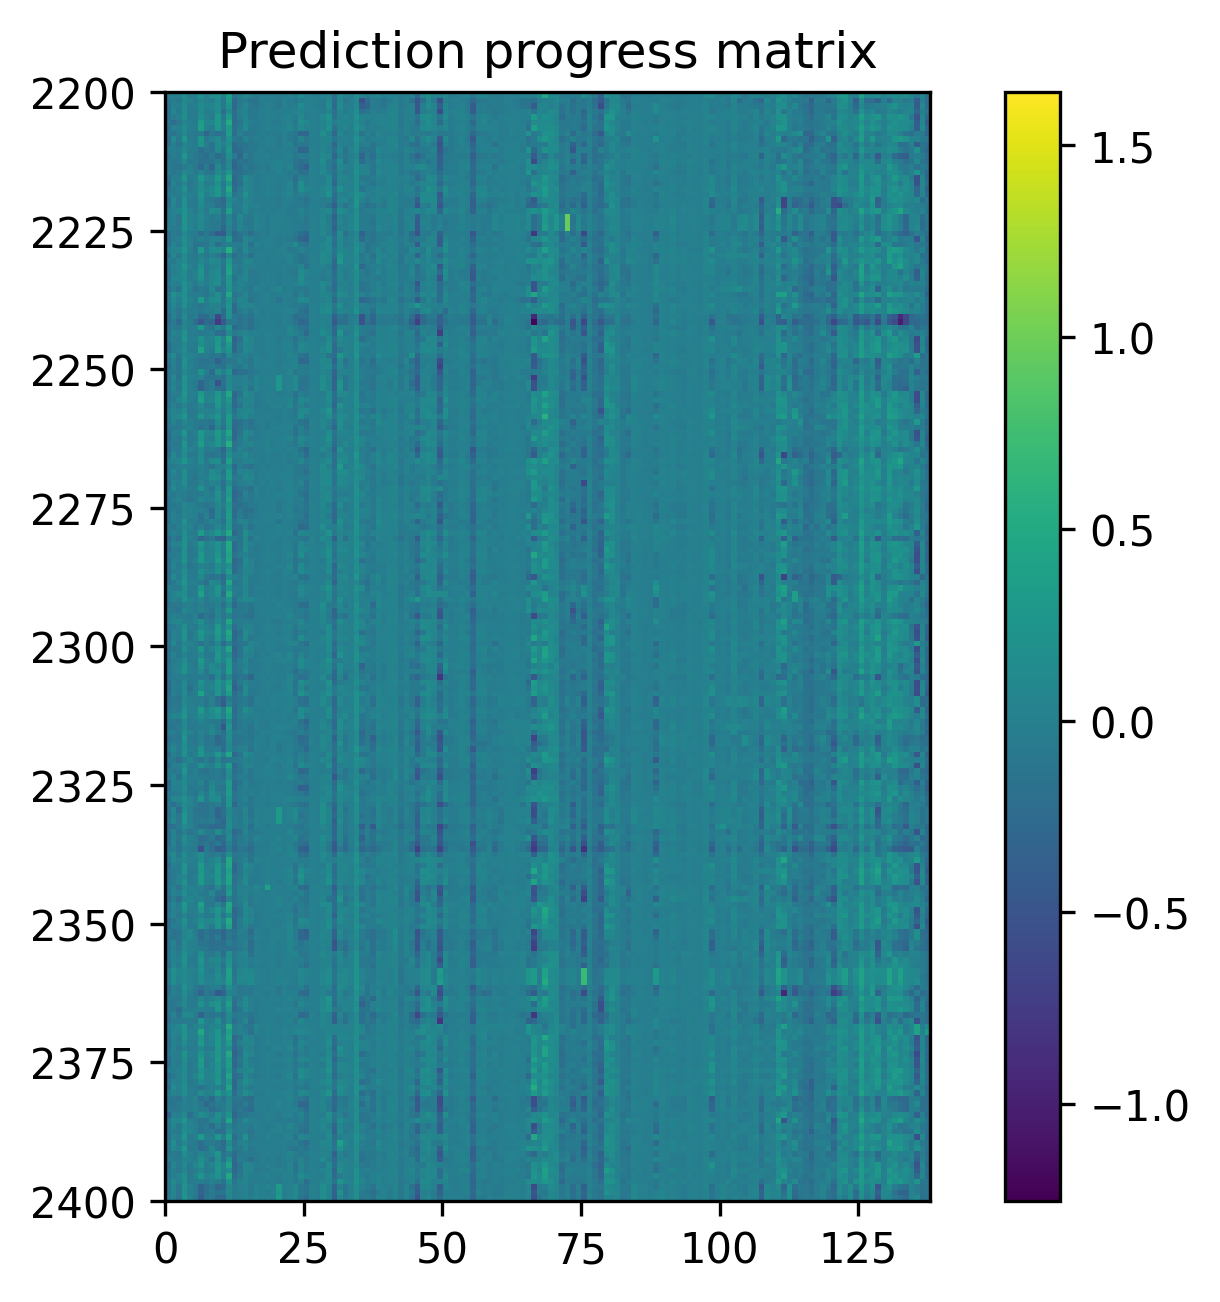

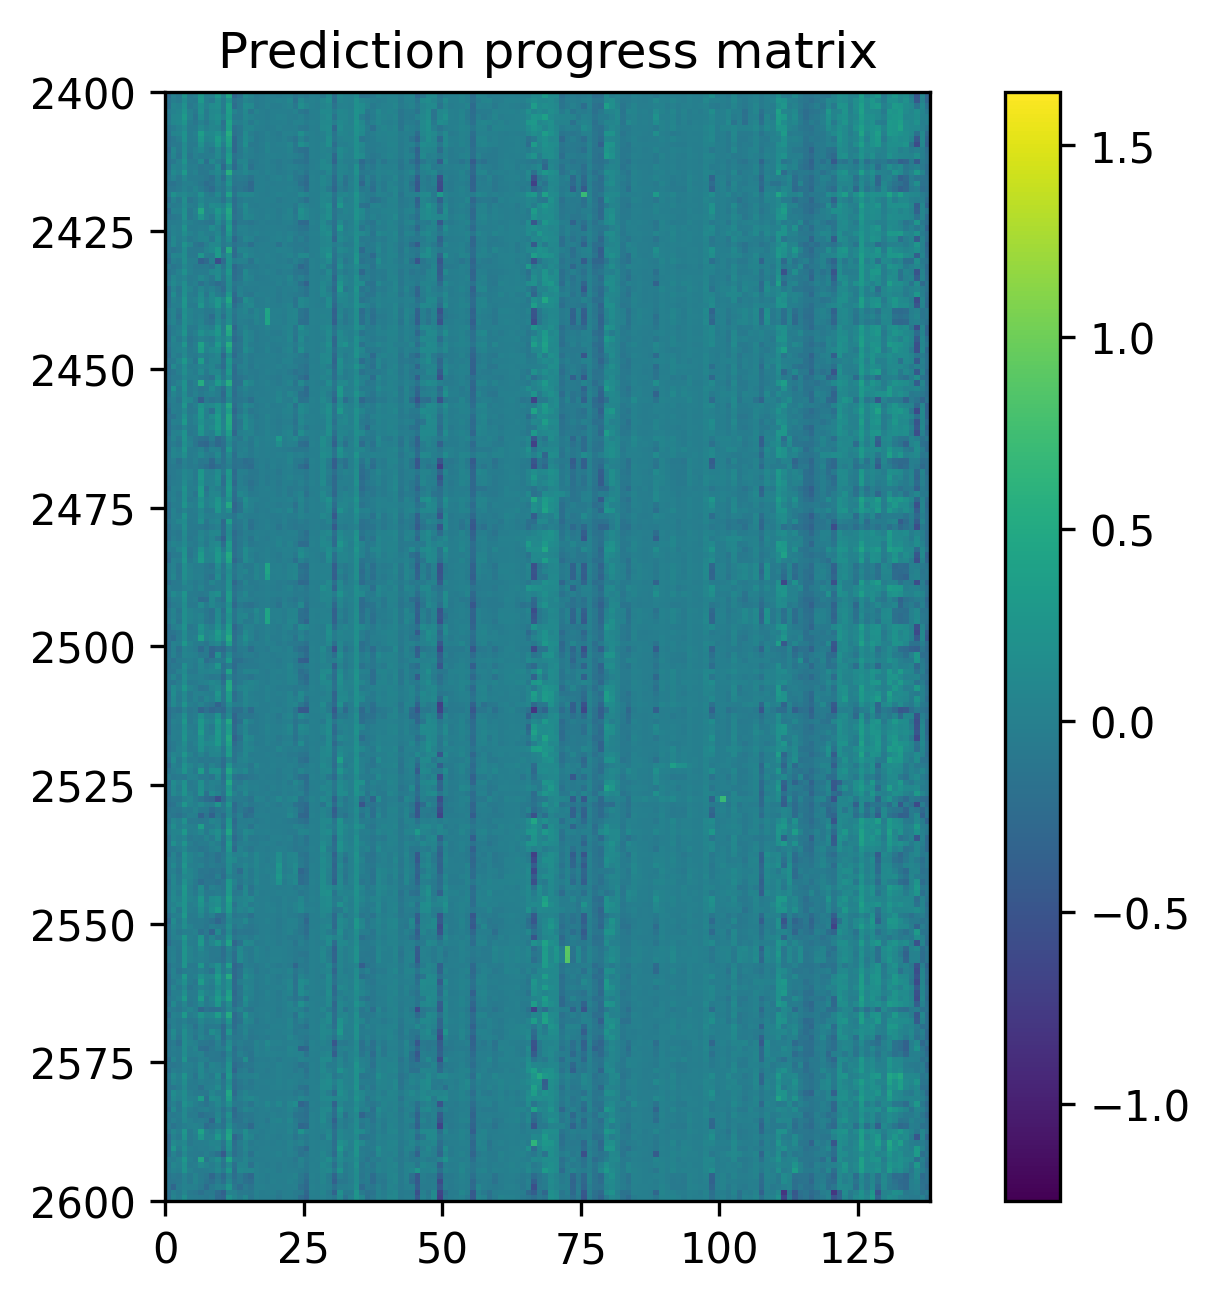

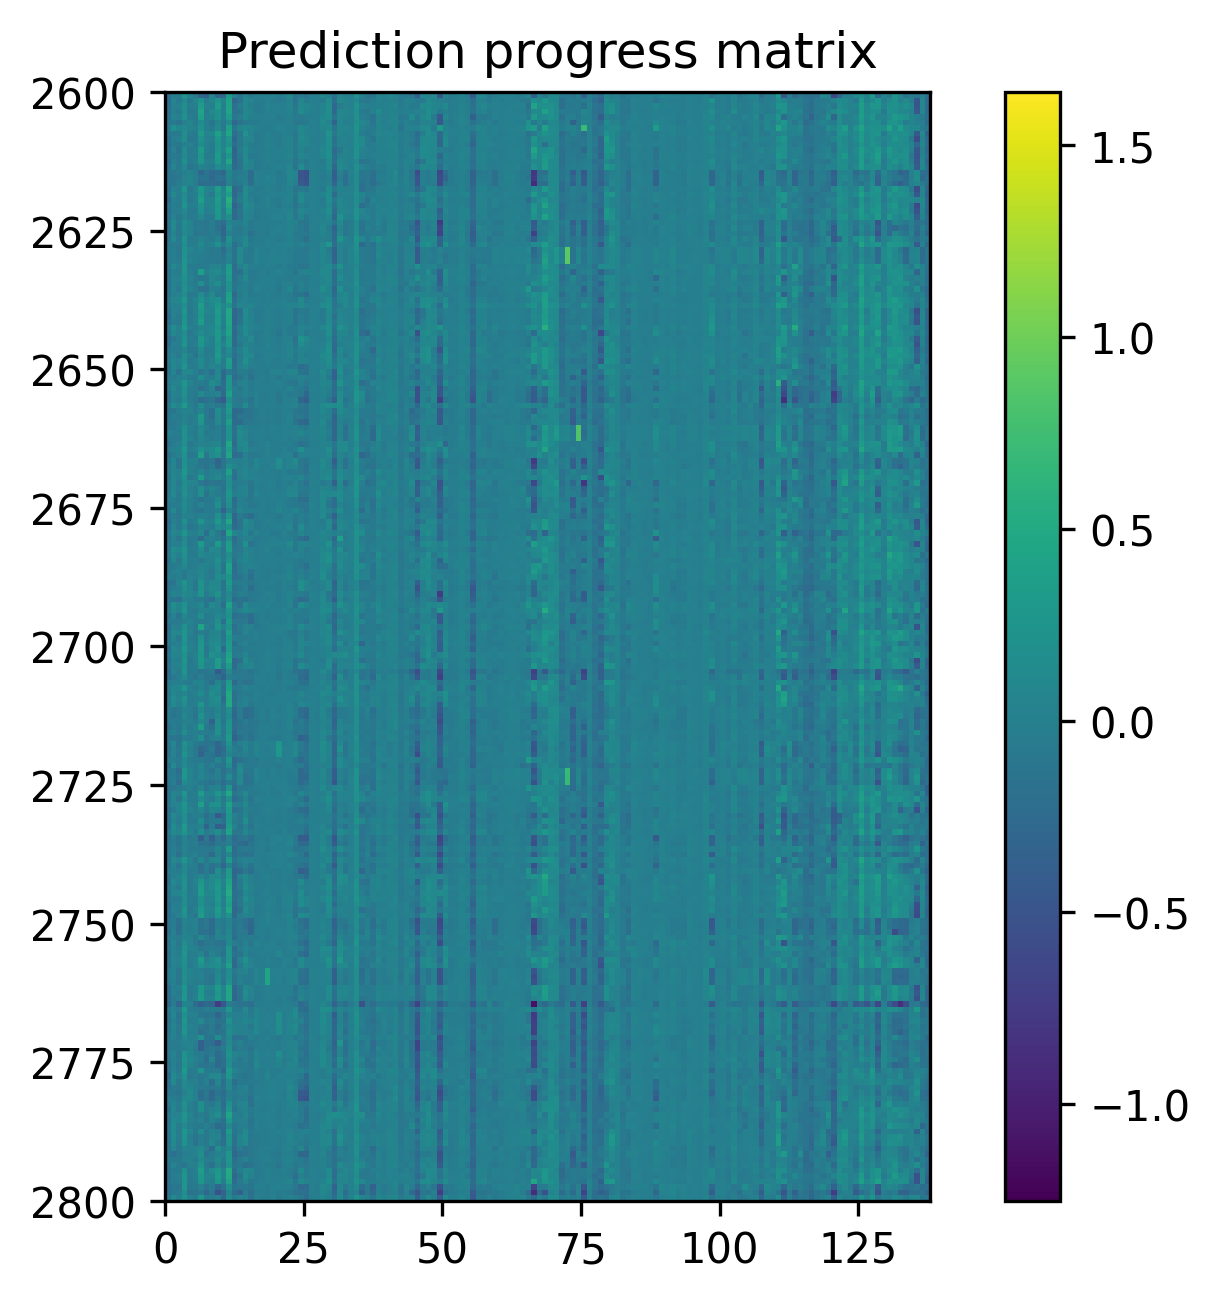

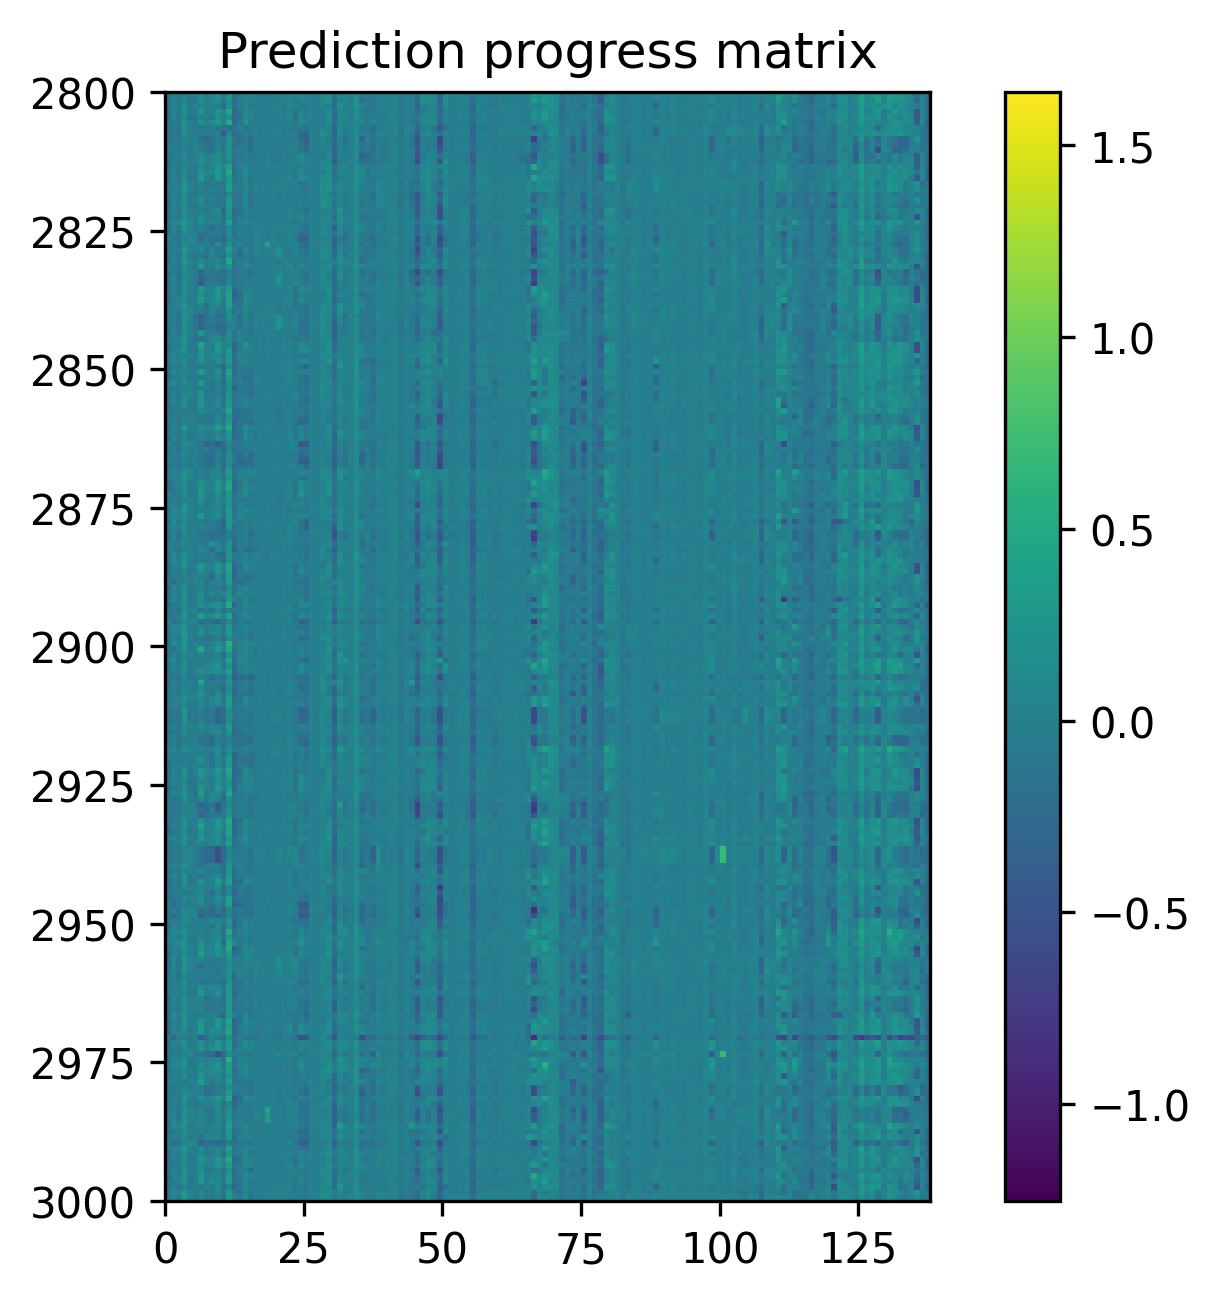

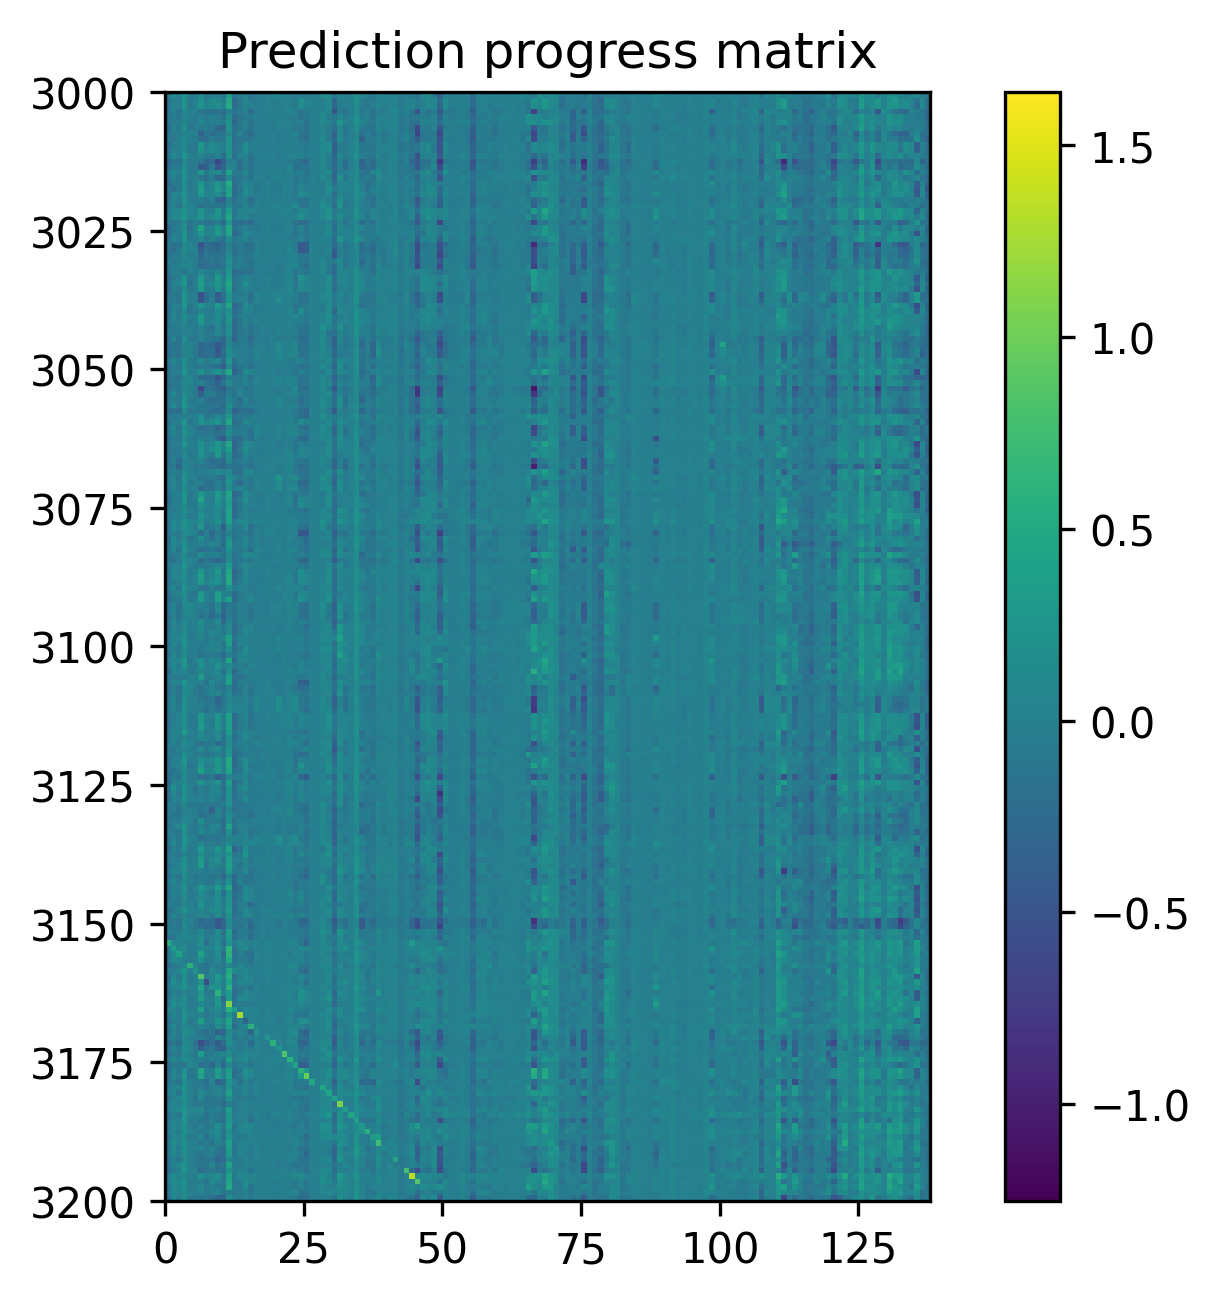

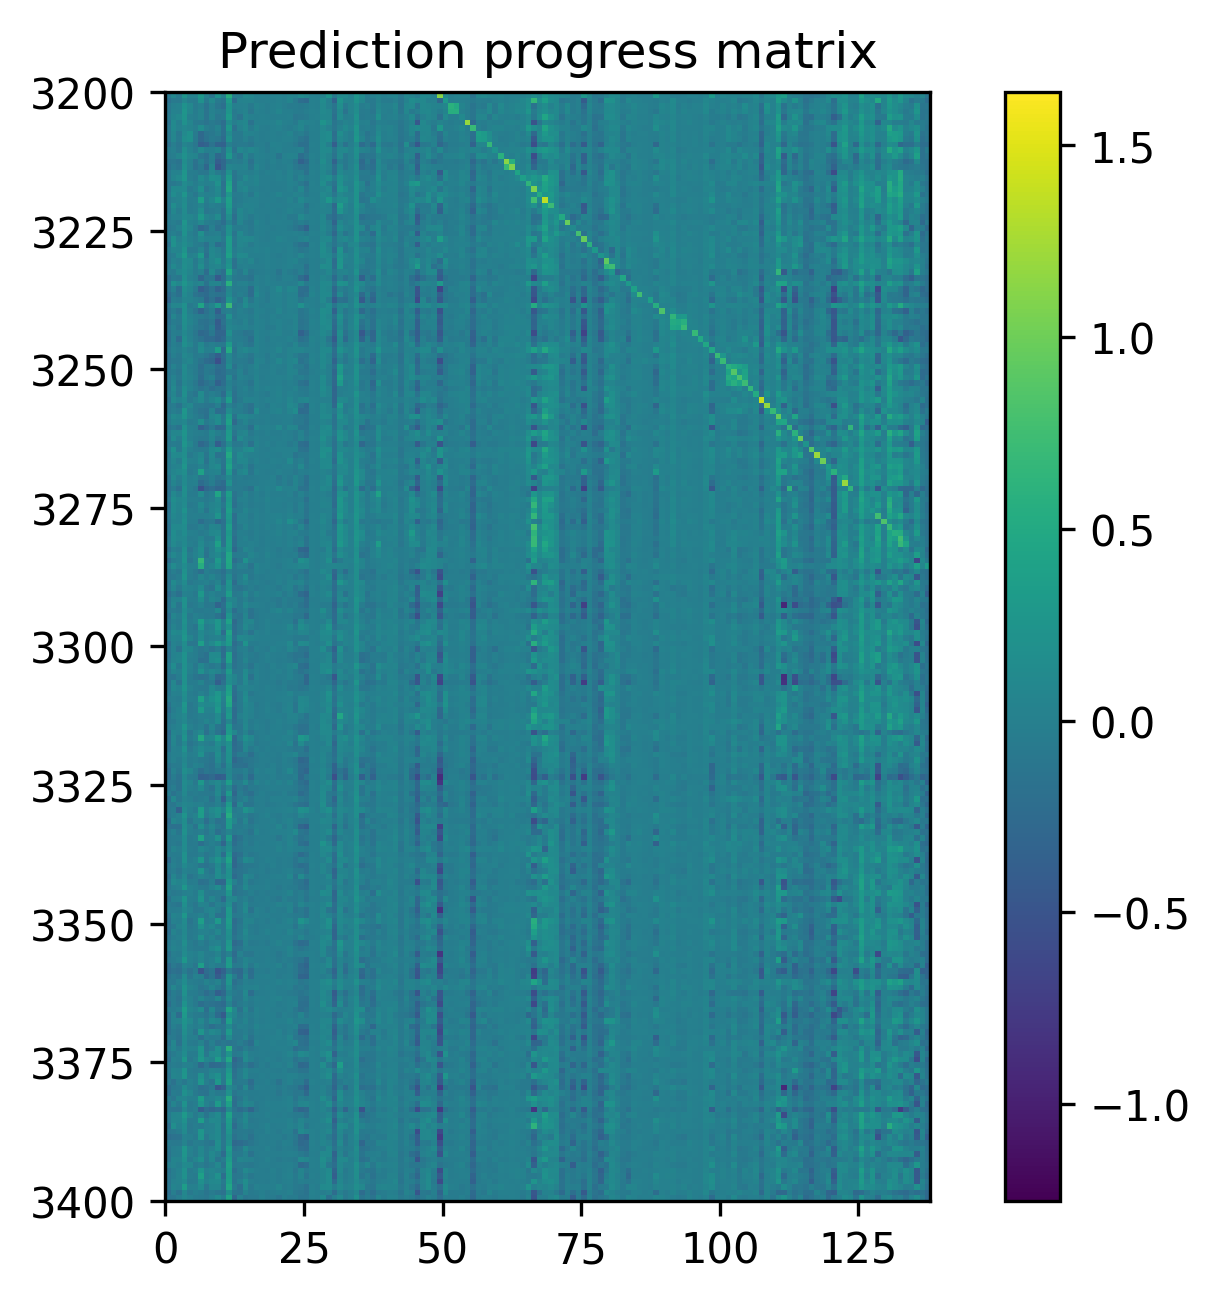

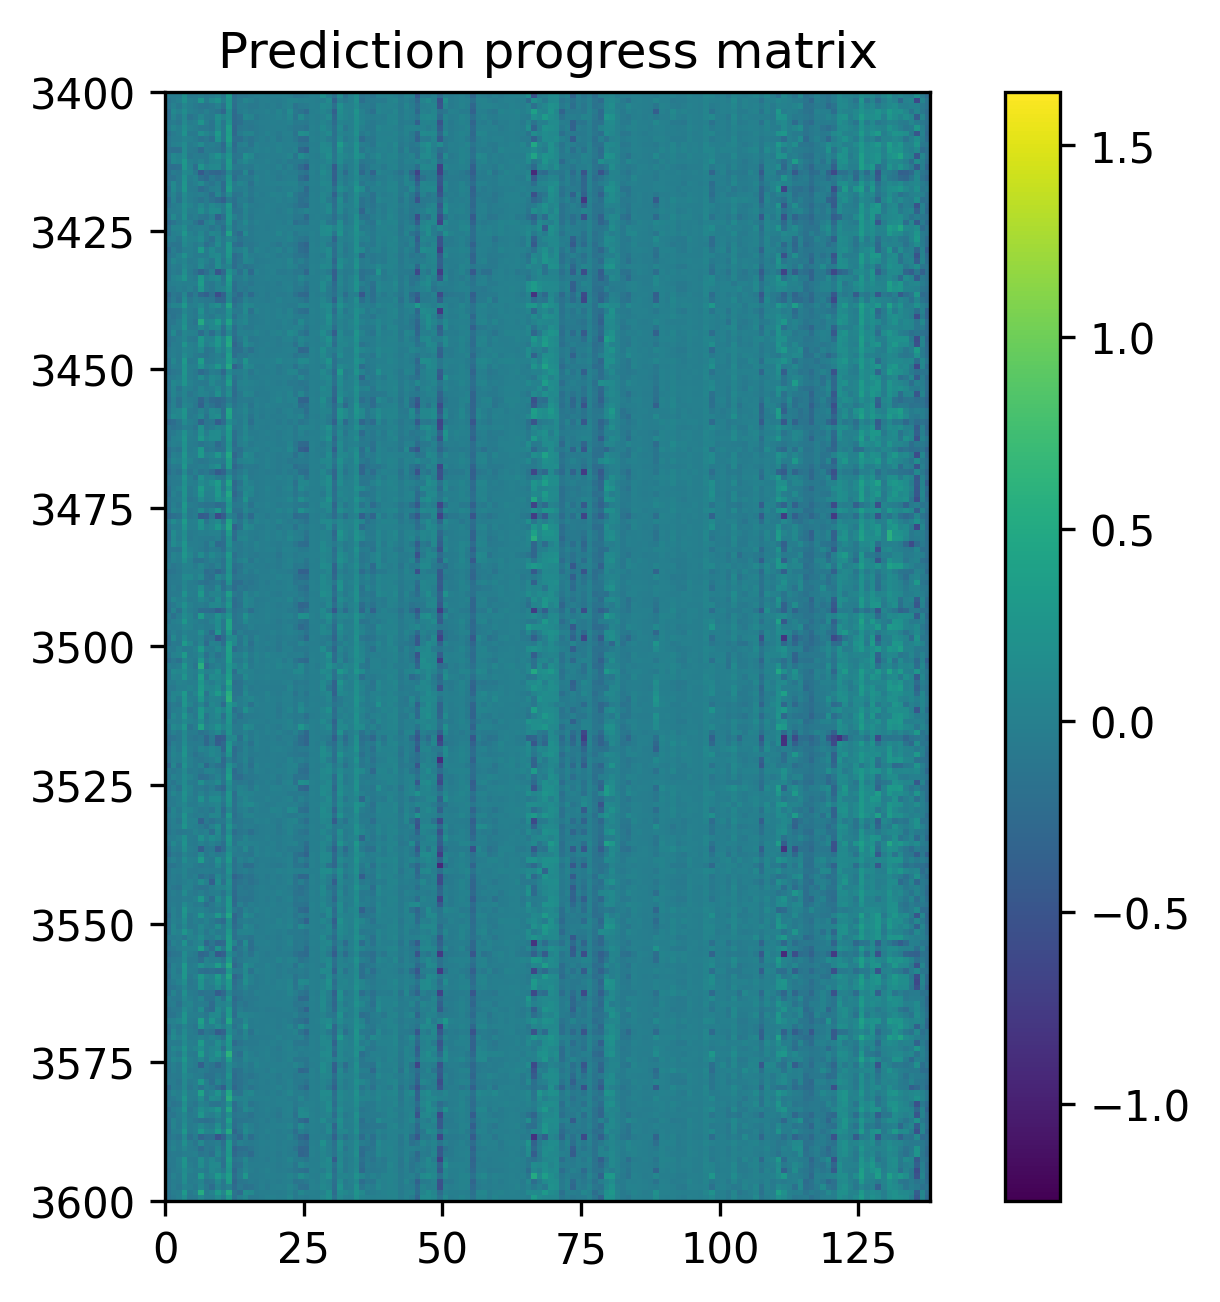

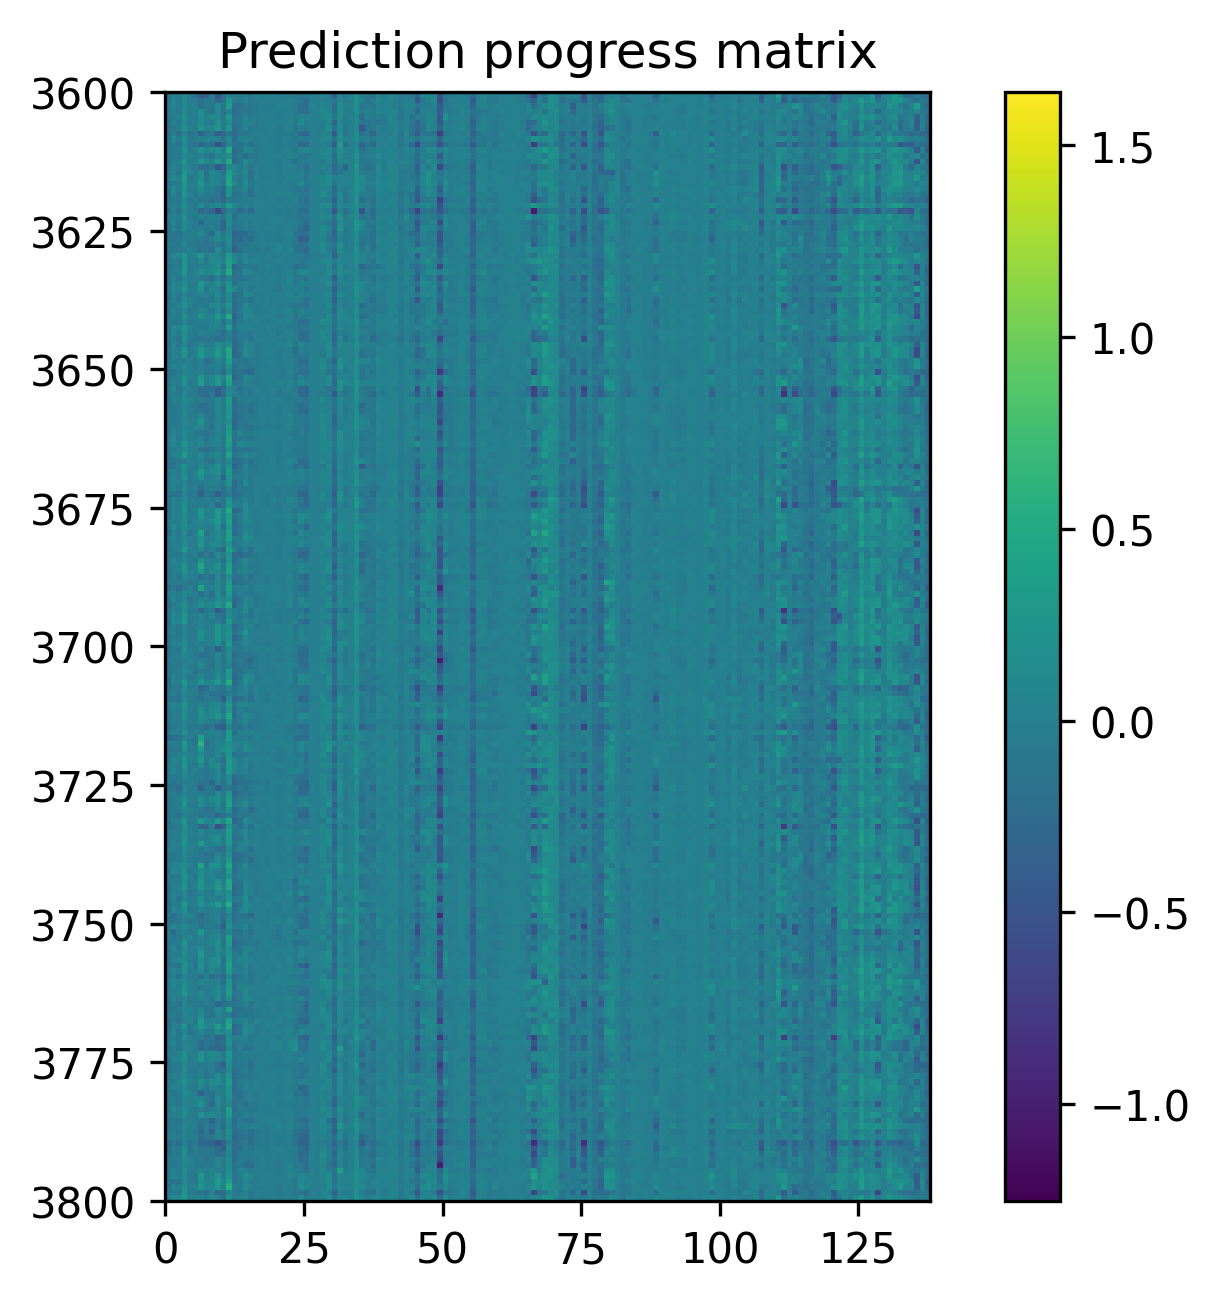

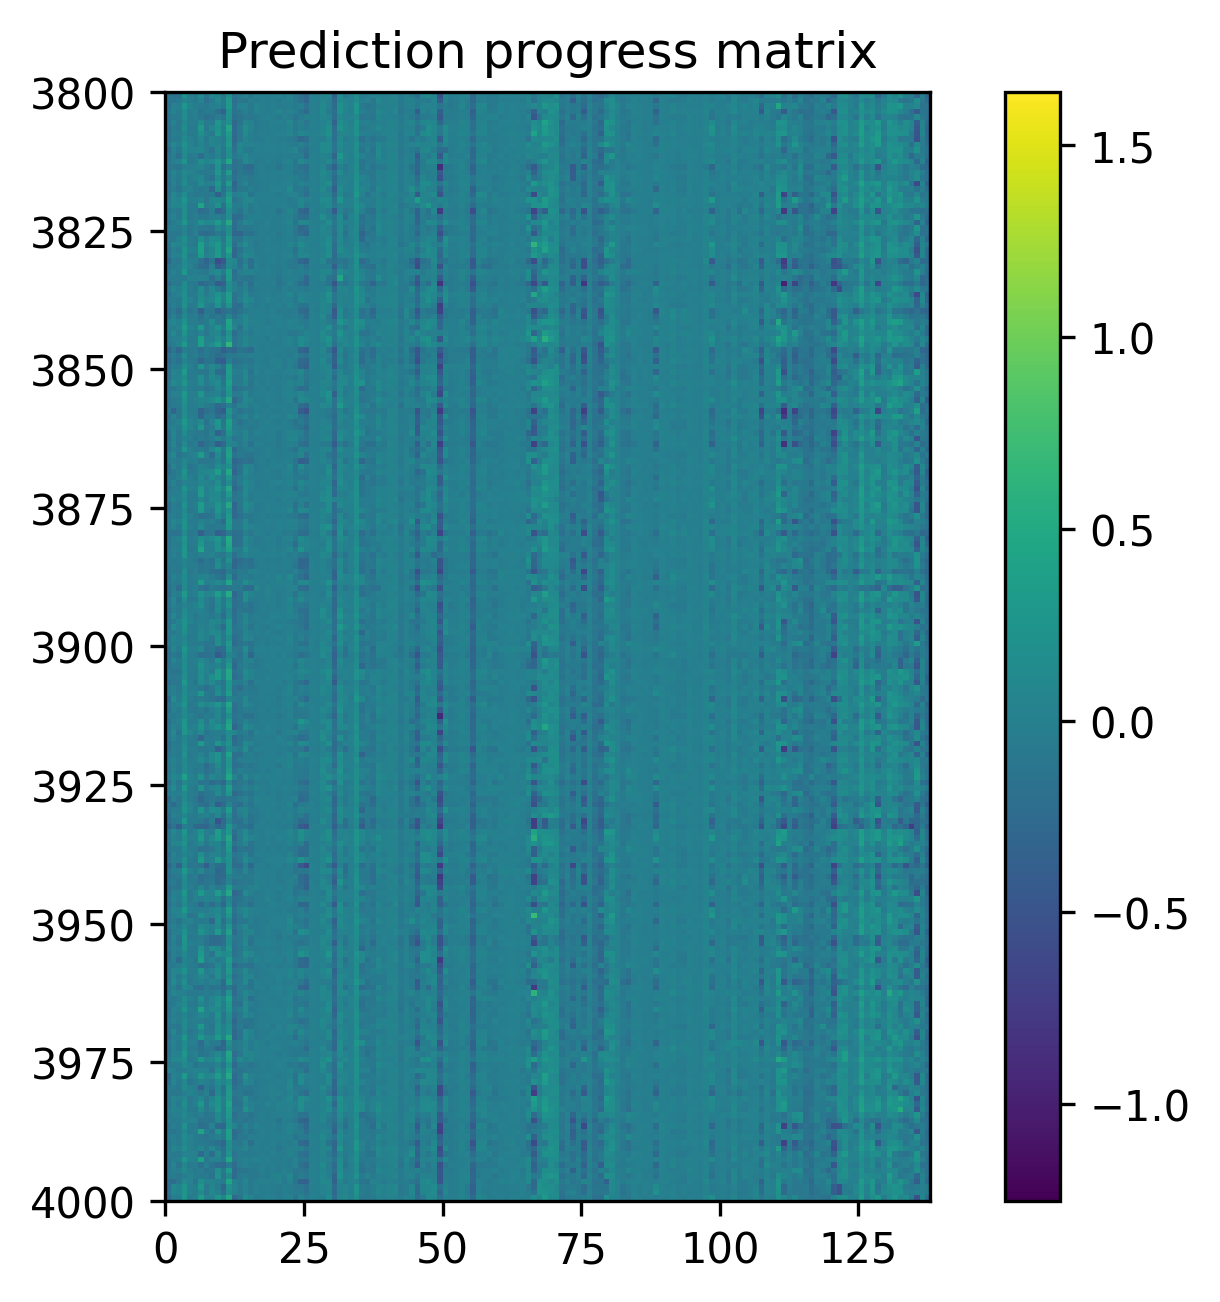

In [52]:
l = 200
for i in range(0, matrix_train.shape[0] // l):
    plot_matrix(matrix_train[i*l:(i+1)*l], 
                vmin=total_min, vmax=total_max, xmin=(i+1)*l, xmax=i*l)

In [53]:
matrix_train.shape

torch.Size([4110, 138])

In [54]:
matrix_test.shape

torch.Size([4110, 230])

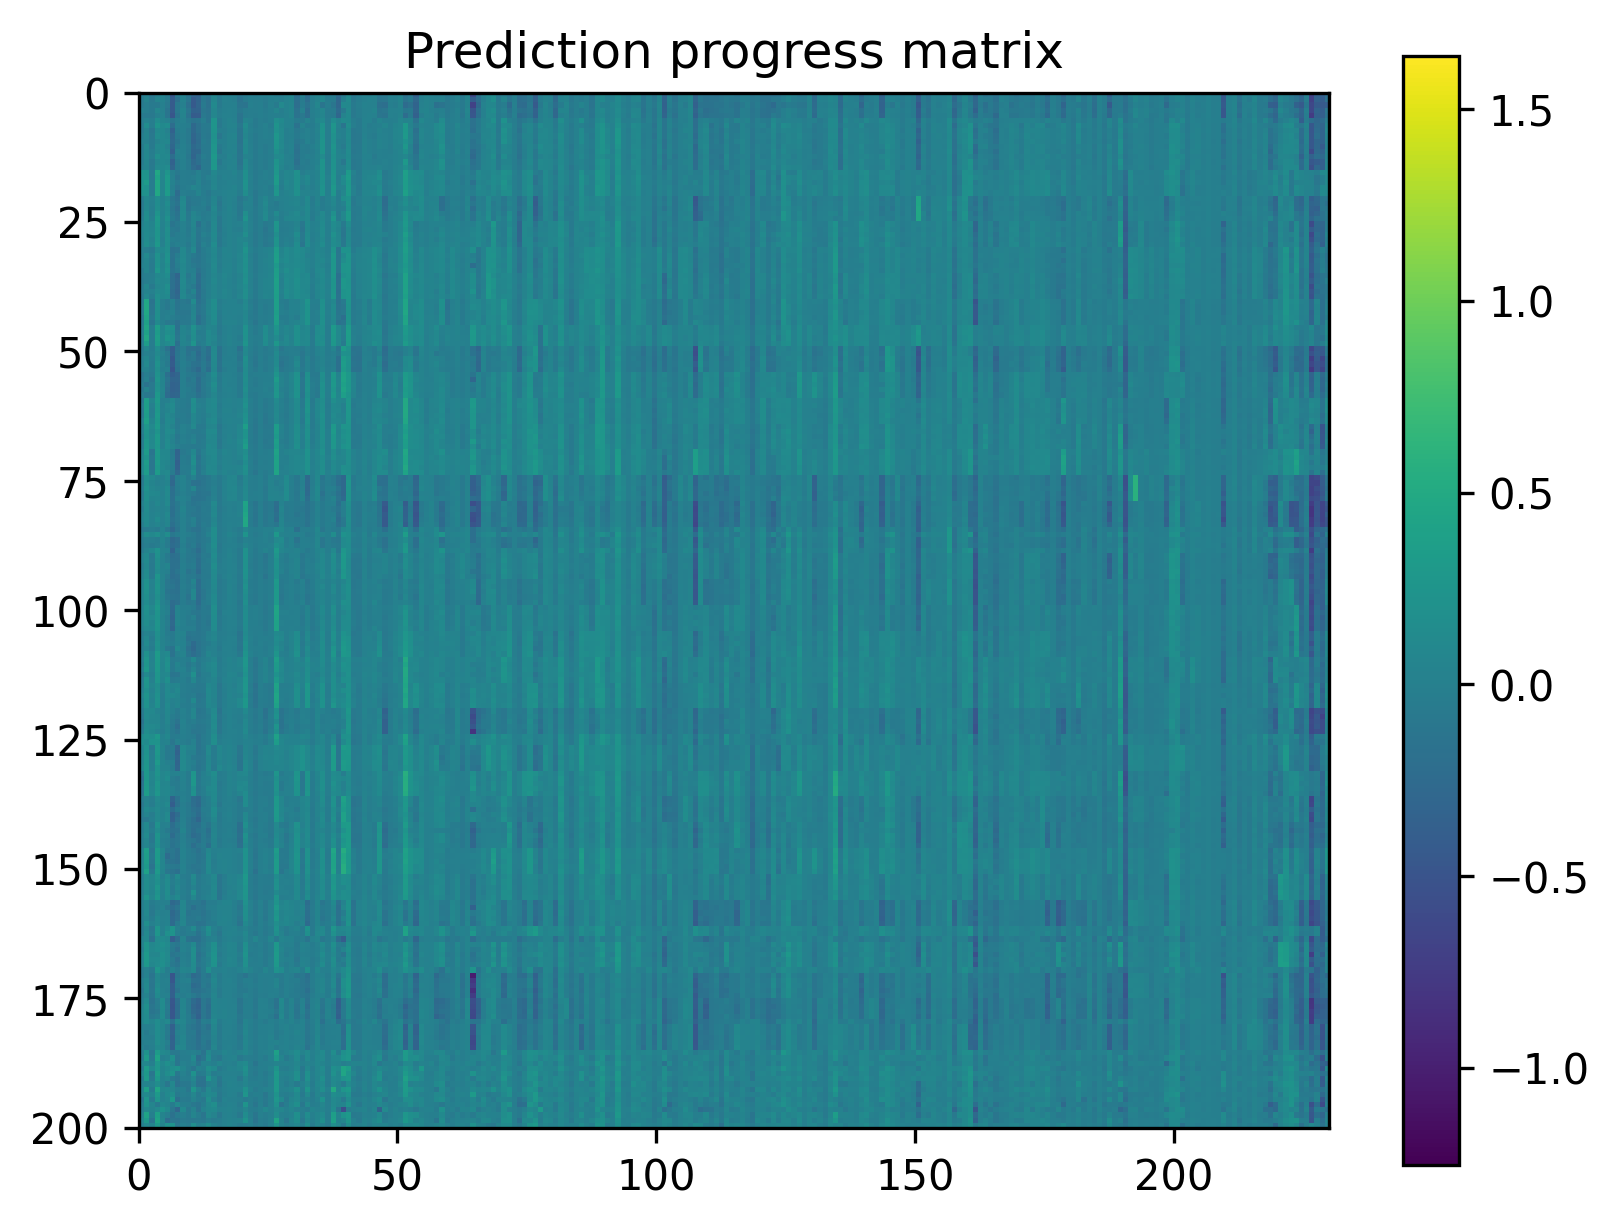

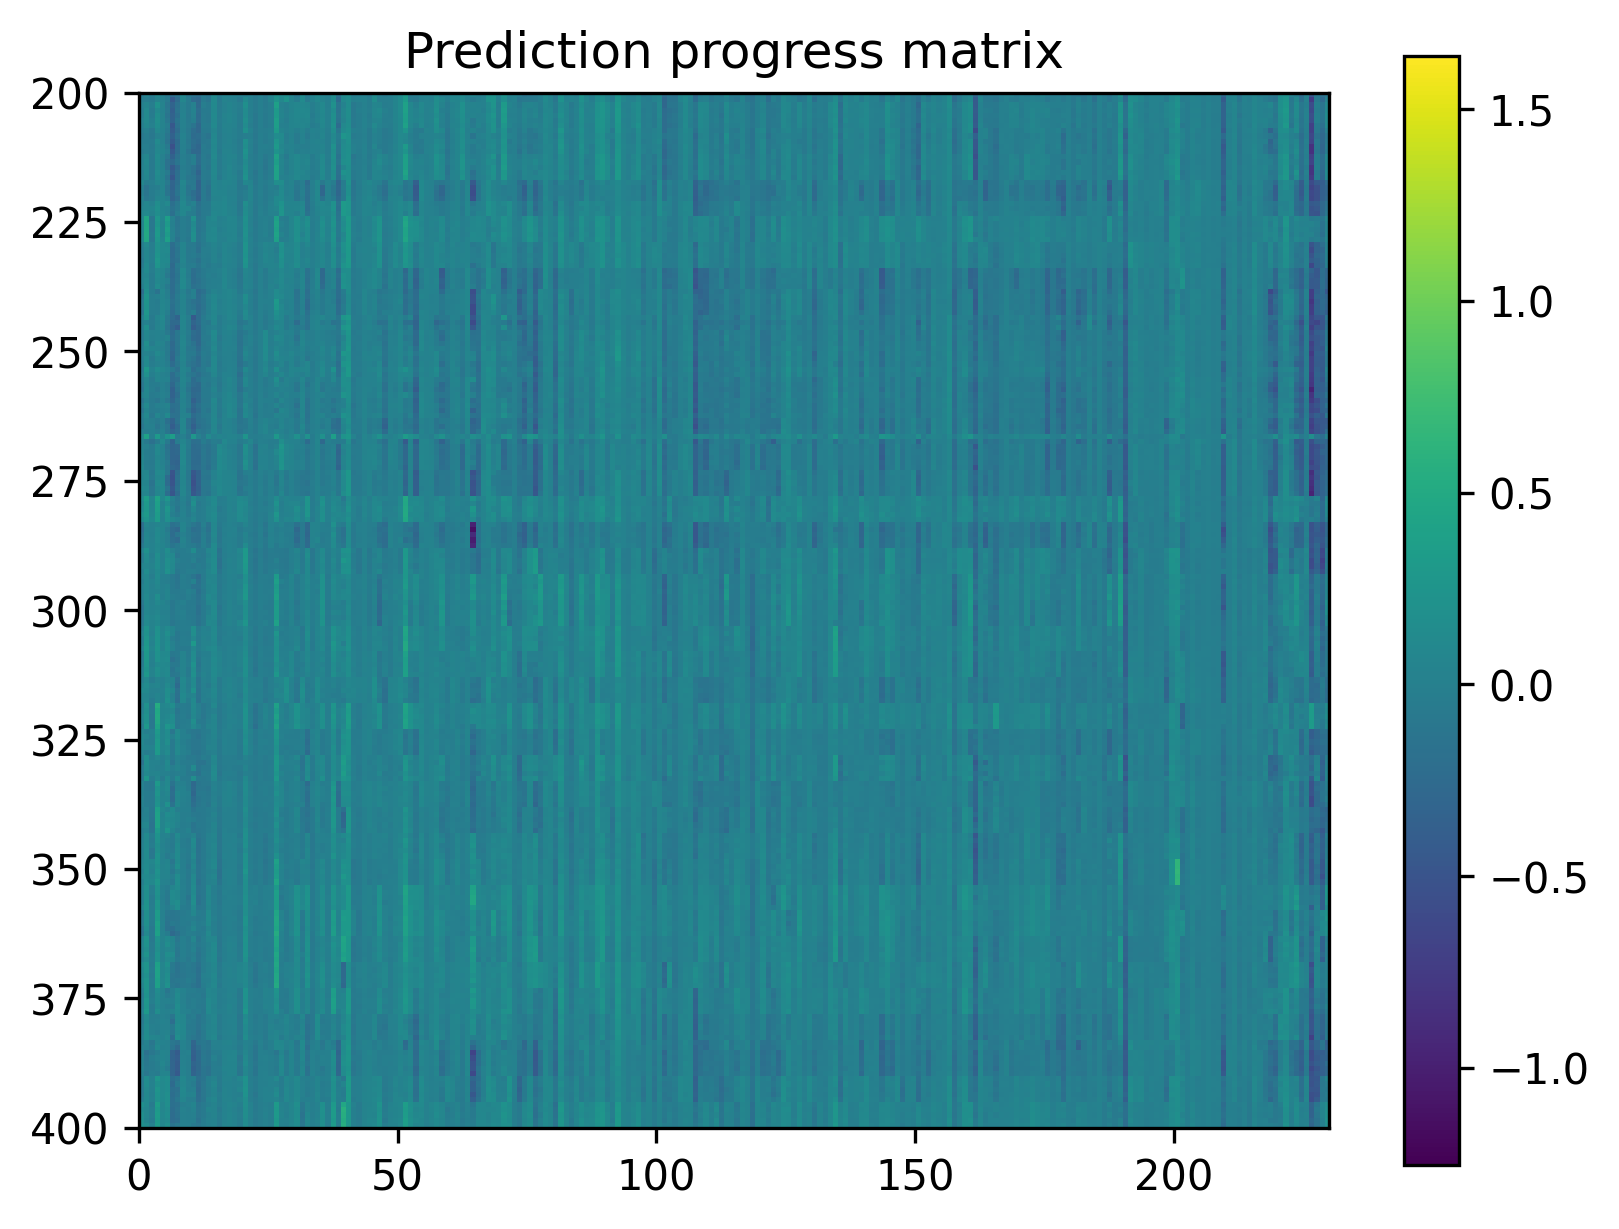

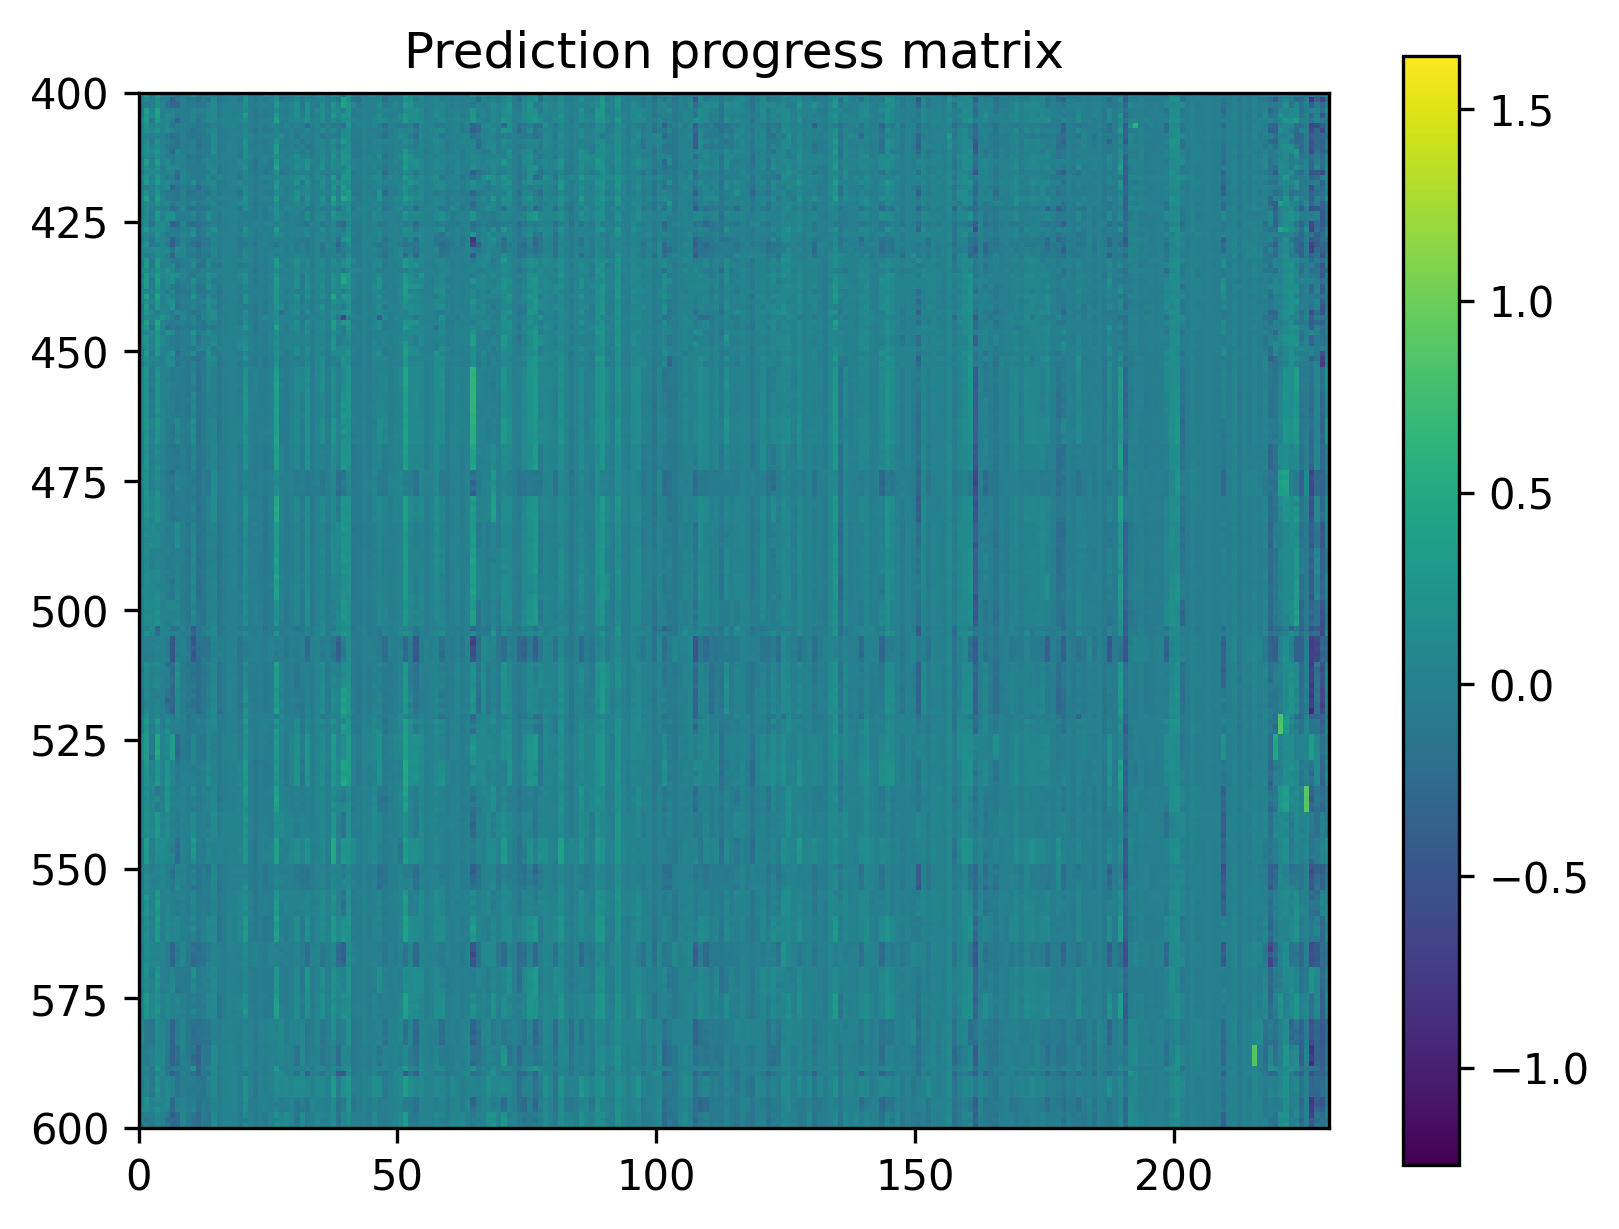

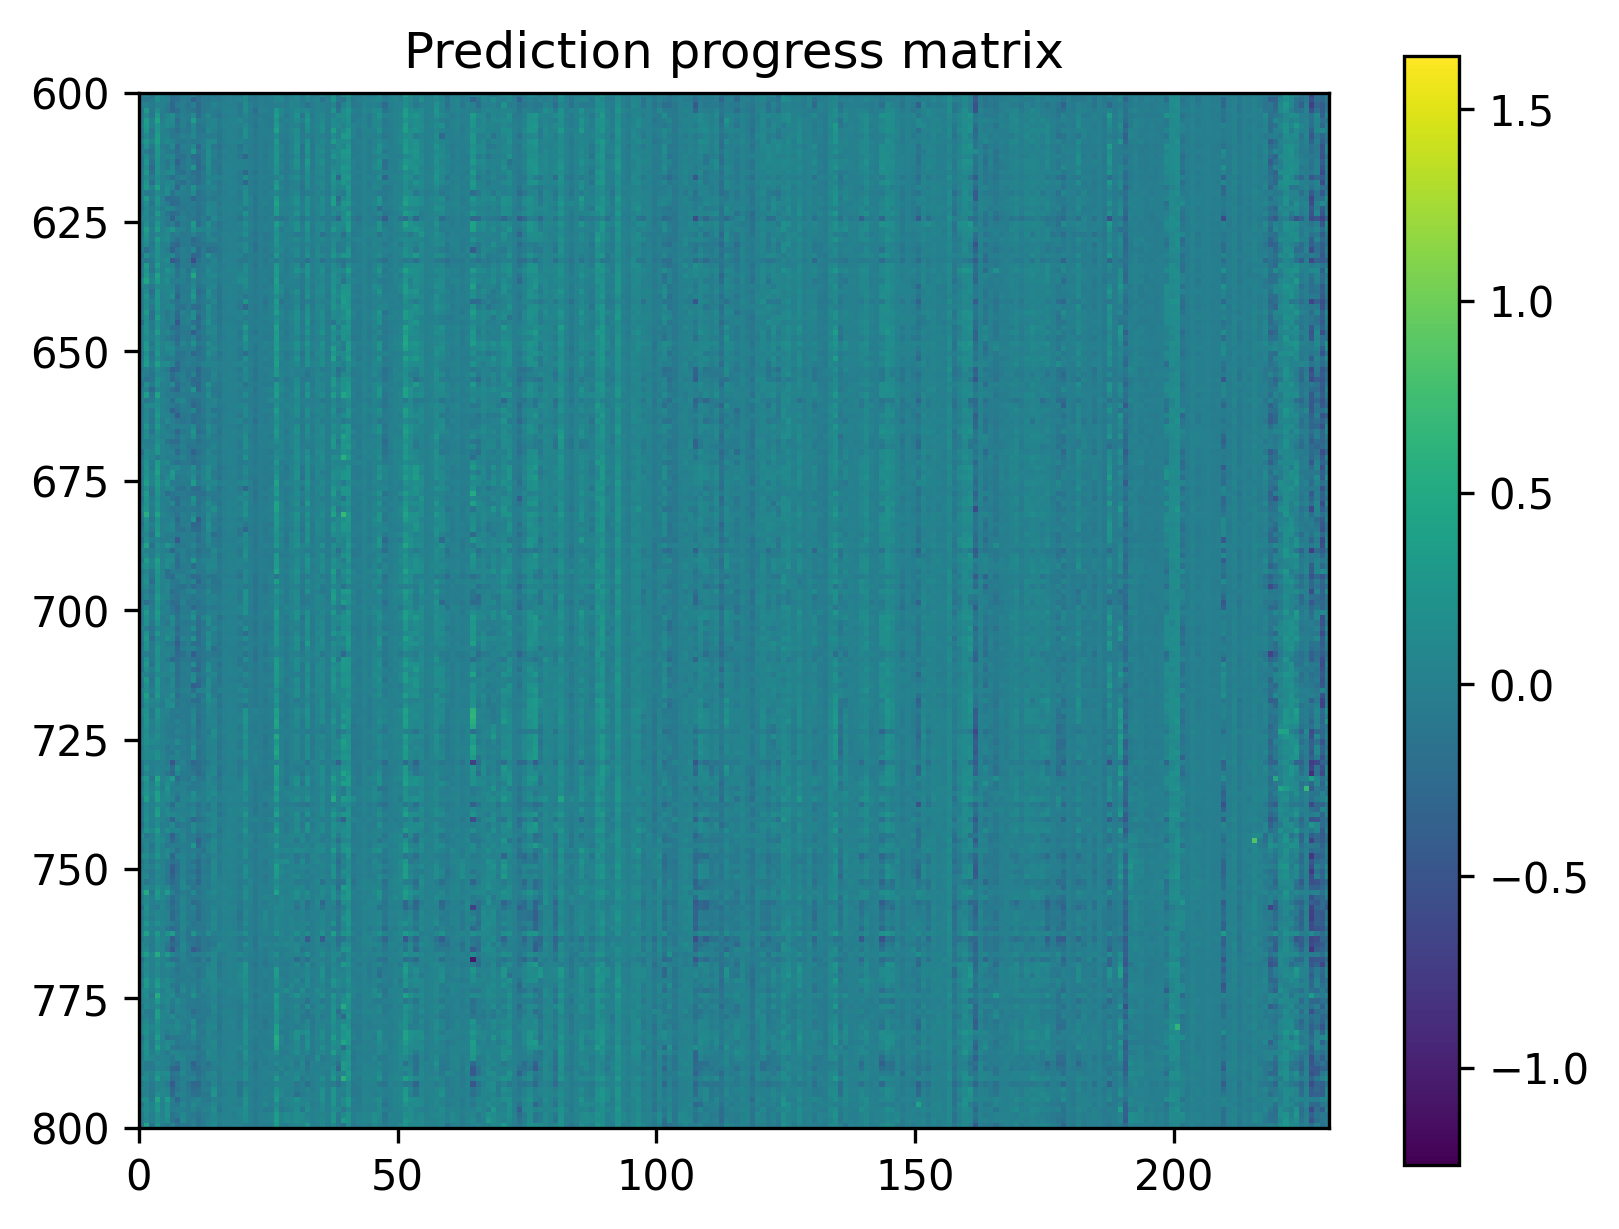

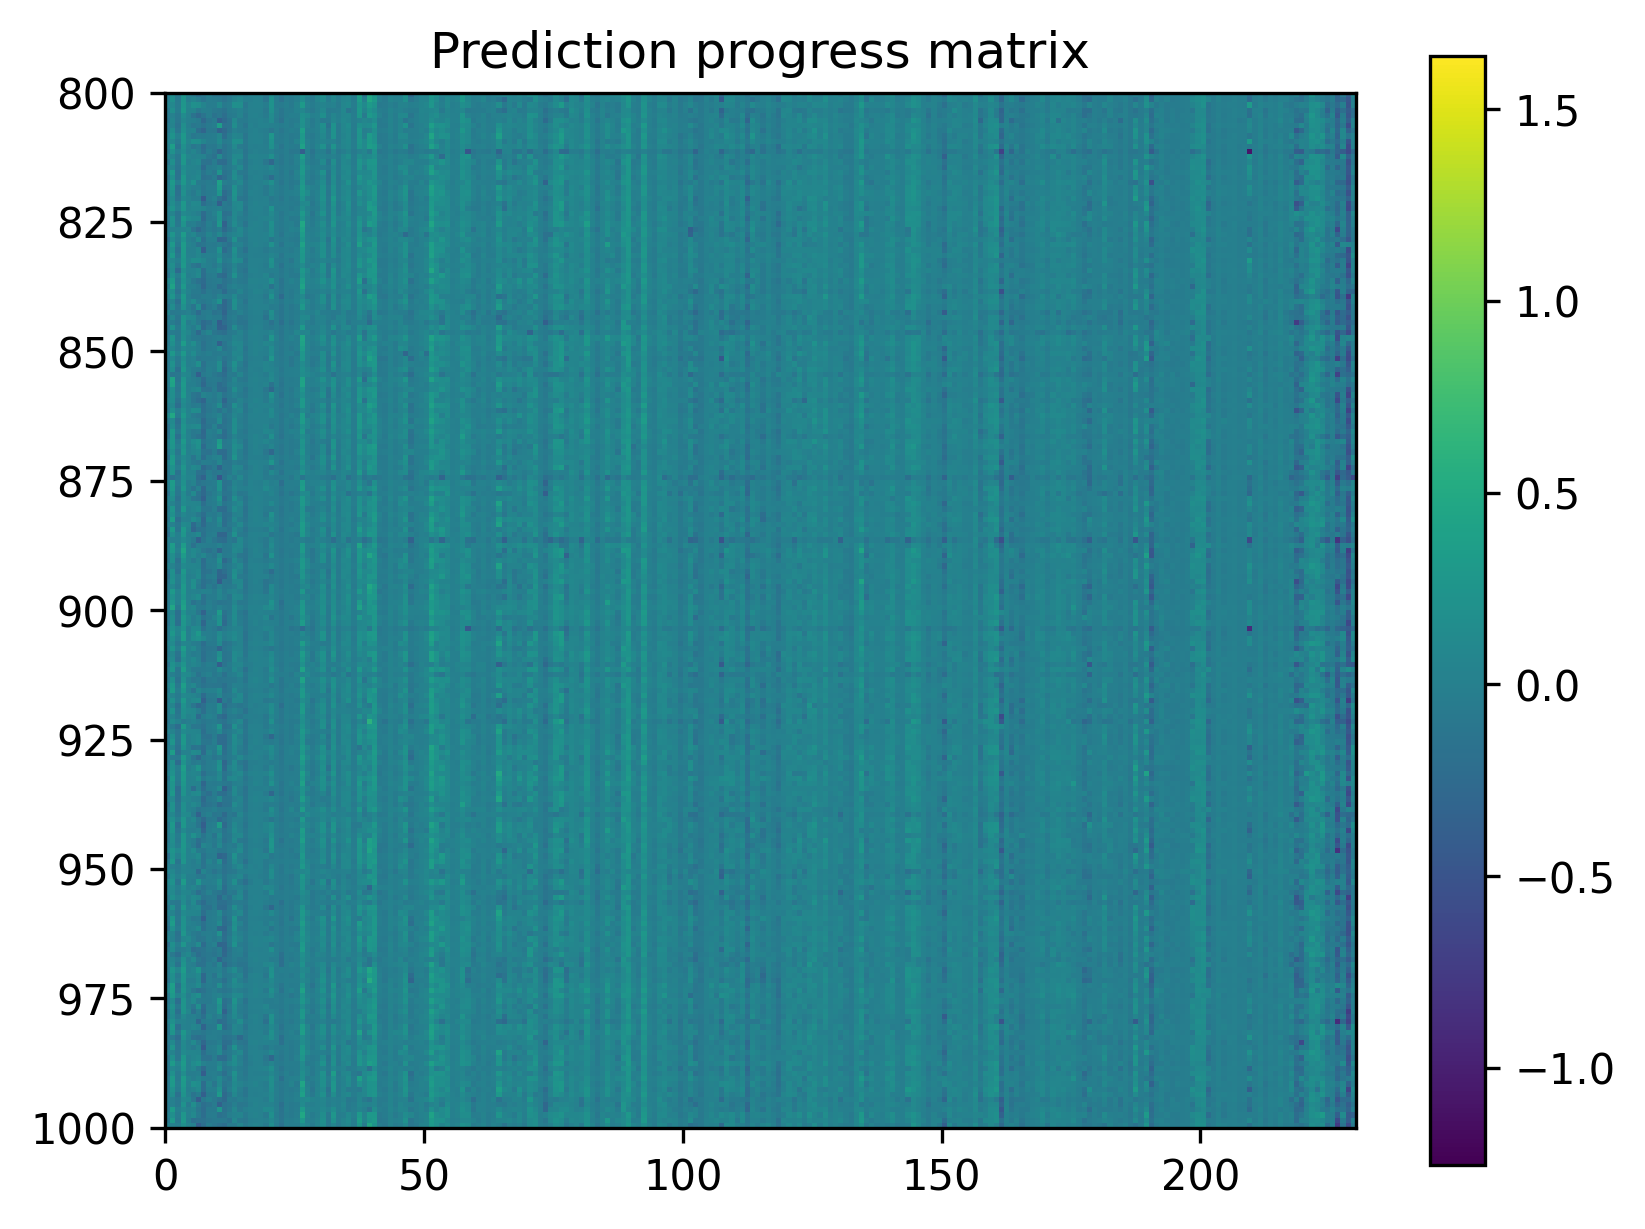

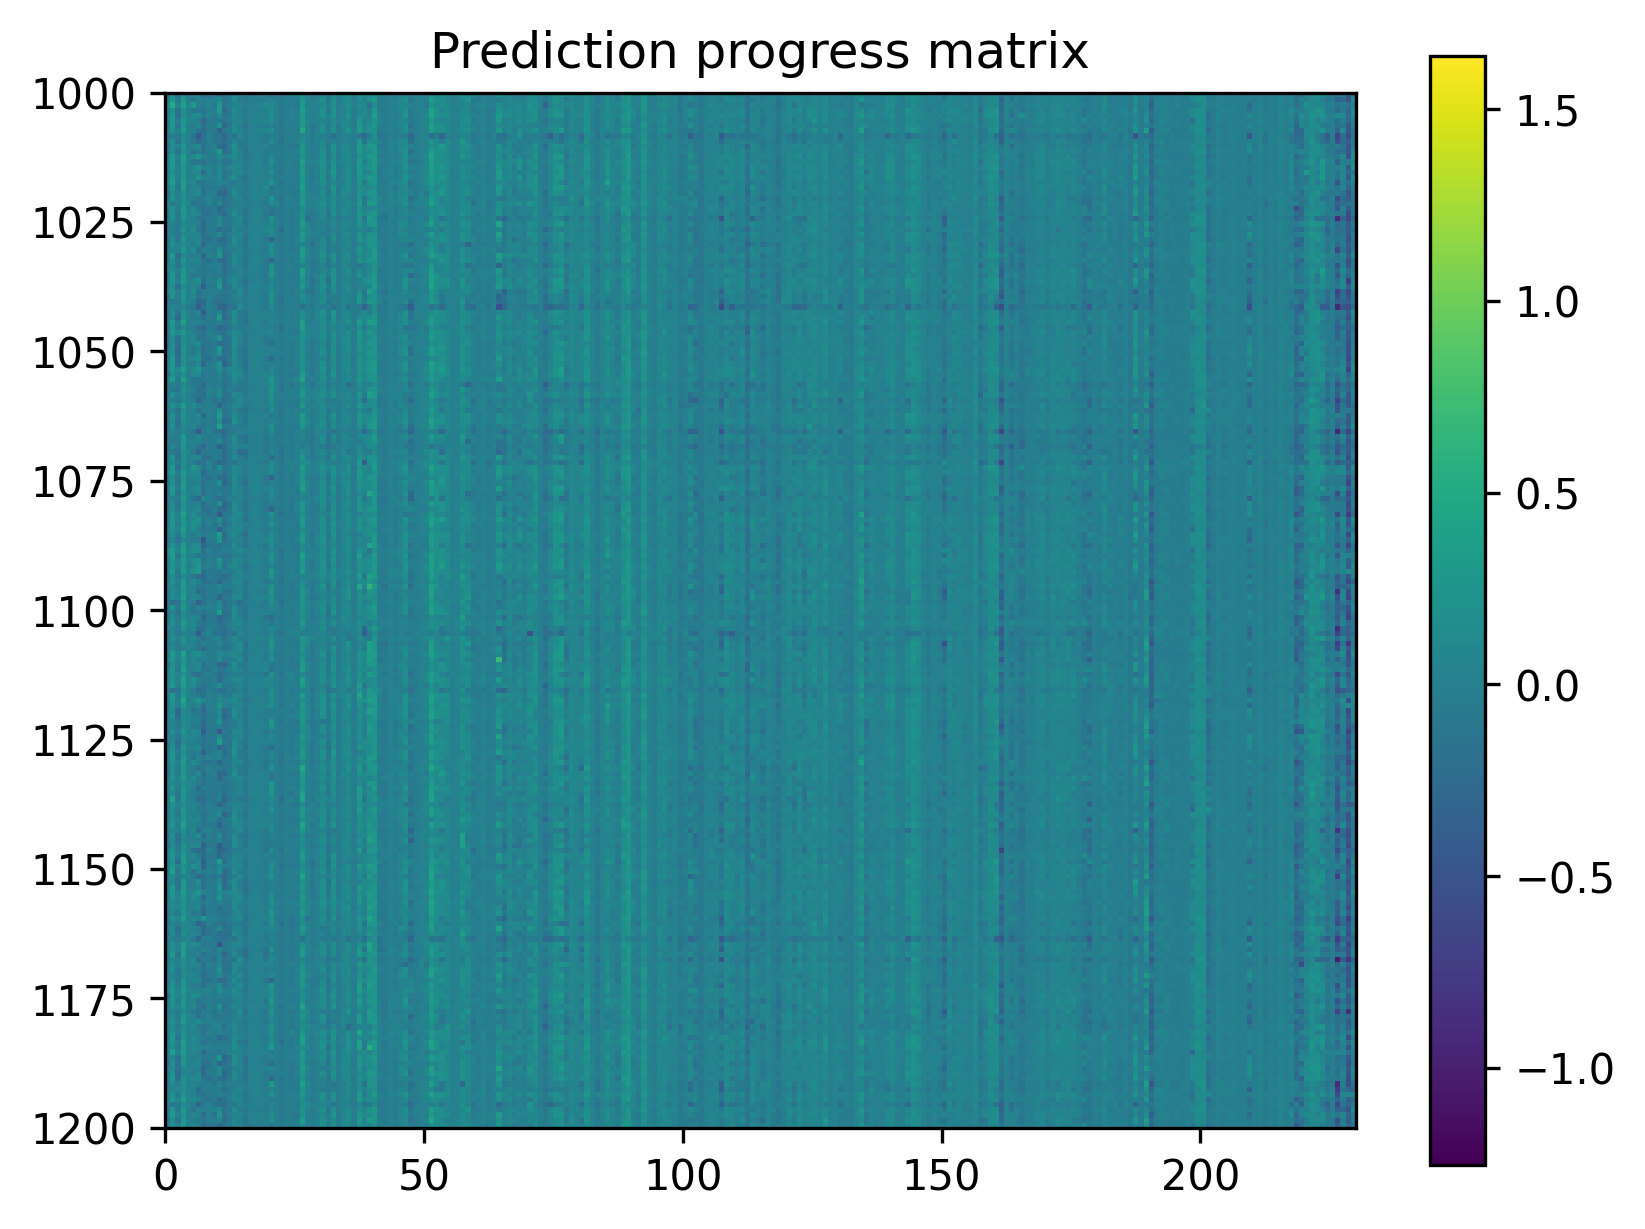

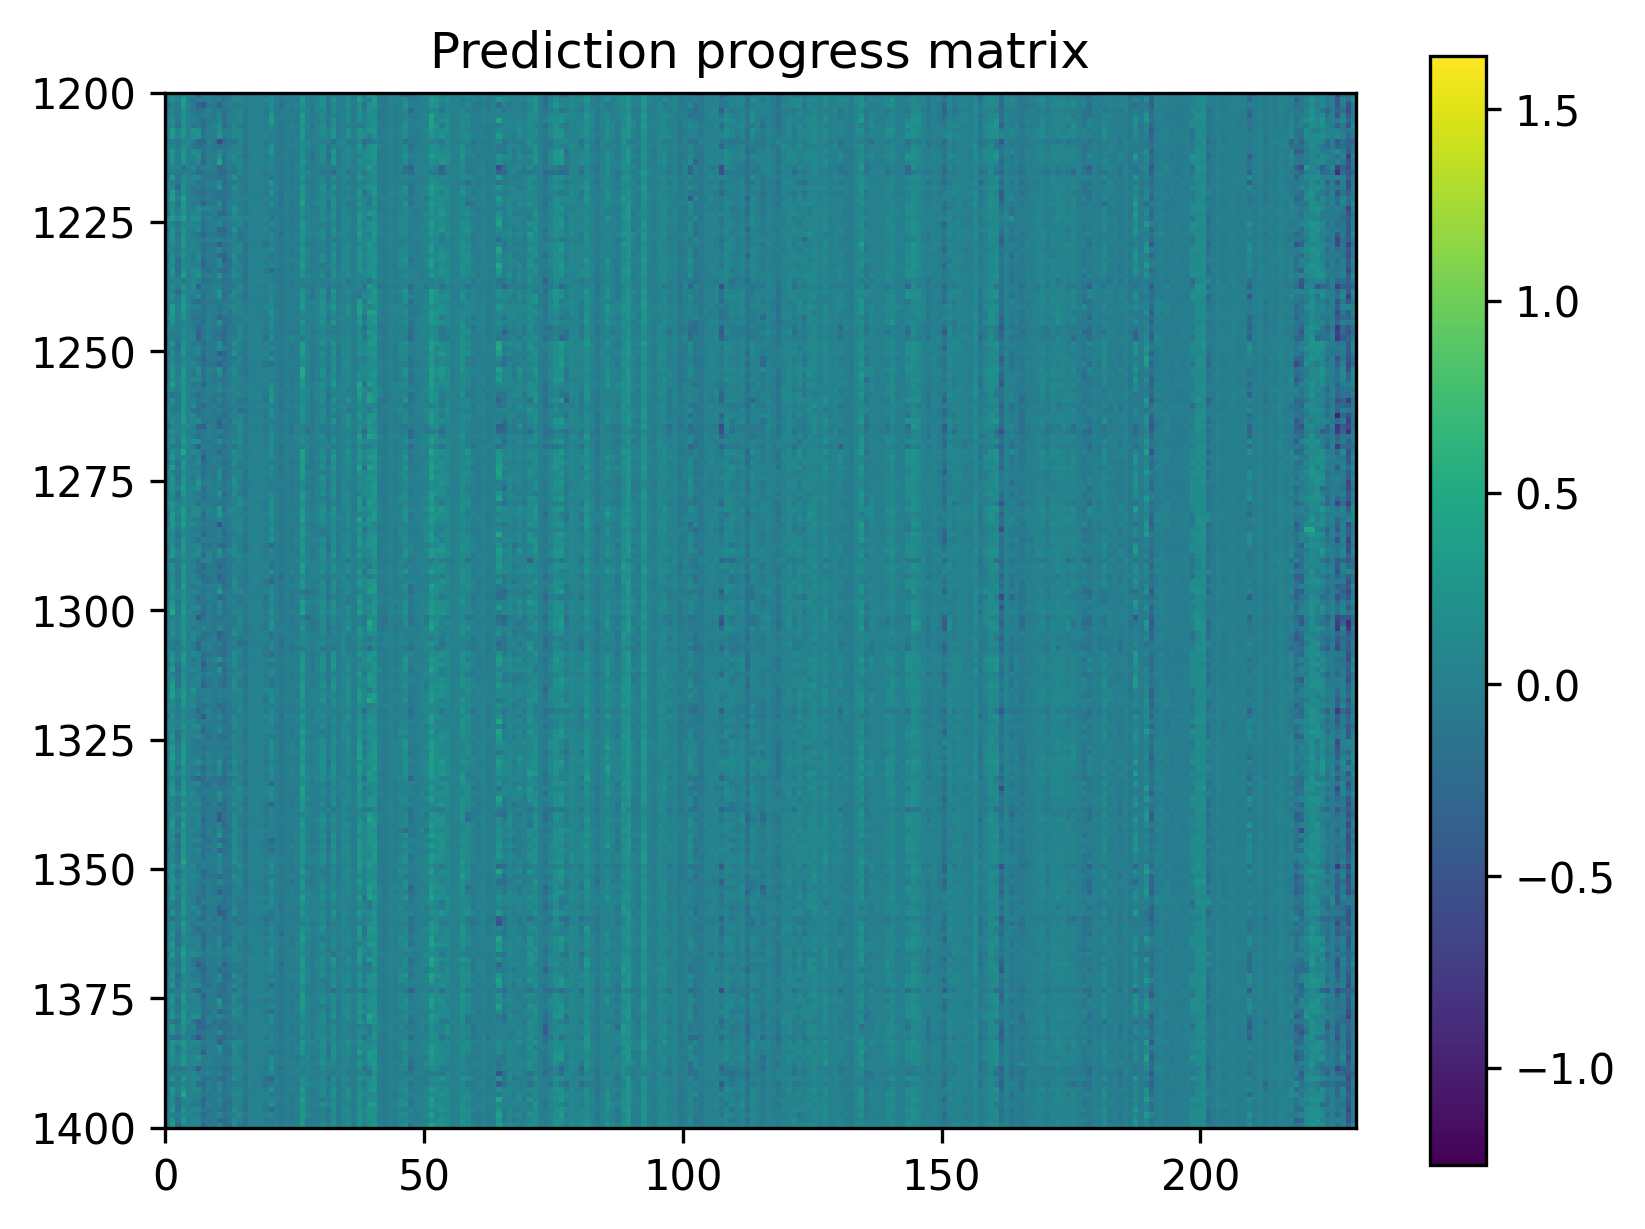

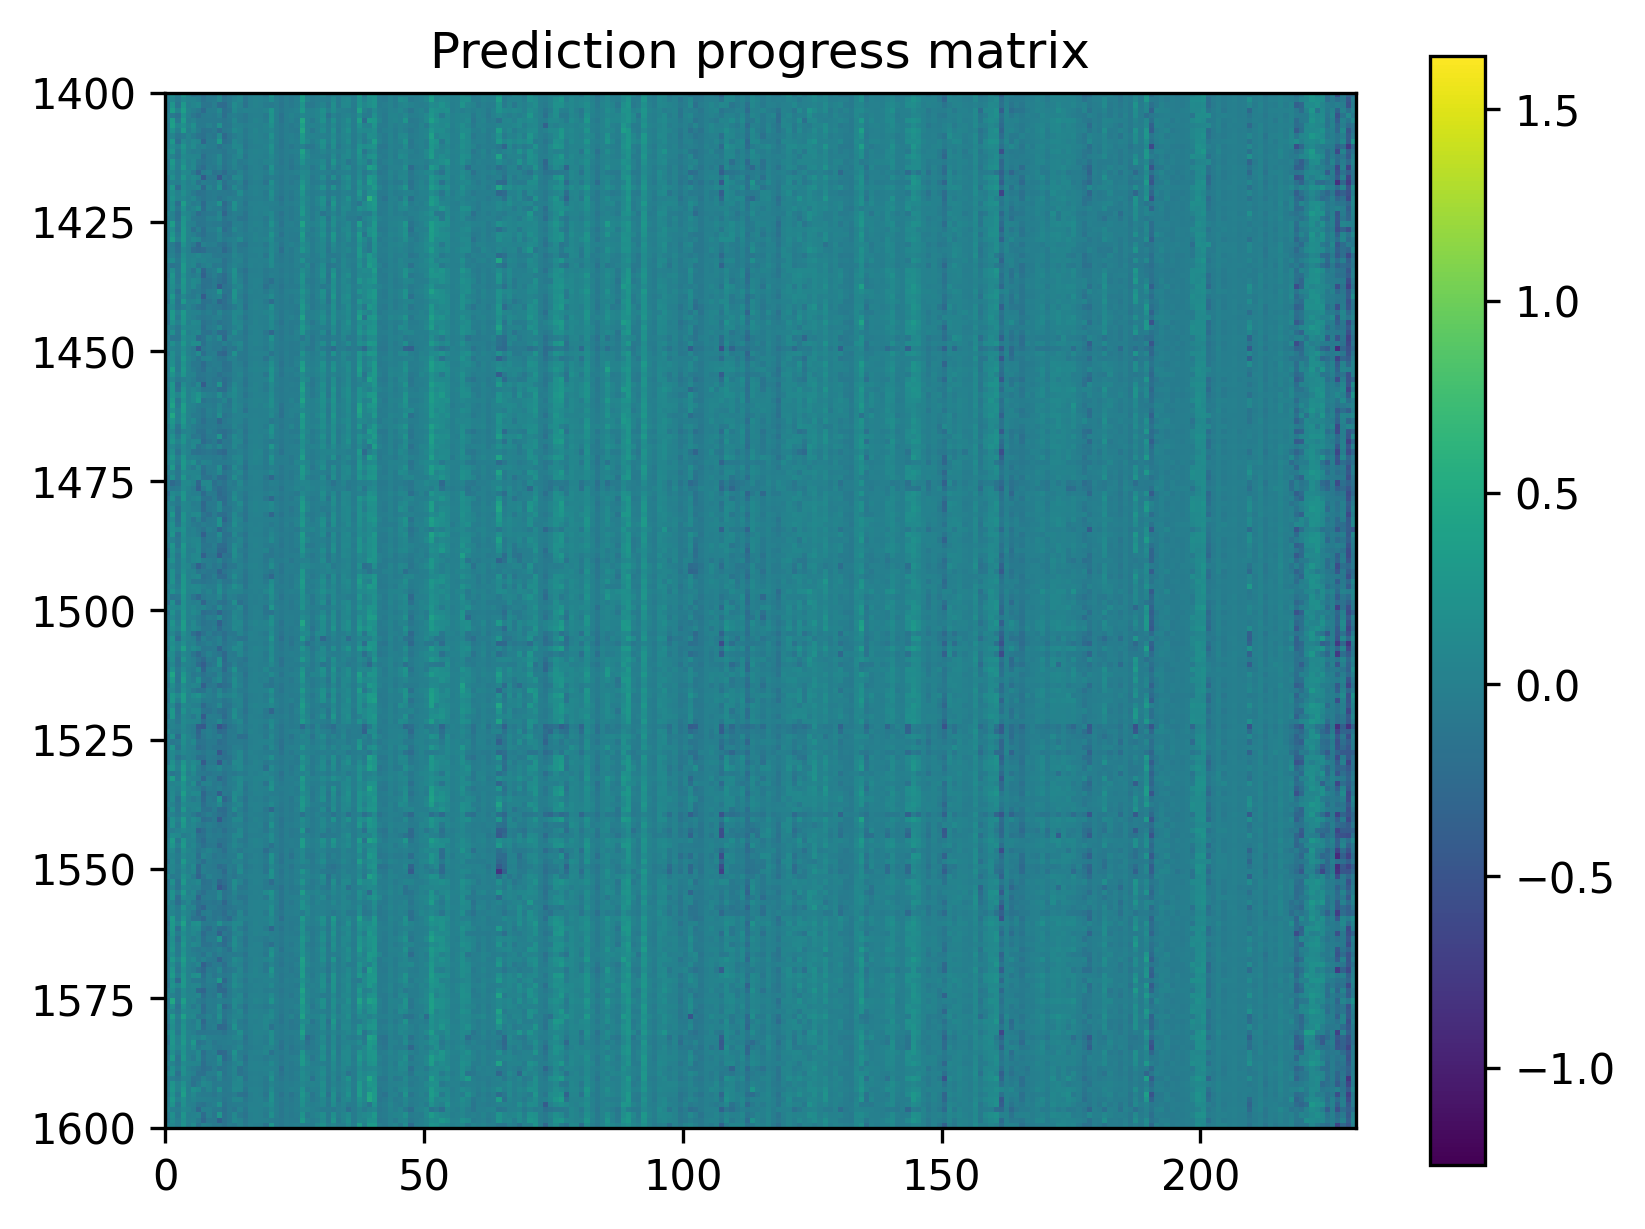

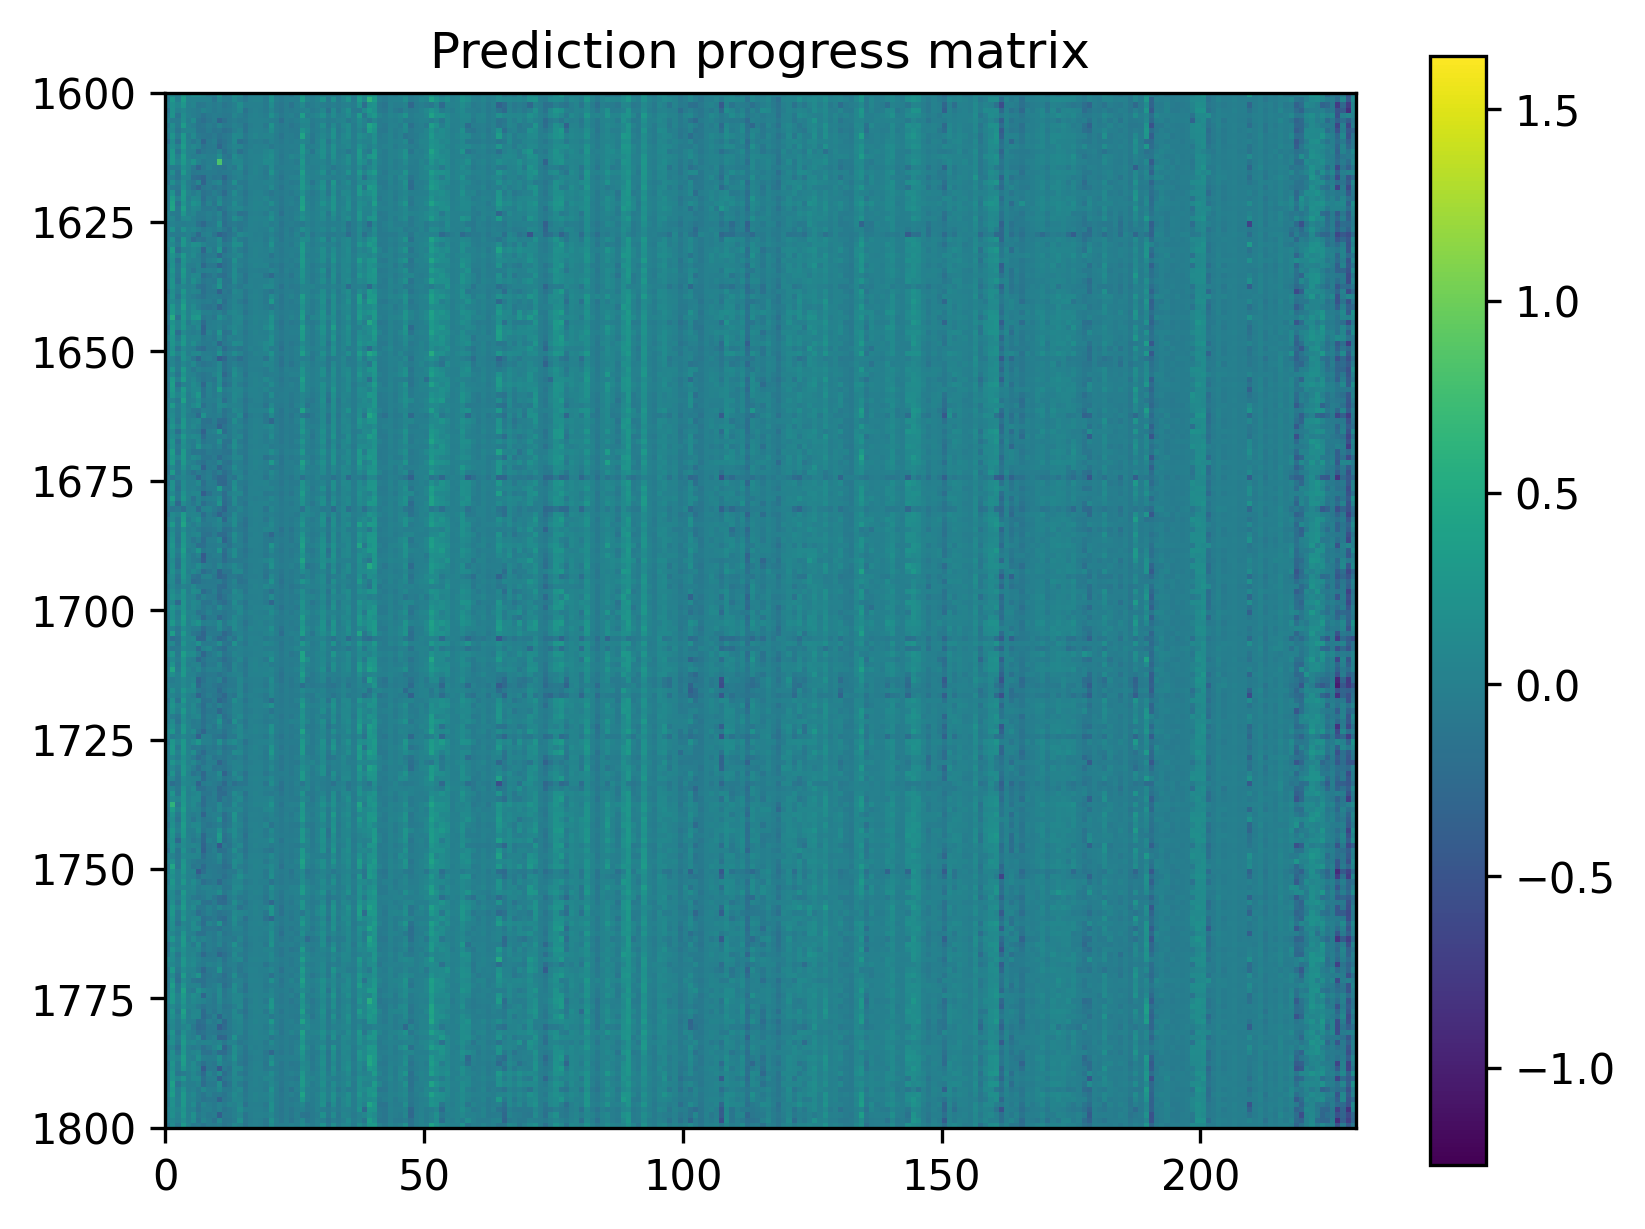

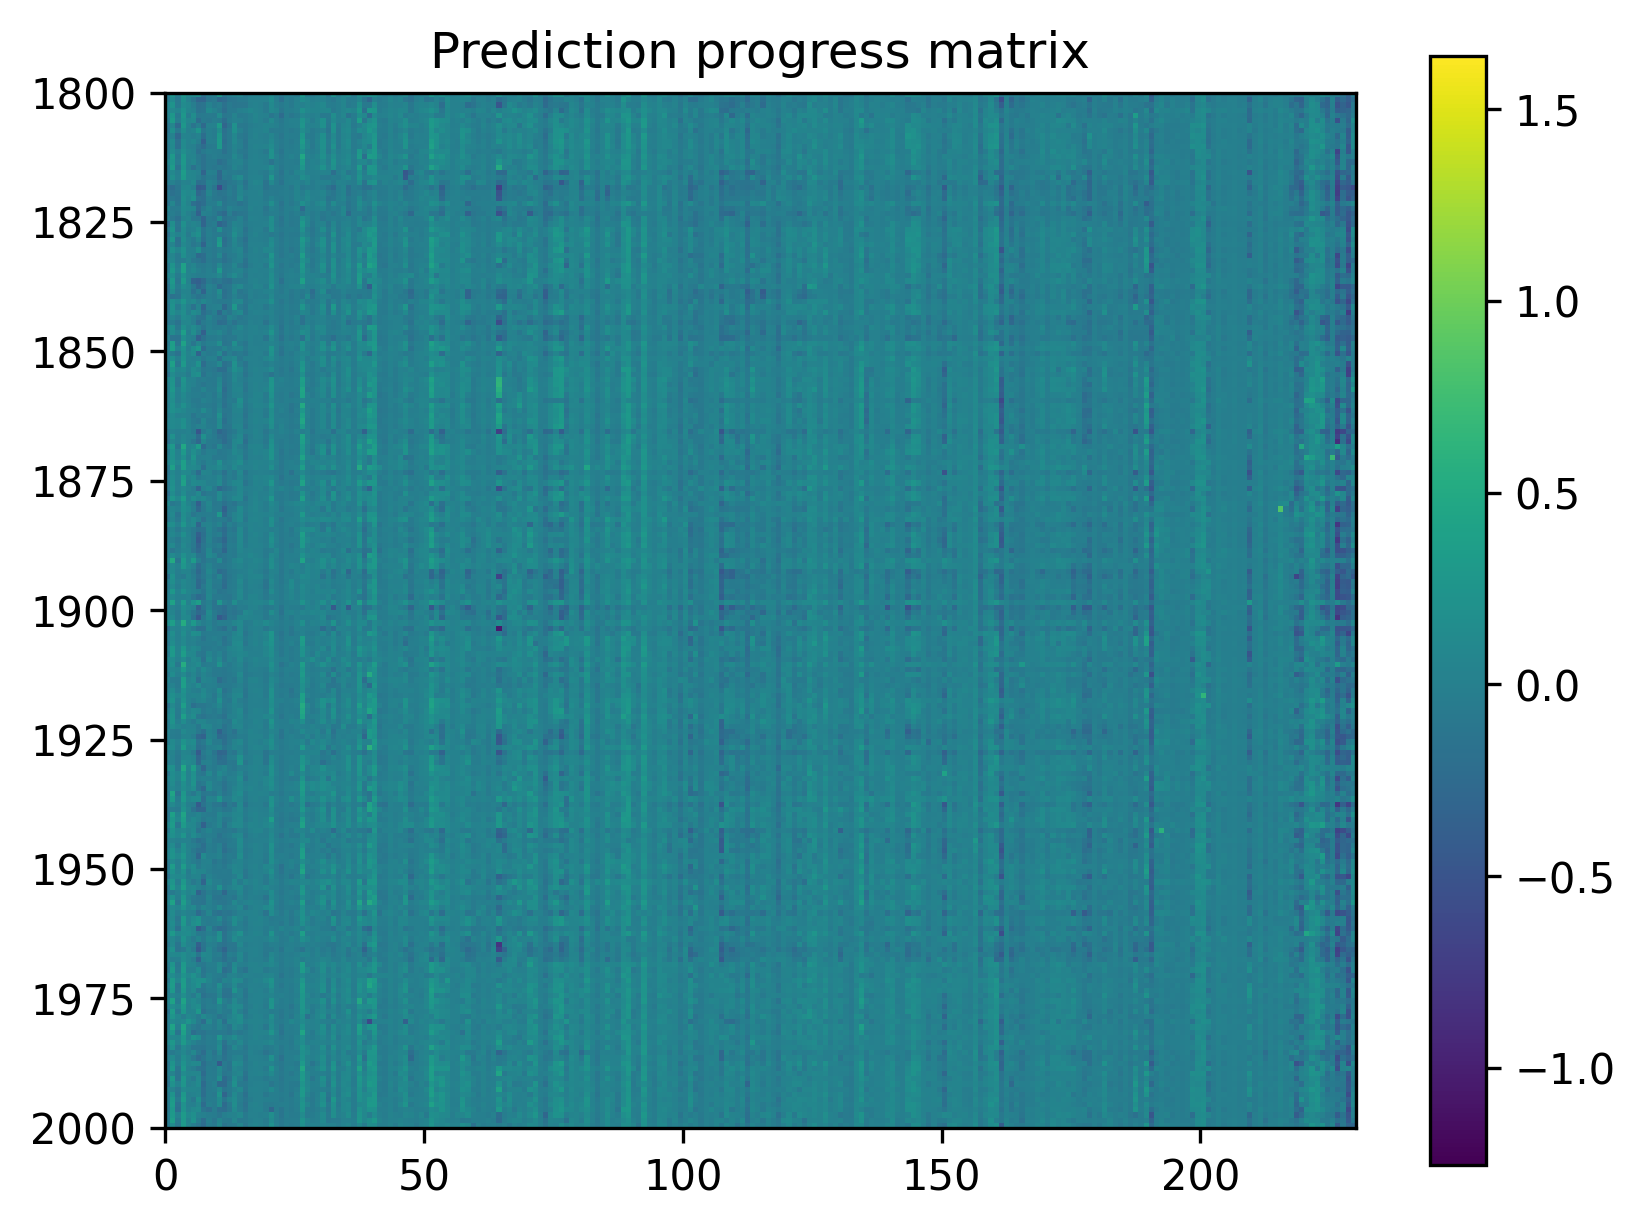

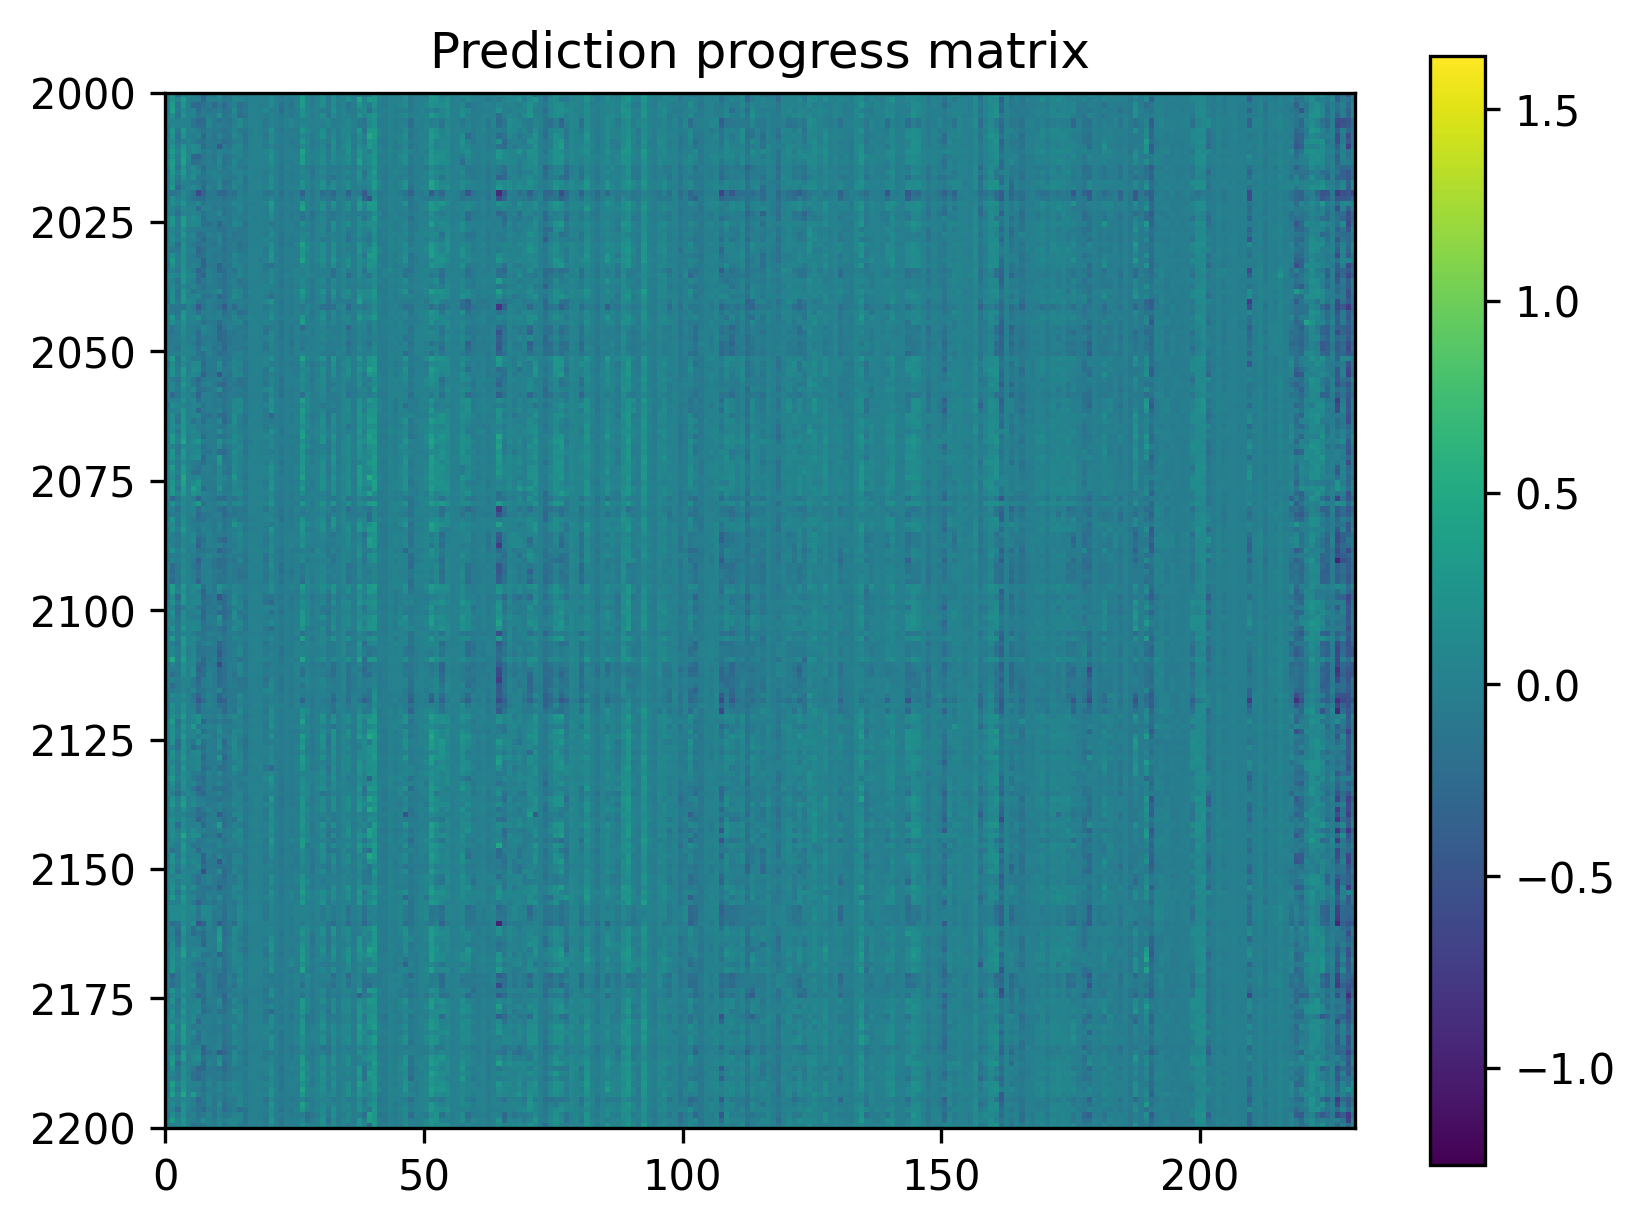

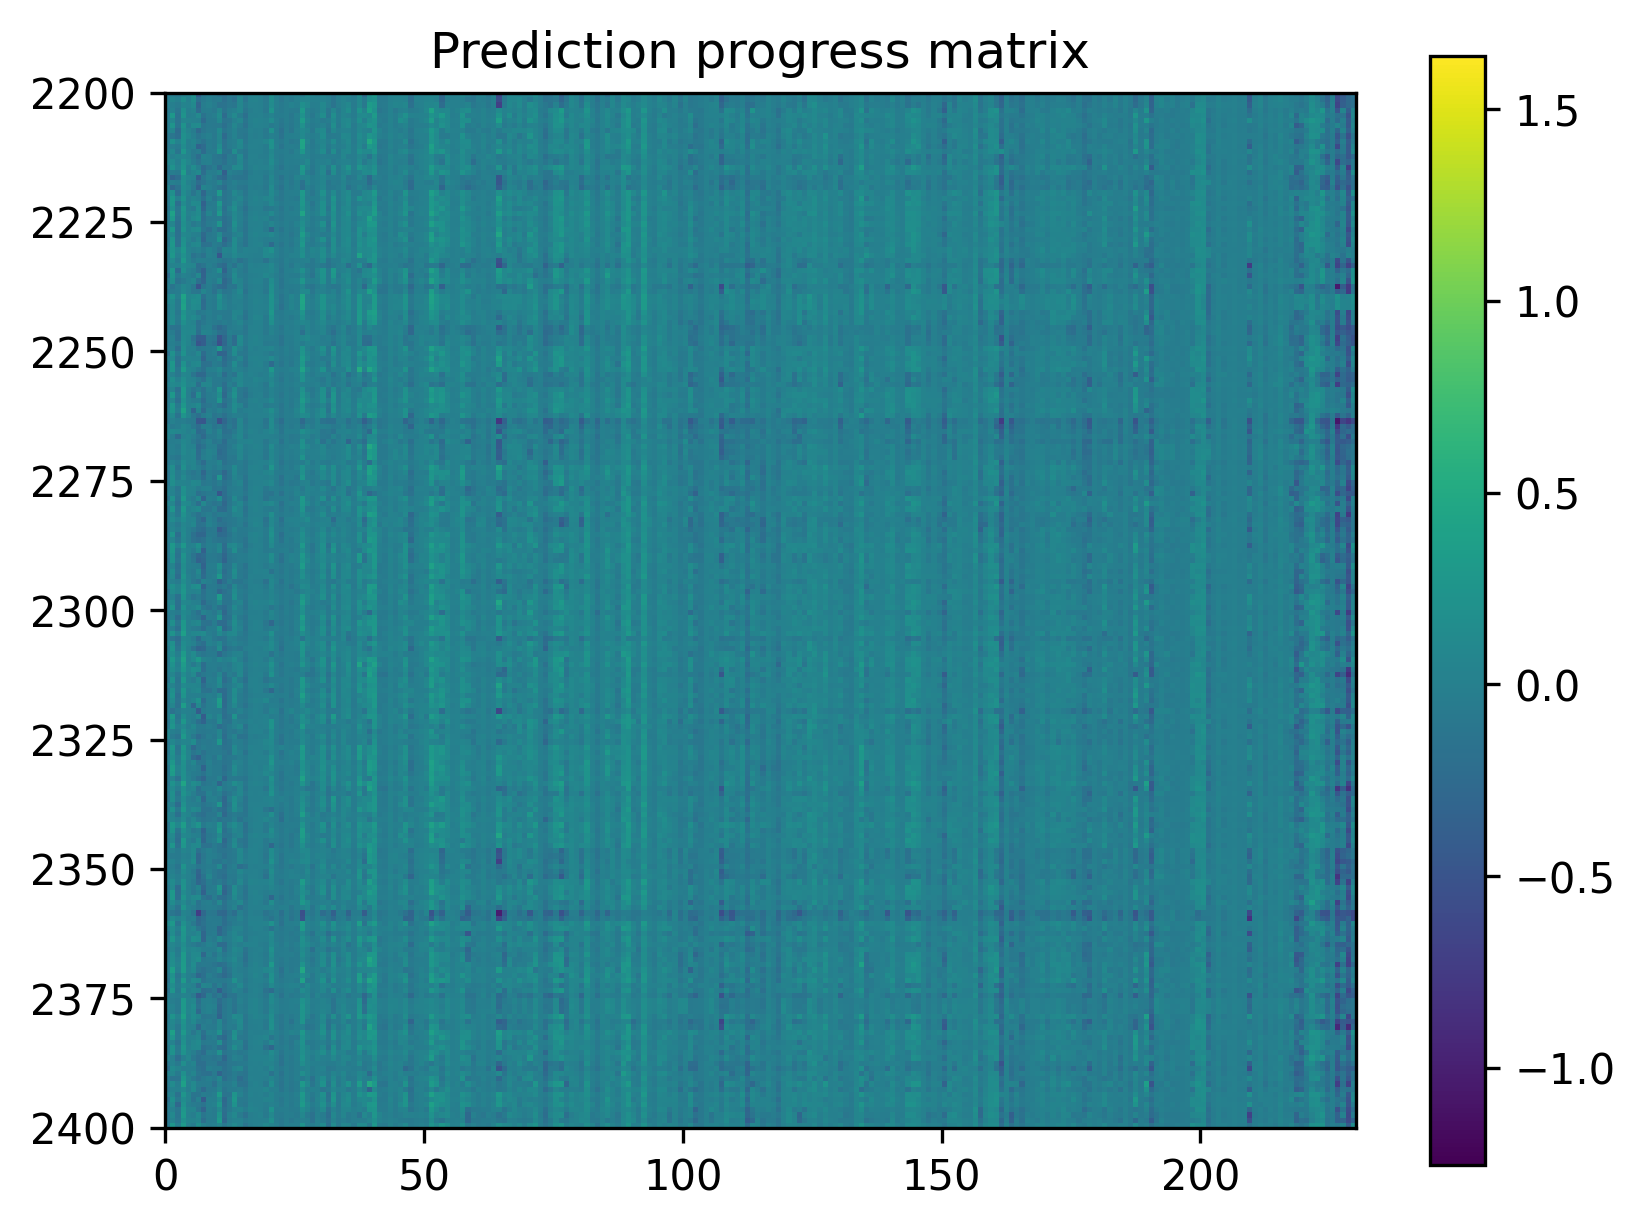

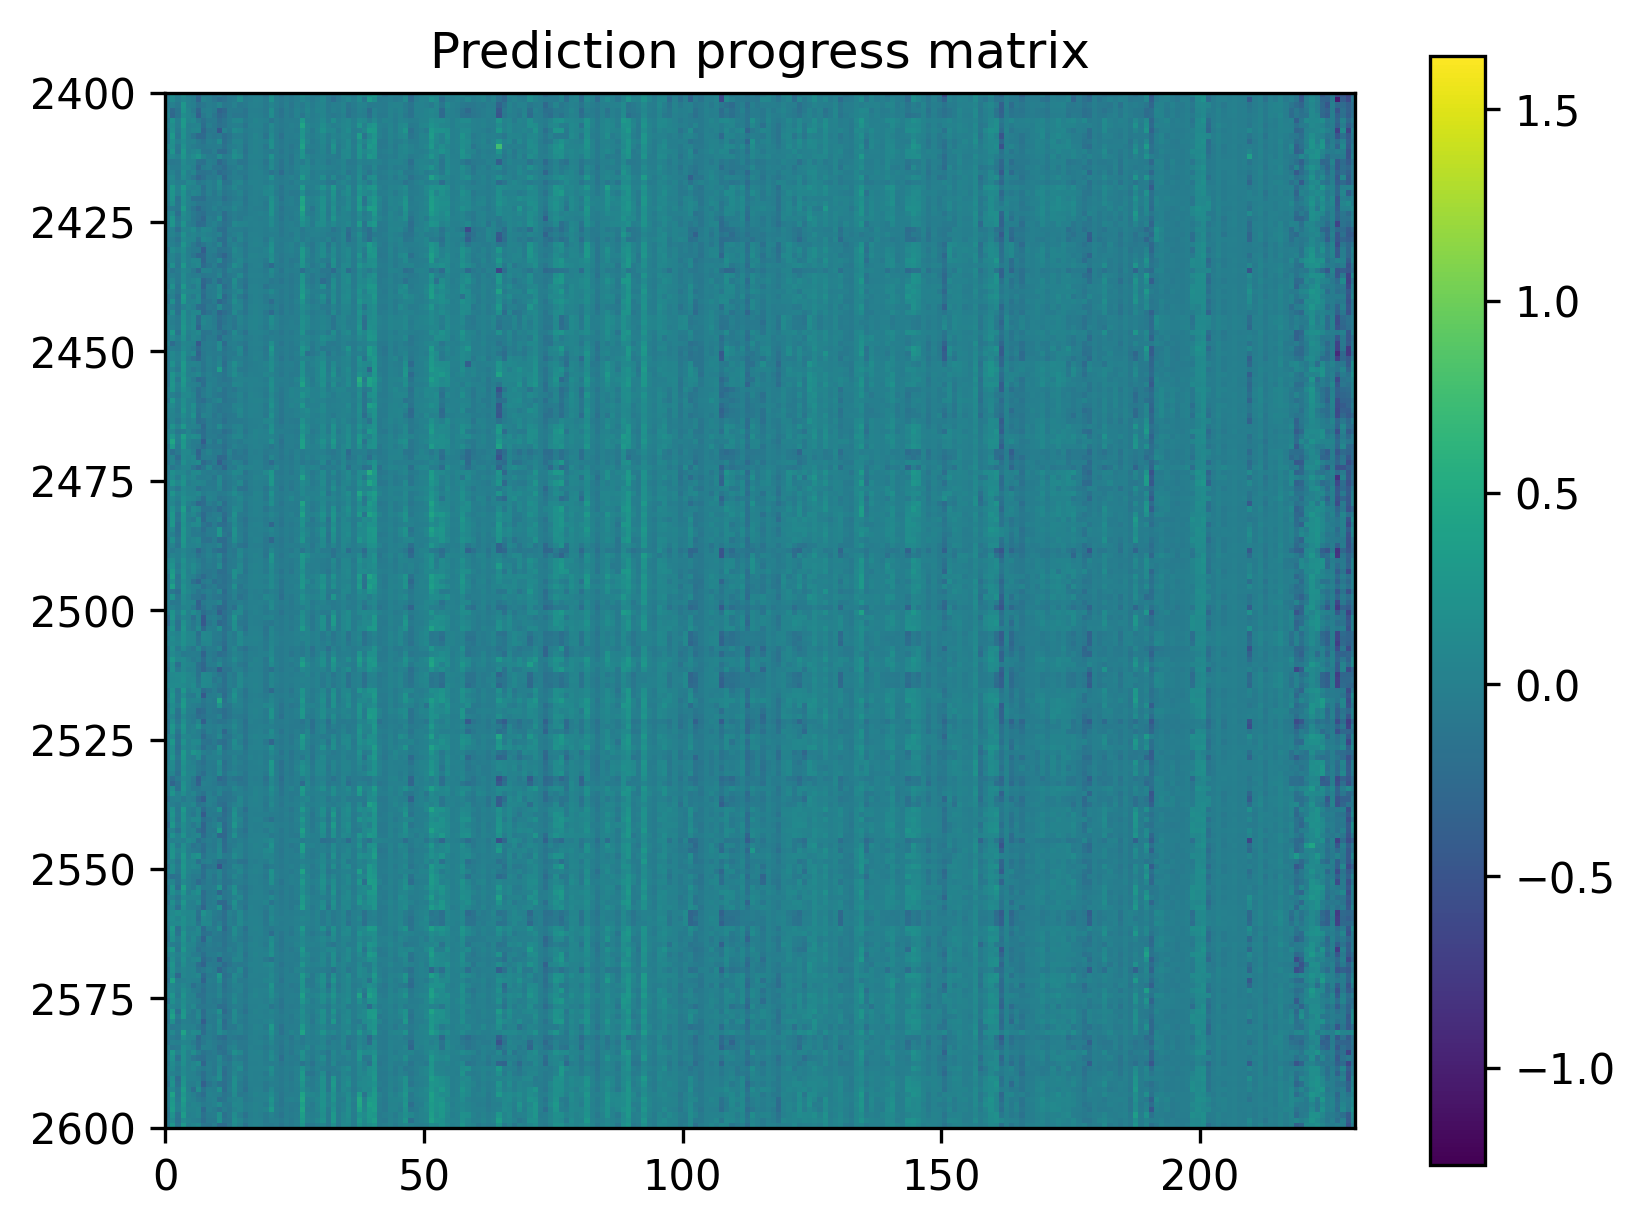

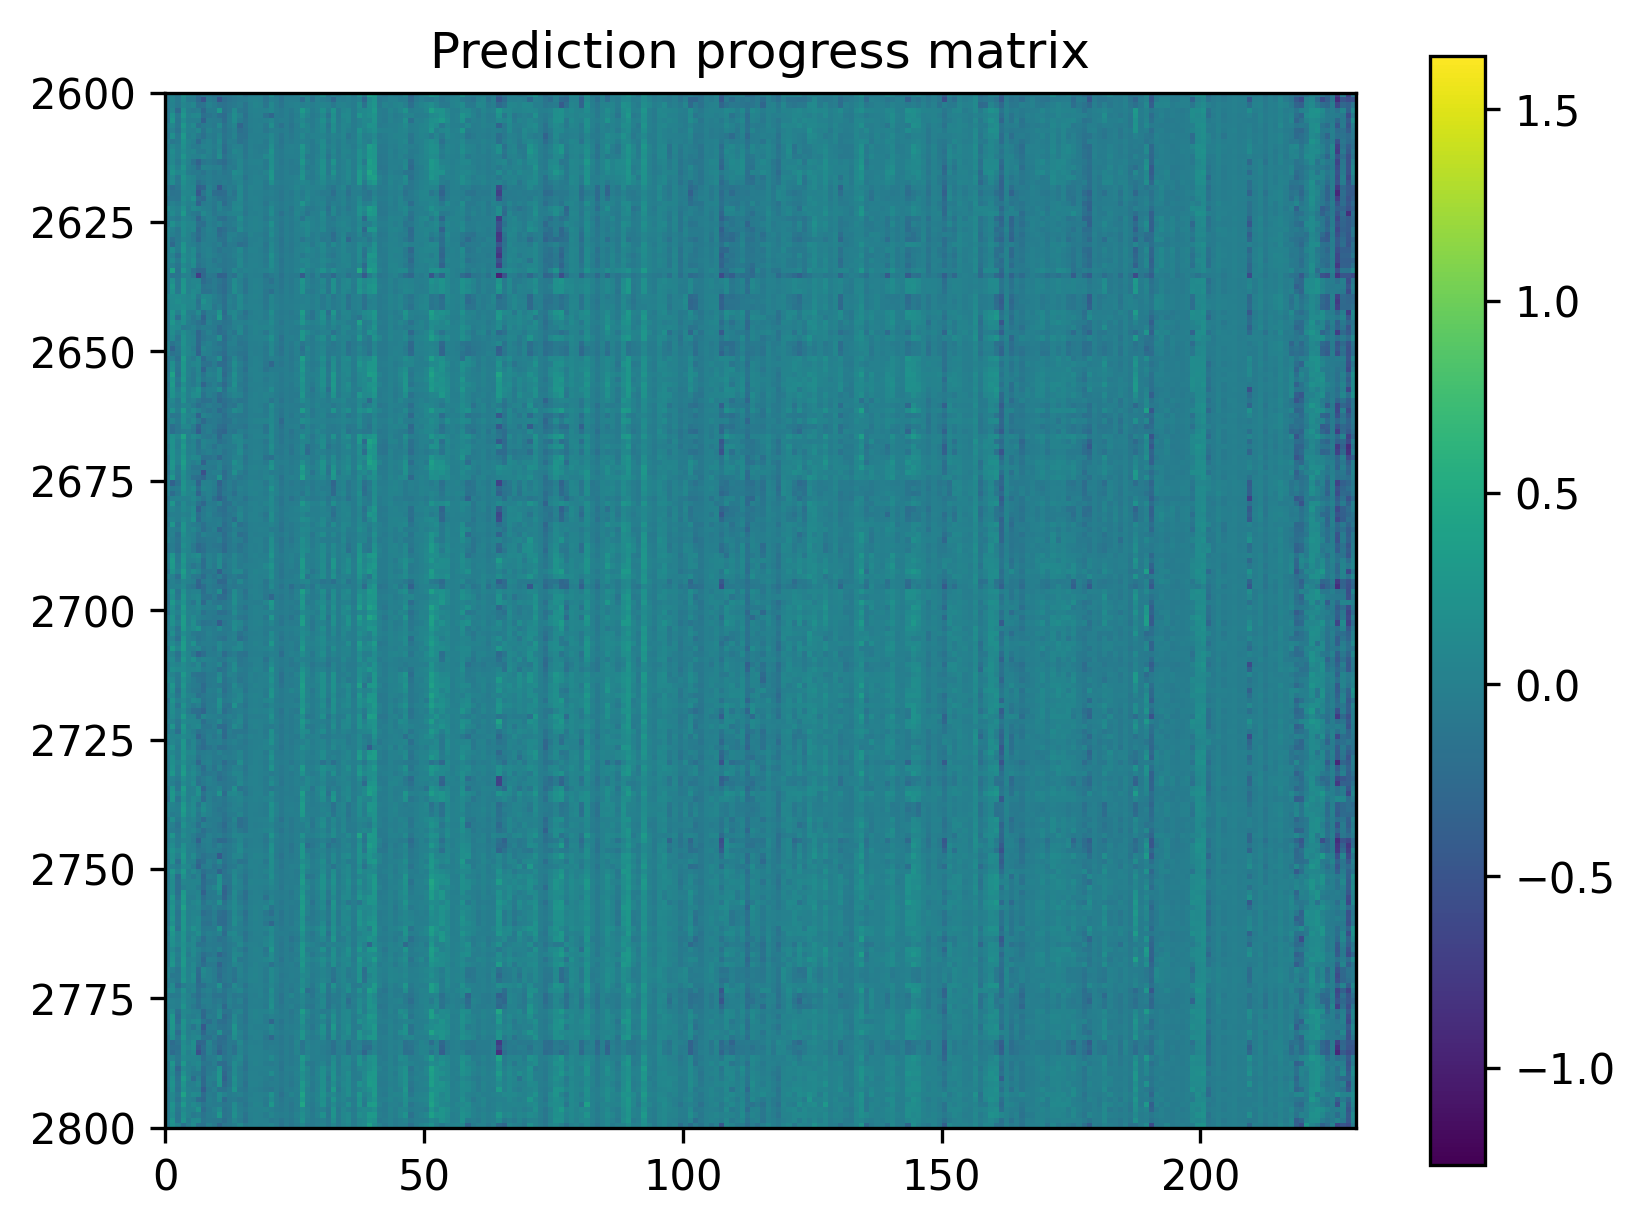

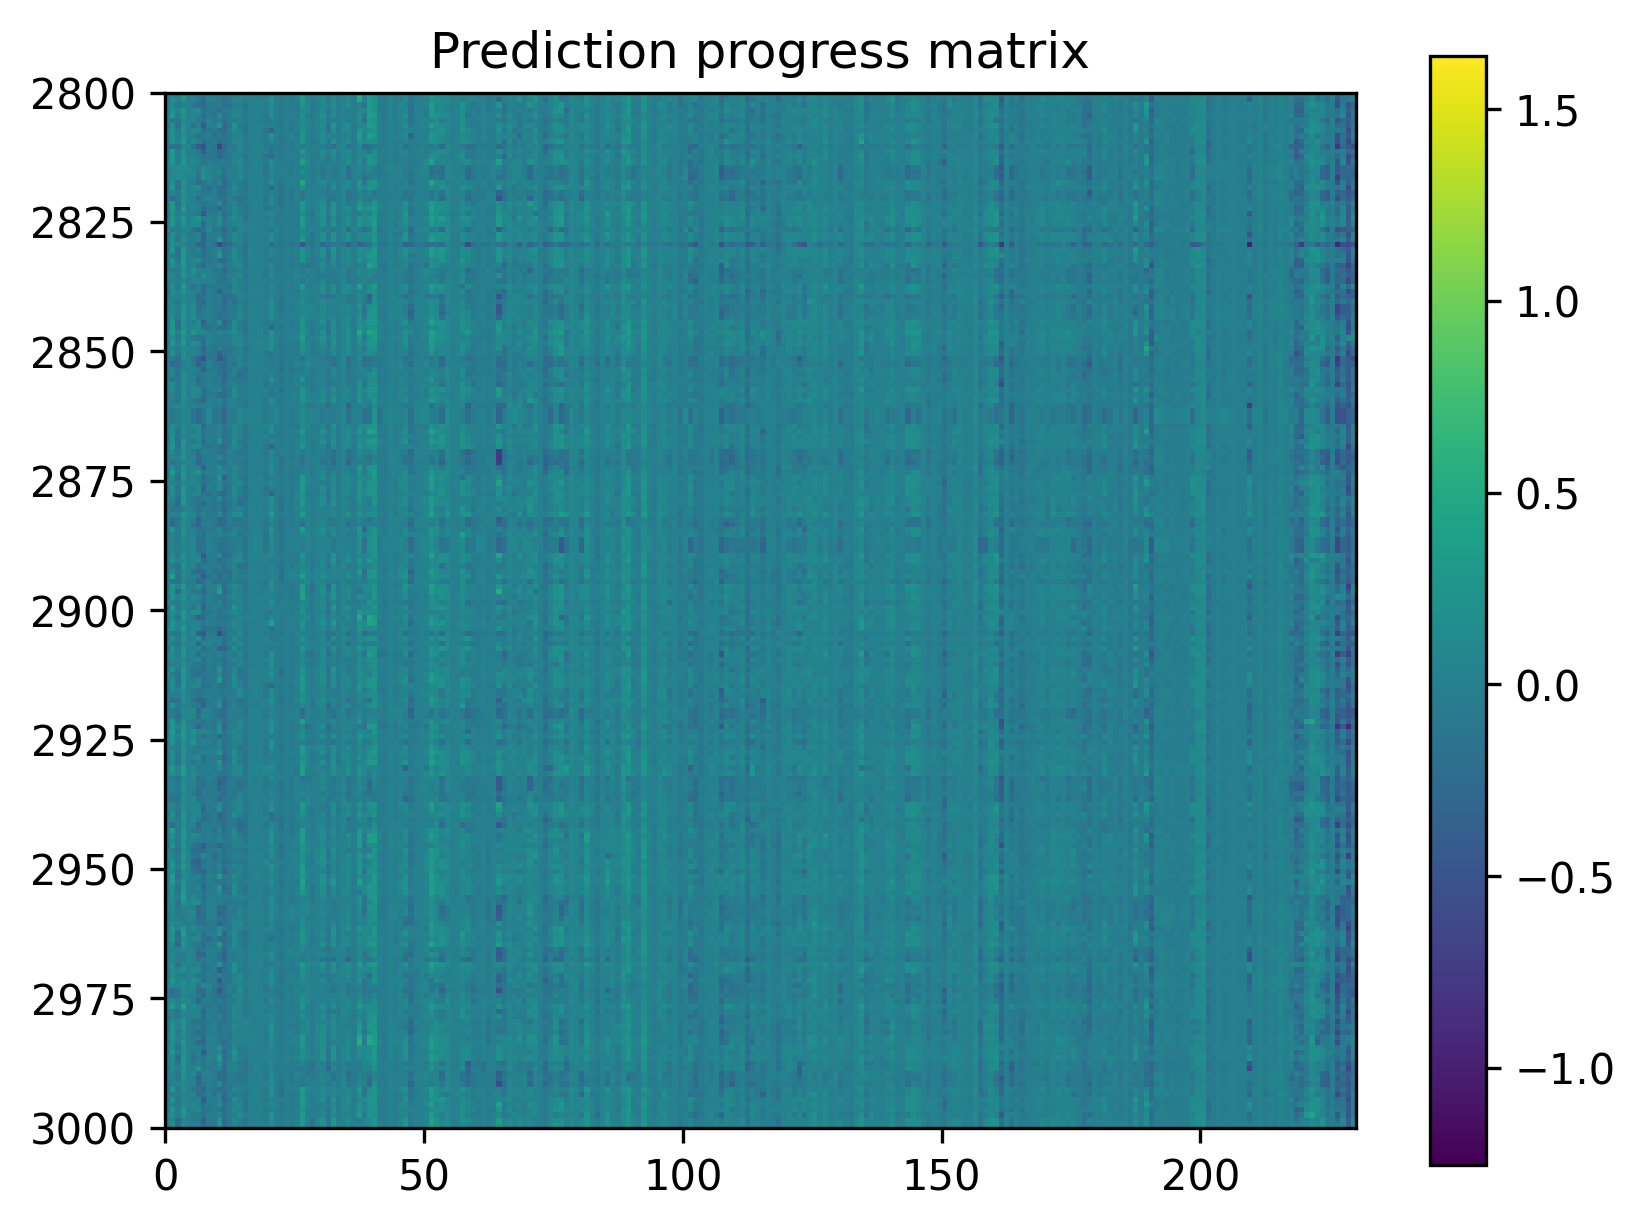

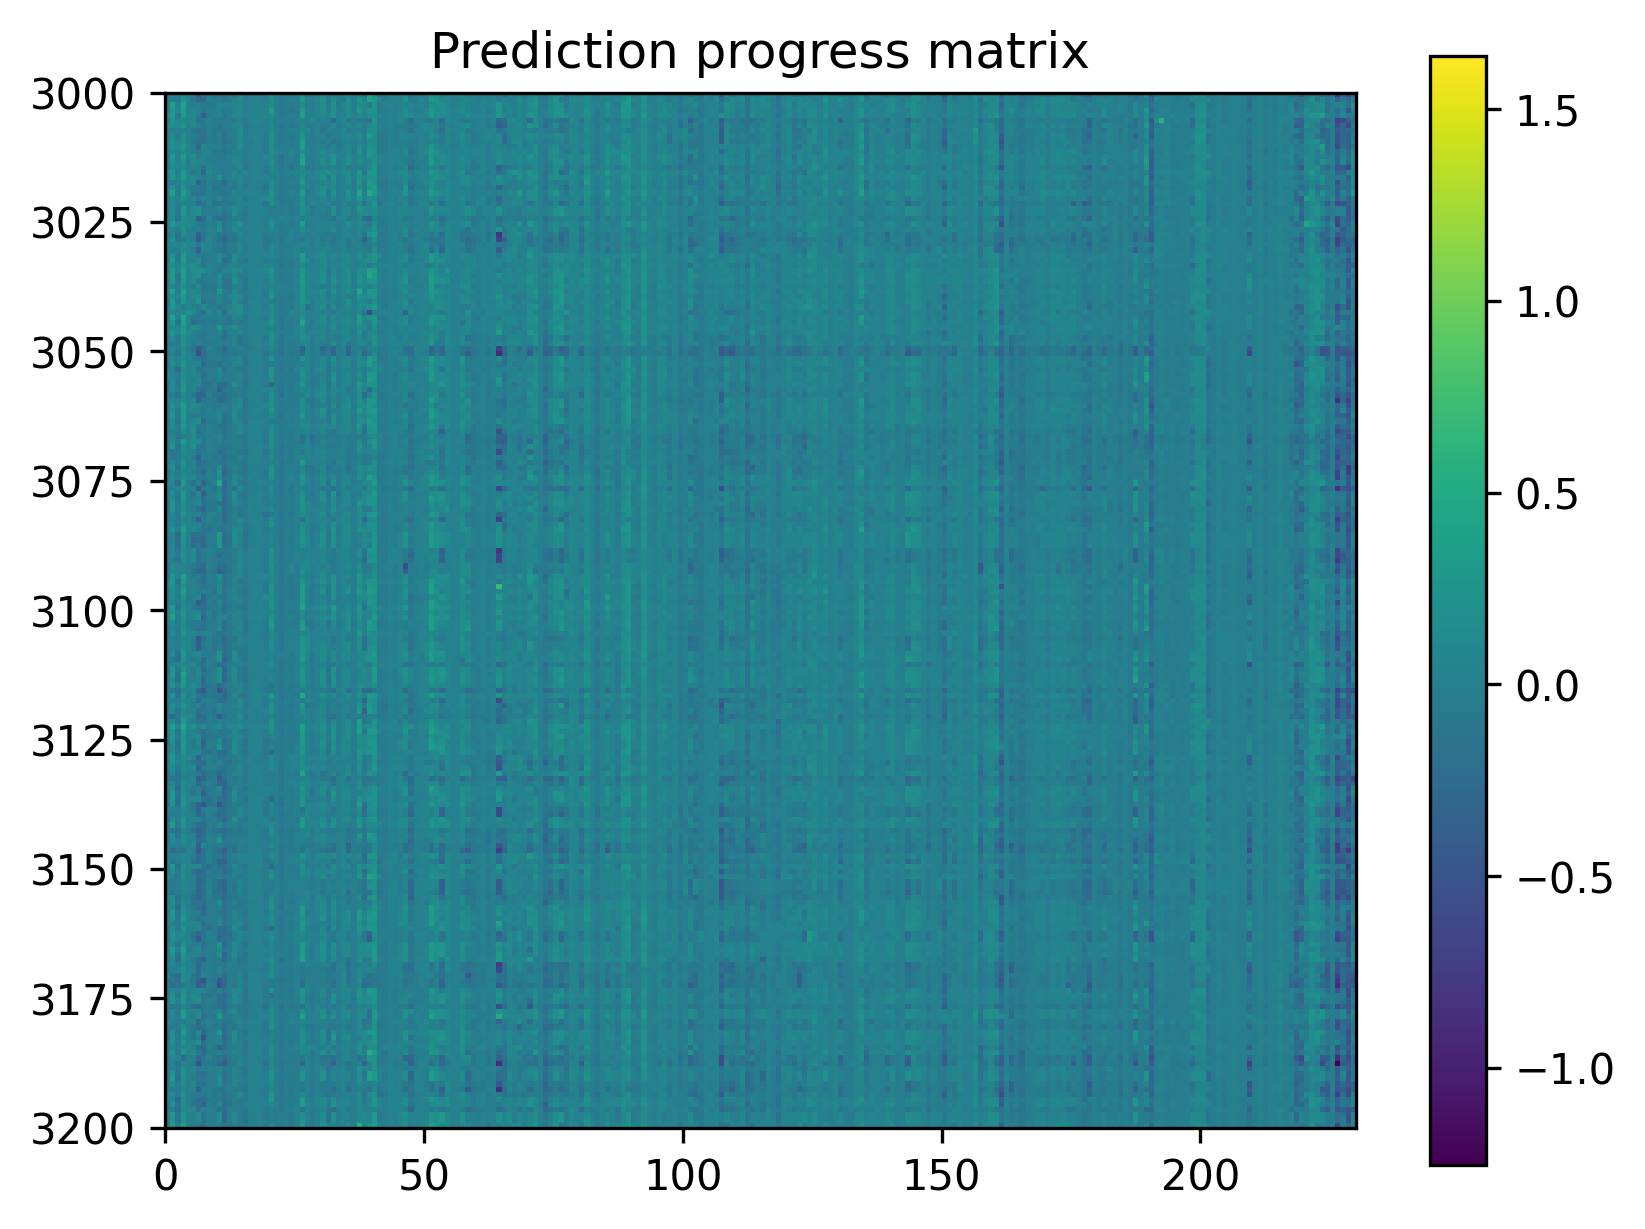

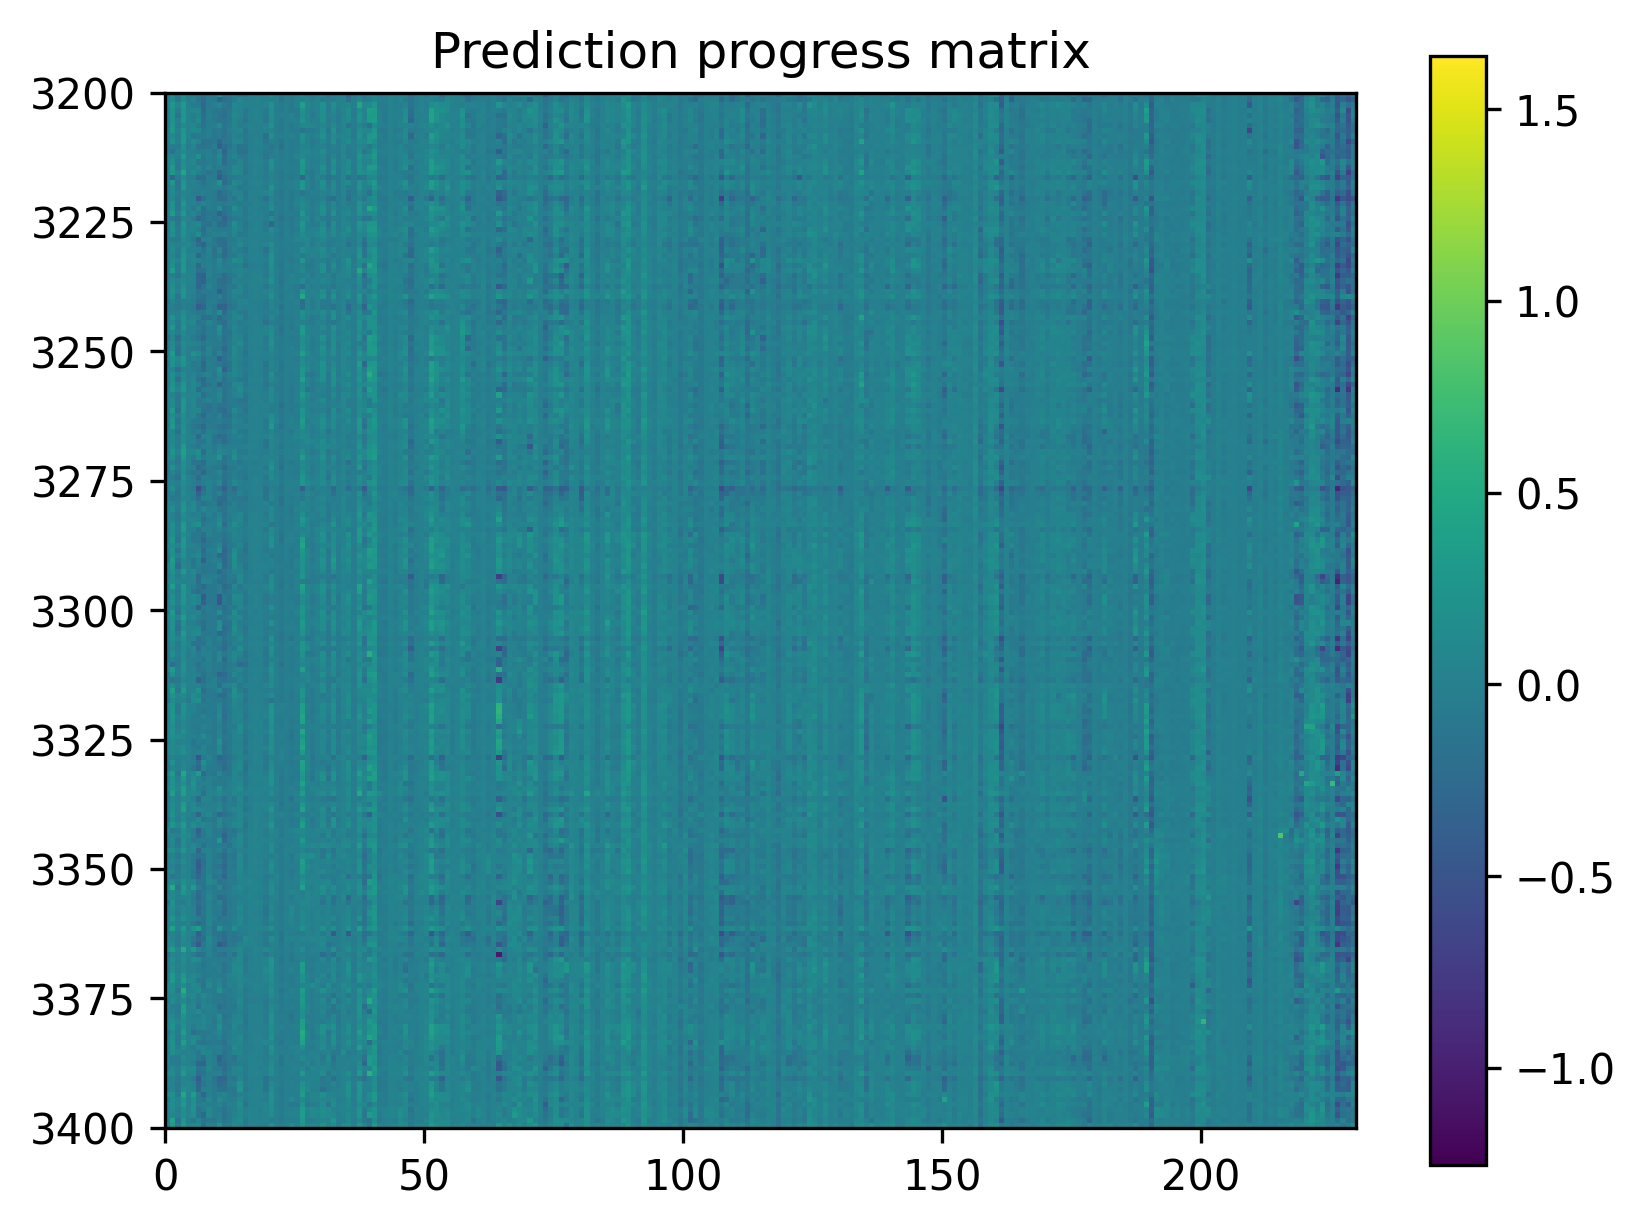

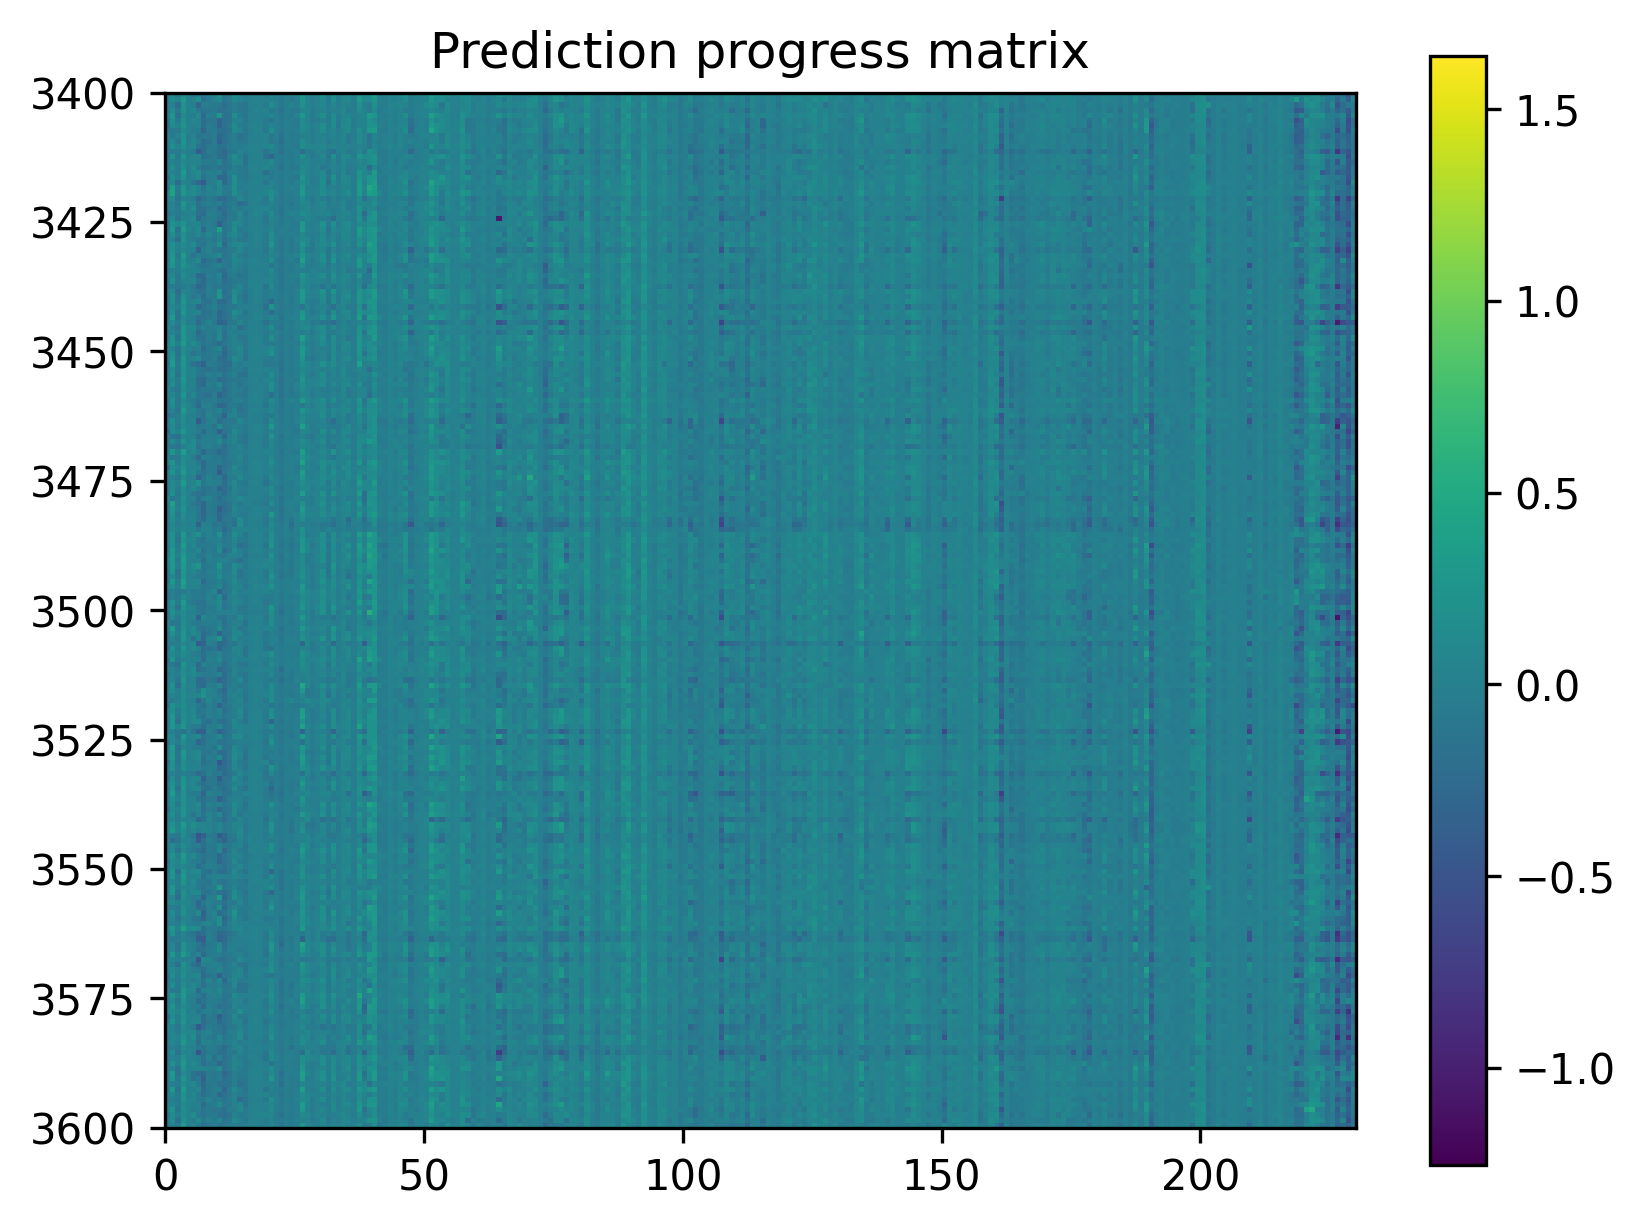

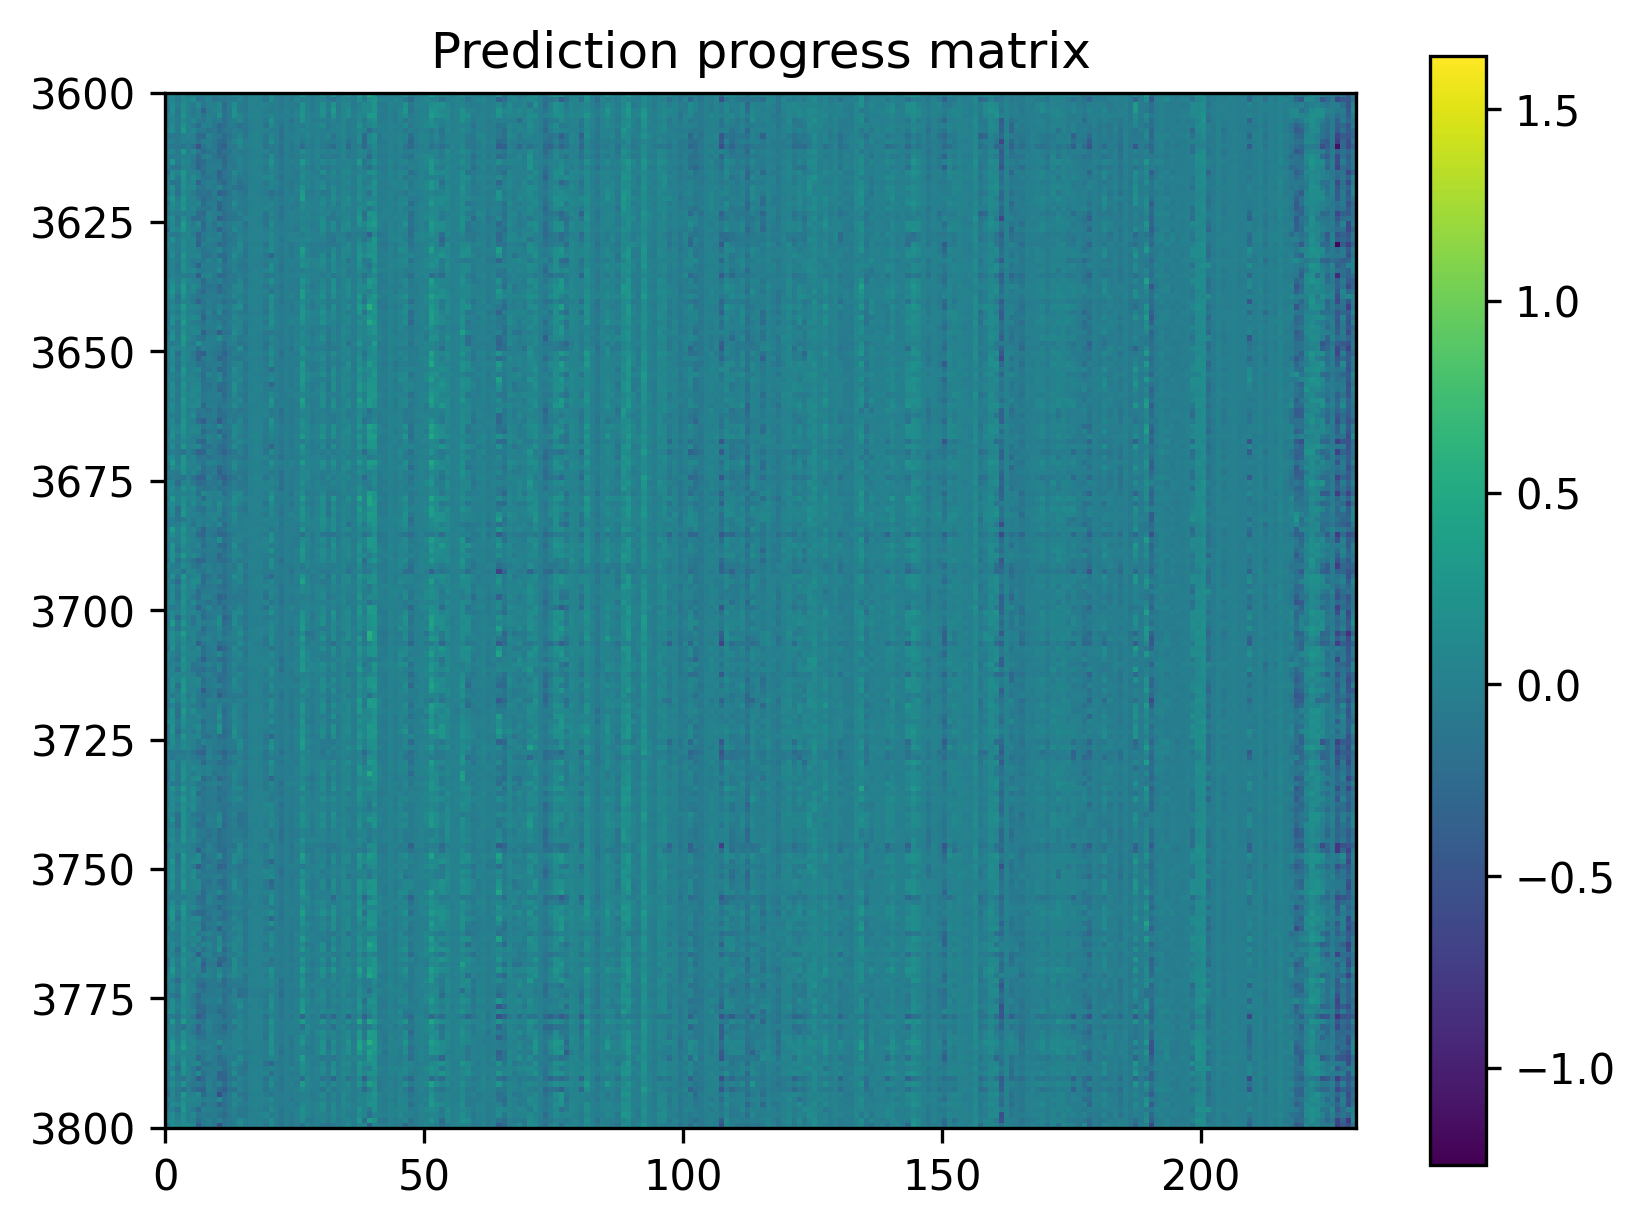

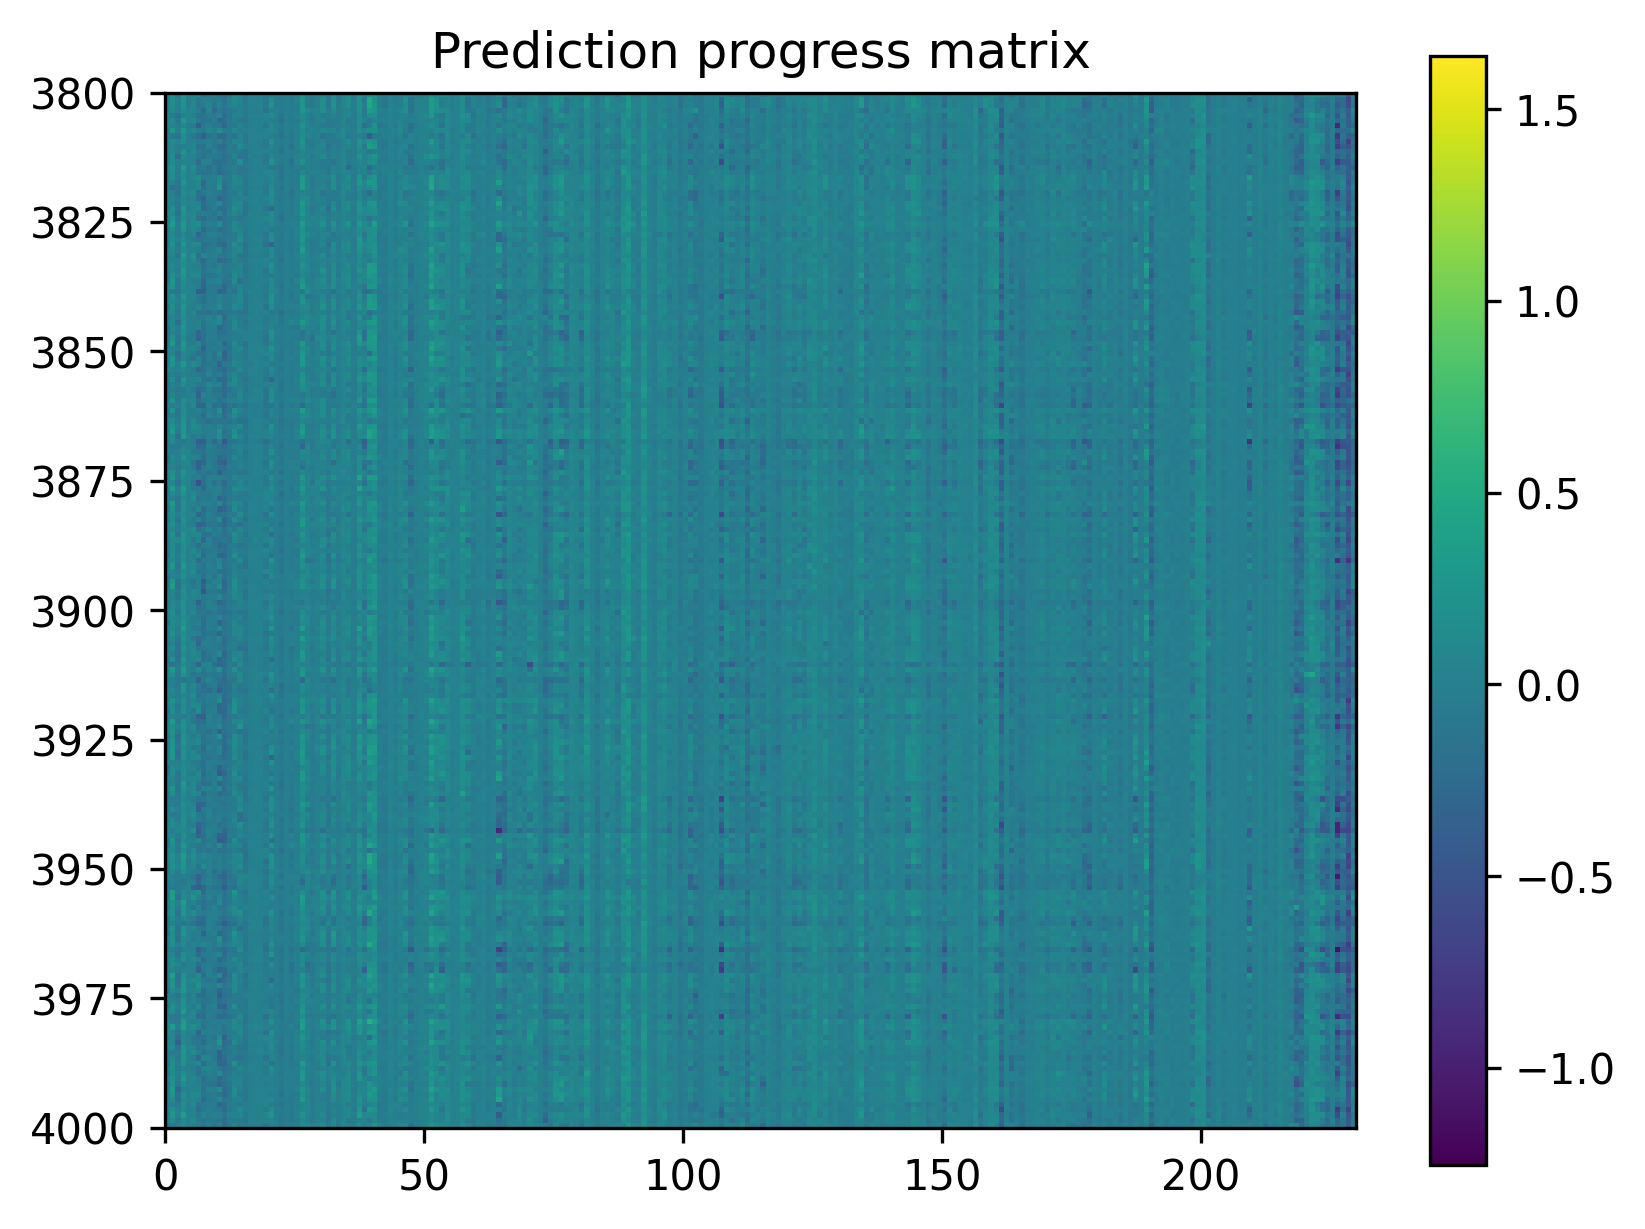

In [55]:
l = 200
for i in range(0, matrix_test.shape[0] // l):
    plot_matrix(matrix_test[i*l:(i+1)*l].flip(0),
                vmin=total_min, vmax=total_max, xmin=(i+1)*l, xmax=i*l)

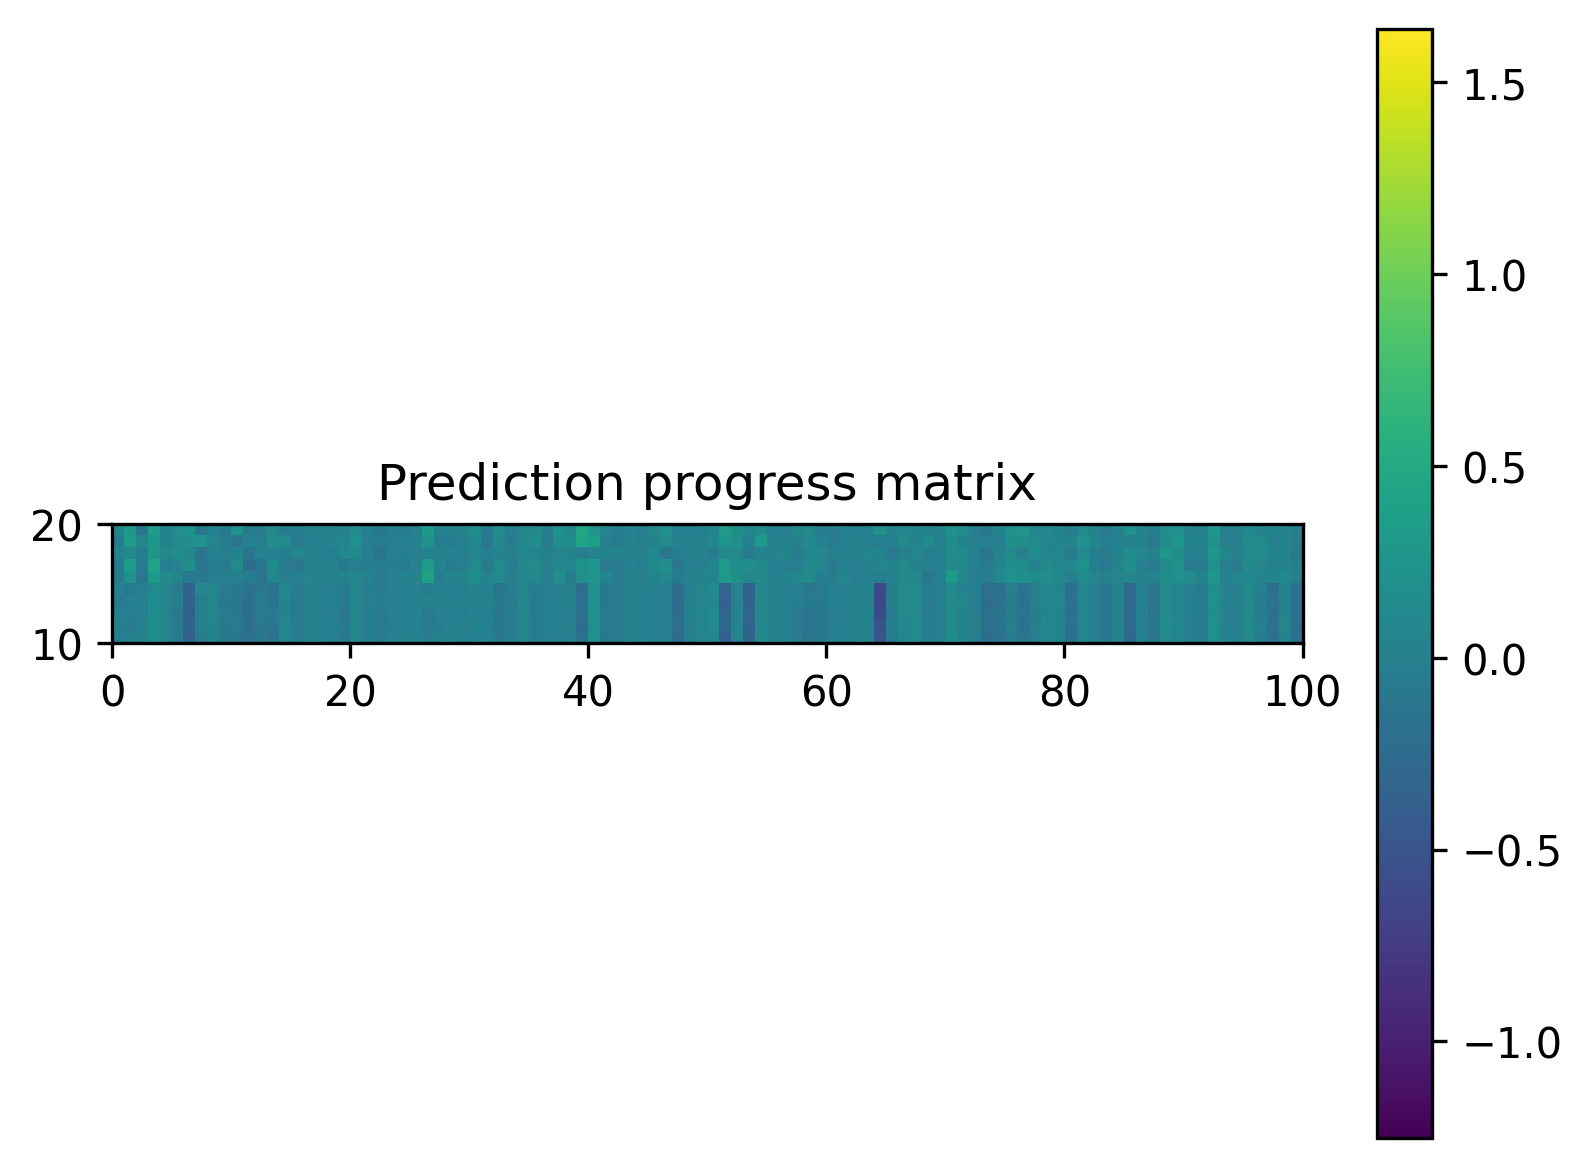

In [56]:
plot_matrix(matrix_test[10:20, :100], vmin=total_min, vmax=total_max, xmin=10, xmax=20)

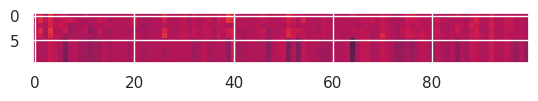

In [57]:
plt.imshow(matrix_test[10:20, :100], vmin=total_min, vmax=total_max)

In [58]:
t = torch.rand(10, 3)
print(t)
print(t.flip(0))

tensor([[0.1523, 0.9045, 0.9125],
        [0.1078, 0.9208, 0.4806],
        [0.7557, 0.2735, 0.4101],
        [0.2662, 0.5960, 0.9237],
        [0.2288, 0.8365, 0.5193],
        [0.9648, 0.9497, 0.8619],
        [0.8896, 0.7764, 0.8568],
        [0.0304, 0.9072, 0.5480],
        [0.8398, 0.1530, 0.6555],
        [0.3960, 0.1997, 0.9931]])
tensor([[0.3960, 0.1997, 0.9931],
        [0.8398, 0.1530, 0.6555],
        [0.0304, 0.9072, 0.5480],
        [0.8896, 0.7764, 0.8568],
        [0.9648, 0.9497, 0.8619],
        [0.2288, 0.8365, 0.5193],
        [0.2662, 0.5960, 0.9237],
        [0.7557, 0.2735, 0.4101],
        [0.1078, 0.9208, 0.4806],
        [0.1523, 0.9045, 0.9125]])


In [72]:
dataset_test_archive[1000].origin

'rd_gen'

In [73]:
colors = sample_colormap('viridis', 4)
colordict = {k: v for (k, v) in zip(['train', 'elm', 'rd_gen', 'aces'], colors)}
data_color = [colordict[p.origin] for p in dataset_test_archive]

In [76]:
colordict

{'train': array([0.267004, 0.004874, 0.329415, 1.      ]),
 'elm': array([0.190631, 0.407061, 0.556089, 1.      ]),
 'rd_gen': array([0.20803 , 0.718701, 0.472873, 1.      ]),
 'aces': array([0.993248, 0.906157, 0.143936, 1.      ])}

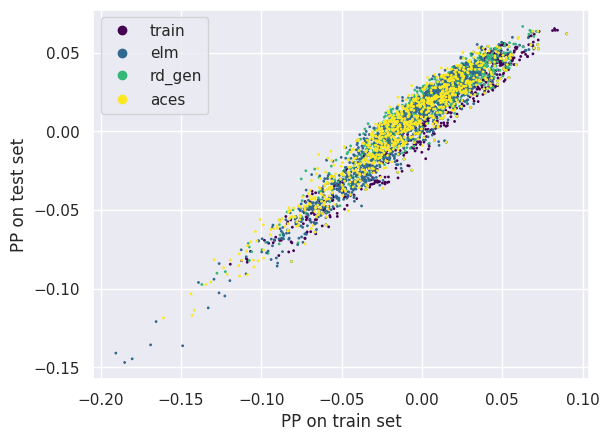

In [78]:
pp_avg_train = matrix_train.mean(-1)
pp_avg_test = matrix_test.mean(-1)
plt.scatter(pp_avg_train, pp_avg_test, s=1, c=data_color)
plt.xlabel('PP on train set')
plt.ylabel('PP on test set')
handles = []
for name, c in colordict.items():
    handles.append(mlines.Line2D([], [], color=c, marker='o', linestyle='None', label=name))
plt.legend(handles=handles)

In [60]:
correlation, p_value = scipy.stats.pearsonr(pp_avg_train, pp_avg_test)
print("Pearson's correlation coefficient:", correlation)
print("P-value:", p_value)

Pearson's correlation coefficient: 0.9588339573156338
P-value: 0.0


In [61]:
dataset_train_archive[-1]

Problem(idx='ACES_960:0', instruction="def f(solution, s='radar') -> bool:\n    return solution == solution[::-1]", completion="def g(s='radar'):\n    return s + s[-2::-1]", quality={'pp_diff': [-0.04200875759124756, 0.062496066093444824, 0.06155073642730713, 0.26557955145835876, 0.03922748565673828, -0.028494536876678467, -0.029305100440979004, -0.054722607135772705, 0.0038474202156066895, 0.08994287252426147, -0.09184378385543823, 0.3530771732330322, -0.10570383071899414, 0.04573237895965576, 0.08912765979766846, 0.033675432205200195, -0.016822755336761475, -0.018636703491210938, -0.005247235298156738, -0.012159645557403564, -0.03773379325866699, -0.01373755931854248, -0.017834246158599854, -0.03146308660507202, 0.0230330228805542, -0.051027894020080566, 0.006116747856140137, -0.003907680511474609, 0.09324818849563599, 0.09384119510650635, -0.12256962060928345, 0.22139471769332886, 0.04632014036178589, 0.013776540756225586, 0.1449134349822998, -0.035281479358673096, -0.06639337539672

In [62]:
ds = json.load(open('data/dataset.json'))

In [63]:
len(ds)

4138

In [64]:
dst = load_dataset(path_train_archive)

In [65]:
len(dst)

4138

In [66]:
i = 0
indices = []
for p, pp in zip(dst, ds):
    if 'pp_diff' in p.quality:
        indices.append(pp['origin'])

In [67]:
pp.keys()

dict_keys(['fitness', 'program_str', 'emb', 'explanation_emb', 'idx_generation', 'target_skills', 'puzzle_history', 'problem_func', 'solution_func', 'quality', 'description', 'is_valid', 'is_valid_explanation', 'name', 'origin'])

In [123]:
pp

{'fitness': 1.0,
 'program_str': '\nfrom typing import List\ndef f(nums: List[int]) -> bool:\n    if not nums:\n        return False\n    return all(n > 1 and all(n % i != 0 for i in range(2, int(n ** 0.5) + 1)) for n in nums)\ndef g(start=2, end=20):\n    return [num for num in range(start, end) if all(num % i != 0 for i in range(2, int(num ** 0.5) + 1))]\nassert f(g()) == True\n',
 'emb': [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 'explanation_emb': 'The puzzle involves checking for prime numbers within a given range using a brute force approach.',
 'idx_generation': 10,
 'target_skills': [],
 'puzzle_history': ['from typing import List \ndef f(nums: List[int], tot=5359, n=11) -> bool:\n    return len(nums) == len(set(nums)) == n and sum(nums) == tot and all((i >= i % 2 > 0 for i in nums))\ndef g(tot = 5359, n = 11):\n    return list(range(1, 2 * n - 1, 2)) + [tot - sum(range(1, 2 * n - 1, 2))]\nassert f(g()) == True'],
 'problem_func': 'from typing import List\nd